In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogecoin-historical-data/DOGE-USD.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv('../input/dogecoin-historical-data/DOGE-USD.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [8]:
df.shape

(1761, 7)

In [9]:
df = df.dropna()

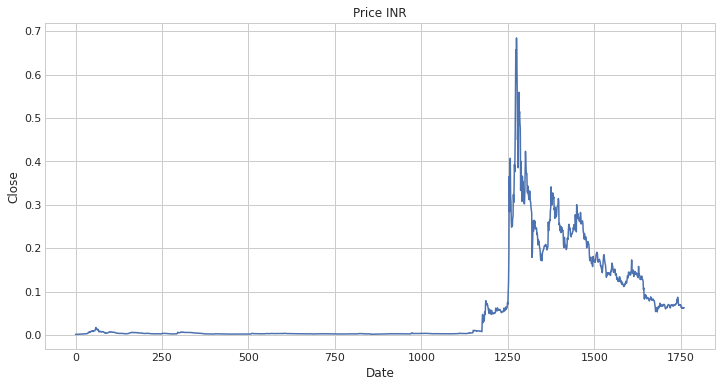

In [10]:
plt.figure(figsize=(12,6))
plt.title('Price INR')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.show()

In [11]:
pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 717.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from autots import AutoTS

In [13]:
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.51457D+00    |proj g|=  4.57894D+02

At iterate    1    f= -2.94993D+00    |proj g|=  3.77834D+01


 This problem is unconstrained.



At iterate    2    f= -3.09742D+00    |proj g|=  2.68664D+01

At iterate    3    f= -3.13060D+00    |proj g|=  9.86518D+00

At iterate    4    f= -3.13202D+00    |proj g|=  9.03027D+00

At iterate    5    f= -3.13382D+00    |proj g|=  8.76884D-01

At iterate    6    f= -3.13394D+00    |proj g|=  8.84677D-01

At iterate    7    f= -3.13446D+00    |proj g|=  2.57814D+00

At iterate    8    f= -3.13544D+00    |proj g|=  5.60293D+00

At iterate    9    f= -3.13854D+00    |proj g|=  1.18532D+01

At iterate   10    f= -3.14623D+00    |proj g|=  2.22245D+01

At iterate   11    f= -3.16693D+00    |proj g|=  4.18994D+01

At iterate   12    f= -3.21674D+00    |proj g|=  7.40639D+01

At iterate   13    f= -3.32661D+00    |proj g|=  9.67235D+01

At iterate   14    f= -3.47144D+00    |proj g|=  3.29848D+01

At iterate   15    f= -3.50742D+00    |proj g|=  1.78339D+01

At iterate   16    f= -3.52242D+00    |proj g|=  6.23979D+00

At iterate   17    f= -3.52612D+00    |proj g|=  1.86324D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -3.80685D+00    |proj g|=  6.68141D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      3     24      1     0     0   6.681D-02  -3.807D+00
  F =  -3.8068457962754758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 3 with model ARIMA in generation 0 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.71772D+00    |proj g|=  2.31319D+01


 This problem is unconstrained.



At iterate    1    f= -3.72126D+00    |proj g|=  5.20594D+00

At iterate    2    f= -3.72148D+00    |proj g|=  7.64771D-01

At iterate    3    f= -3.72148D+00    |proj g|=  3.04667D-01

At iterate    4    f= -3.72149D+00    |proj g|=  4.06423D-01

At iterate    5    f= -3.72153D+00    |proj g|=  1.73251D+00

At iterate    6    f= -3.72162D+00    |proj g|=  3.38870D+00

At iterate    7    f= -3.72190D+00    |proj g|=  6.45894D+00

At iterate    8    f= -3.72263D+00    |proj g|=  1.13001D+01

At iterate    9    f= -3.72455D+00    |proj g|=  1.93966D+01

At iterate   10    f= -3.72933D+00    |proj g|=  3.15417D+01

At iterate   11    f= -3.74045D+00    |proj g|=  4.76663D+01

At iterate   12    f= -3.75928D+00    |proj g|=  5.15743D+01

At iterate   13    f= -3.78253D+00    |proj g|=  3.26443D+01

At iterate   14    f= -3.79070D+00    |proj g|=  1.13189D+01

At iterate   15    f= -3.79168D+00    |proj g|=  3.30536D+00

At iterate   16    f= -3.79177D+00    |proj g|=  1.12244D+00

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 10 with model DatepartRegression in generation 0 of 10


2022-09-08 15:49:10.590032: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-08 15:49:11.378403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
6/6 [==============================] - 7s 6ms/step - loss: 0.0992
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0982
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0981
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0983
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0982
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0982
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0980
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0977
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0980
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0978
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0977
Epoch 12/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0976
Epoch 13/50
6/6 [==============================] - 0s 6ms/step - loss: 0.

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 38 with model FBProphet in generation 0 of 10


15:49:24 - cmdstanpy - INFO - Chain [1] start processing
15:49:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 

15:49:30 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 57 with model FBProphet in generation 0 of 10


15:49:30 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 58 with model SeasonalNaive in generation 0 of 10
Model Number: 59 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


Template Eval Error: ValueError('X has 56 features, but RandomForestRegressor is expecting 58 features as input.') in model 59: DatepartRegression
Model Number: 60 with model NVAR in generation 0 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_2
- weekdayofmonth_3

  warnings.warn(message, FutureWarning)


Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 62: UnivariateRegression
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 65: LastValueNaive
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 70 with model ETS in generation 0 of 10
Model Number: 71 with model FBProphet in generation 0 of 10

15:49:33 - cmdstanpy - INFO - Chain [1] start processing
15:49:33 - cmdstanpy - INFO - Chain [1] done processing



Model Number: 72 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 72: GluonTS
Model Number: 73 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 73: UnobservedComponents
Model Number: 74 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 74: VAR
Model Number: 75 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 75: VECM
Model Number: 76 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.73418D+00    |proj g|=  2.76999D+00


 This problem is unconstrained.



At iterate    1    f= -3.73422D+00    |proj g|=  2.53507D+00

At iterate    2    f= -3.73429D+00    |proj g|=  1.25715D+00

At iterate    3    f= -3.73436D+00    |proj g|=  1.17909D+00

At iterate    4    f= -3.73456D+00    |proj g|=  2.54921D+00

At iterate    5    f= -3.73478D+00    |proj g|=  3.05597D+00

At iterate    6    f= -3.73494D+00    |proj g|=  8.88942D-01

At iterate    7    f= -3.73496D+00    |proj g|=  3.52491D-01

At iterate    8    f= -3.73496D+00    |proj g|=  9.34959D-01

At iterate    9    f= -3.73499D+00    |proj g|=  2.02403D+00

At iterate   10    f= -3.73507D+00    |proj g|=  3.59906D+00

At iterate   11    f= -3.73527D+00    |proj g|=  6.05959D+00

At iterate   12    f= -3.73575D+00    |proj g|=  9.70148D+00

At iterate   13    f= -3.73660D+00    |proj g|=  1.23977D+01

At iterate   14    f= -3.73758D+00    |proj g|=  1.02177D+01

At iterate   15    f= -3.73827D+00    |proj g|=  3.59915D+00

At iterate   16    f= -3.73839D+00    |proj g|=  3.70424D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 78: DatepartRegression
Model Number: 79 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 79: UnivariateRegression
Model Number: 80 with model MultivariateRegression in generation 0 of 10


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 118 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 118: Theta
Model Number: 119 with model UnobservedComponents in generation 0 of 10
Model Number: 120 with model ConstantNaive in generation 0 of 10
Model Number: 121 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 121: MultivariateRegression
Model Number: 122 with model SeasonalNaive in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model LastValueNaive in generation 0 of 10
Model Number: 125 with model SeasonalNaive in generation 0 of 10
Model Number: 126 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 126: DatepartRegression
Model Number: 127 with model GluonTS in generation 0 of 10
T

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.6534e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Epoch 1/100
6/6 [==============================] - 7s 33ms/step - loss: 0.2731
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2611
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2353
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2351
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.2267
Epoch 6/100
6/6 [==============================] - 0s 34ms/step - loss: 0.2222
Epoch 7/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1973
Epoch 8/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2326
Epoch 9/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1970
Epoch 10/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1692
Epoch 11/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1595
Epoch 12/100
6/6 [==============================] - 0s 40ms/step - loss: 0.1658
Epoch 13/100
6/6 [==============================]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.6534e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model Number: 141 with model SectionalMotif in generation 0 of 10
Model Number: 142 with model UnobservedComponents in generation 0 of 10
Model Number: 143 with model SectionalMotif in generation 0 of 10
Model Number: 144 with model UnobservedComponents in generation 0 of 10
Model Number: 145 with model UnivariateMotif in generation 0 of 10
Model Number: 146 with model ETS in generation 0 of 10
Model Number: 147 with model LastValueNaive in generation 0 of 10
Model Number: 148 with model UnobservedComponents in generation 0 of 10
Model Number: 149 with model ETS in generation 0 of 10
Model Number: 150 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 150: GLM
Model Number: 151 with model GLS in generation 0 of 10
Model Number: 152 with model ConstantNaive in generation 0 of 10
Model Number: 153 with model ARDL in generation 0 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1212: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 153: ARDL
Model Number: 154 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 154: GluonTS
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 156: ARIMA
Model Number: 157 with model ConstantNaive in generation 0 of 10
Model Number: 158 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.93480D+00    |proj g|=  9.85286D+05

At iterate    1    f= -1.02725D+01    |proj g|=  1.06613D+06
  ys=-1.370E+00  -gs= 1.669E+01 BFGS update SKIPPED


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     35      2     1     0   1.066D+06  -1.027D+01
  F =  -10.272525706671216     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 159 with model LastValueNaive in generation 0 of 10
Model Number: 160 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 160: GluonTS
Model Number: 161 with model LastValueNaive in generation 0 of 10
Model Number: 162 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`ar


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 164: ConstantNaive
Model Number: 165 with model WindowRegression in generation 0 of 10
Model Number: 166 with model UnivariateRegression in generation 0 of 10
Model Number: 167 with model AverageValueNaive in generation 0 of 10
Model Number: 168 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 168: VECM
Model Number: 169 with model SectionalMotif in generation 0 of 10
Model Number: 170 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 170: VECM
Model Number: 171 with model GluonTS in generation 0 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 171: GluonTS
Model Number: 172 with model UnivariateMotif in generation 0 of 10
Model Number: 173 with model ARDL in generation 0 of 10
Model Number: 174 with model Multiva

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 177 with model GLS in generation 0 of 10
Model Number: 178 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 178: VAR
Model Number: 179 with model UnivariateMotif in generation 0 of 10
Model Number: 180 with model MultivariateMotif in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model UnivariateMotif in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 182: UnivariateMotif
Model Number: 183 with model ARDL in generation 0 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_2
- weekdayofmonth_3

  warnings.warn(message, FutureWarning)


New Generation: 1 of 10
Model Number: 184 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 185 with model Theta in generation 1 of 10
Template Eval Error: ValueError('Model Theta returned NaN for one or more series. fail_on_forecast_nan=True') in model 185: Theta
Model Number: 186 with model LastValueNaive in generation 1 of 10
Model Number: 187 with model WindowRegression in generation 1 of 10
Model Number: 188 with model SeasonalNaive in generation 1 of 10
Model Number: 189 with model LastValueNaive in generation 1 of 10


15:50:24 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 190 with model FBProphet in generation 1 of 10


15:50:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 191 with model SectionalMotif in generation 1 of 10
Model Number: 192 with model ConstantNaive in generation 1 of 10
Model Number: 193 with model UnobservedComponents in generation 1 of 10
Model Number: 194 with model GLS in generation 1 of 10
Model Number: 195 with model UnivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 195: UnivariateRegression
Model Number: 196 with model ARDL in generation 1 of 10
Model Number: 197 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80325D+00    |proj g|=  5.37851D+00


 This problem is unconstrained.



At iterate    1    f= -3.80344D+00    |proj g|=  1.99242D-01

At iterate    2    f= -3.80344D+00    |proj g|=  2.35703D-02

At iterate    3    f= -3.80345D+00    |proj g|=  3.31193D-01

At iterate    4    f= -3.80353D+00    |proj g|=  2.06720D+00

At iterate    5    f= -3.80365D+00    |proj g|=  3.48293D+00

At iterate    6    f= -3.80395D+00    |proj g|=  5.42962D+00

At iterate    7    f= -3.80421D+00    |proj g|=  4.89327D+00

At iterate    8    f= -3.80440D+00    |proj g|=  2.02500D+00

At iterate    9    f= -3.80442D+00    |proj g|=  2.94195D-01

At iterate   10    f= -3.80442D+00    |proj g|=  2.59676D-02

At iterate   11    f= -3.80442D+00    |proj g|=  1.79841D-02

At iterate   12    f= -3.80442D+00    |proj g|=  9.15863D-03

At iterate   13    f= -3.80442D+00    |proj g|=  1.70866D-01

At iterate   14    f= -3.80443D+00    |proj g|=  4.93111D-01

At iterate   15    f= -3.80444D+00    |proj g|=  3.09551D-01

At iterate   16    f= -3.80450D+00    |proj g|=  4.38425D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 199 with model Theta in generation 1 of 10
Model Number: 200 with model Theta in generation 1 of 10


15:50:28 - cmdstanpy - INFO - Chain [1] start processing
15:50:29 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 201 with model FBProphet in generation 1 of 10
Model Number: 202 with model Theta in generation 1 of 10
Model Number: 203 with model Theta in generation 1 of 10
Model Number: 204 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 204: UnobservedComponents
Model Number: 205 with model LastValueNaive in generation 1 of 10
Model Number: 206 with model ConstantNaive in generation 1 of 10
Model Number: 207 with model LastValueNaive in generation 1 of 10
Model Number: 208 with model ConstantNaive in generation 1 of 10
Model Number: 209 with model SectionalMotif in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 209: SectionalMotif
Model Number: 210 with model MultivariateMotif in generation 1 of 10
Model Number: 211 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no f

 This problem is unconstrained.



At iterate    1    f= -9.88626D+00    |proj g|=  4.54723D+04
  ys=-5.920E-02  -gs= 2.765E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18      2     39      2     1     0   4.547D+04  -9.886D+00
  F =  -9.8862581320649578     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 214 with model UnivariateRegression in generation 1 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
15:50:34 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 215 with model FBProphet in generation 1 of 10


15:50:34 - cmdstanpy - INFO - Chain [1] done processing
15:50:36 - cmdstanpy - INFO - Chain [1] start processing
15:50:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 216 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 216: UnivariateMotif
Model Number: 217 with model GLM in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 217: GLM
Model Number: 218 with model FBProphet in generation 1 of 10
Model Number: 219 with model ConstantNaive in generation 1 of 10
Model Number: 220 with model MultivariateMotif in generation 1 of 10
Model Number: 221 with model ETS in generation 1 of 10
Model Number: 222 with model UnivariateMotif in generation 1 of 10
Model Number: 223 with model MultivariateRegression in generation 1 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 240 with model UnivariateRegression in generation 1 of 10
Model Number: 241 with model WindowRegression in generation 1 of 10
Model Number: 242 with model SectionalMotif in generation 1 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 243 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86978D-03    |proj g|=  9.47311D+05


 This problem is unconstrained.



At iterate    1    f= -4.50460D+00    |proj g|=  2.40082D+02

At iterate    2    f= -8.42019D+00    |proj g|=  1.36625D+04

At iterate    3    f= -8.47026D+00    |proj g|=  1.21061D+04

At iterate    4    f= -9.68830D+00    |proj g|=  9.68830D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      5     71      2     0     0   9.688D+05  -9.688D+00
  F =  -9.6883044285015441     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 244 with model GLM in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 244: GLM
Model Number: 245 with model NVAR in generation 1 of 10
Model Number: 246 with model SectionalMotif in generation 1 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 246: SectionalMotif
Model Number: 247 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 247: FBProphet
Model Number: 248 with model SectionalMotif in generation 1 of 10
Model Number: 249 with model MultivariateRegression in generation 1 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

 This problem is unconstrained.


Model Number: 262 with model MultivariateRegression in generation 1 of 10
Model Number: 263 with model UnivariateRegression in generation 1 of 10
Model Number: 264 with model LastValueNaive in generation 1 of 10
Model Number: 265 with model Theta in generation 1 of 10
Model Number: 266 with model UnivariateMotif in generation 1 of 10
Model Number: 267 with model ConstantNaive in generation 1 of 10
Model Number: 268 with model ConstantNaive in generation 1 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 268: ConstantNaive
Model Number: 269 with model NVAR in generation 1 of 10
Model Number: 270 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80092D+00    |proj g|=  5.53293D+00


 This problem is unconstrained.



At iterate    1    f= -3.80112D+00    |proj g|=  1.30188D+00

At iterate    2    f= -3.80113D+00    |proj g|=  5.63460D-01

At iterate    3    f= -3.80114D+00    |proj g|=  5.48110D-01

At iterate    4    f= -3.80119D+00    |proj g|=  1.39788D+00

At iterate    5    f= -3.80122D+00    |proj g|=  1.23410D+00

At iterate    6    f= -3.80124D+00    |proj g|=  1.60351D-01

At iterate    7    f= -3.80125D+00    |proj g|=  1.97122D-02

At iterate    8    f= -3.80125D+00    |proj g|=  5.94638D-02

At iterate    9    f= -3.80125D+00    |proj g|=  1.46087D-01

At iterate   10    f= -3.80125D+00    |proj g|=  2.72485D-01

At iterate   11    f= -3.80125D+00    |proj g|=  4.40714D-01

At iterate   12    f= -3.80126D+00    |proj g|=  8.11843D-01

At iterate   13    f= -3.80127D+00    |proj g|=  1.25643D+00

At iterate   14    f= -3.80130D+00    |proj g|=  2.38555D+00

At iterate   15    f= -3.80135D+00    |proj g|=  3.15733D+00

At iterate   16    f= -3.80152D+00    |proj g|=  4.45209D+00

At iter

 This problem is unconstrained.



At iterate    3    f=  2.96422D-01    |proj g|=  1.76045D+00

At iterate    4    f=  2.26085D-01    |proj g|=  2.42302D-01

At iterate    5    f=  2.10153D-01    |proj g|=  2.16272D-01

At iterate    6    f=  1.72427D-01    |proj g|=  1.96054D-01

At iterate    7    f=  1.65442D-01    |proj g|=  4.48831D-02

At iterate    8    f=  1.63925D-01    |proj g|=  3.52090D-02

At iterate    9    f=  1.62456D-01    |proj g|=  1.97112D-02

At iterate   10    f=  1.62387D-01    |proj g|=  4.04410D-03

At iterate   11    f=  1.62330D-01    |proj g|=  1.24875D-02

At iterate   12    f=  1.62316D-01    |proj g|=  1.04505D-02

At iterate   13    f=  1.62312D-01    |proj g|=  3.00240D-03

At iterate   14    f=  1.62312D-01    |proj g|=  5.36326D-04

At iterate   15    f=  1.62312D-01    |proj g|=  5.63459D-05

At iterate   16    f=  1.62312D-01    |proj g|=  5.16700D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   17    f= -3.39170D+00    |proj g|=  4.01110D+00

At iterate   18    f= -3.39994D+00    |proj g|=  2.11187D+00

At iterate   19    f= -3.40424D+00    |proj g|=  1.31533D+00

At iterate   20    f= -3.40565D+00    |proj g|=  1.08138D-01

At iterate   21    f= -3.40590D+00    |proj g|=  5.56453D-01

At iterate   22    f= -3.40590D+00    |proj g|=  3.14204D-01

At iterate   23    f= -3.40592D+00    |proj g|=  9.84505D-01

At iterate   24    f= -3.40596D+00    |proj g|=  1.16059D+00

At iterate   25    f= -3.40620D+00    |proj g|=  3.64341D-01

At iterate   26    f= -3.40847D+00    |proj g|=  1.02149D+01

At iterate   27    f= -3.40848D+00    |proj g|=  1.68205D+01

At iterate   28    f= -3.41043D+00    |proj g|=  1.16846D+01

At iterate   29    f= -3.41439D+00    |proj g|=  2.64856D-01

At iterate   30    f= -3.41742D+00    |proj g|=  5.20035D+00

At iterate   31    f= -3.43323D+00    |proj g|=  1.05683D+01

At iterate   32    f= -3.45862D+00    |proj g|=  5.59501D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37    102      2     0     0   1.557D-02  -3.461D+00
  F =  -3.4613642738689010     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 274 with model GLM in generation 1 of 10
Model Number: 275 with model ARIMA in generation 1 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.74538D+00    |proj g|=  1.52011D+01

At iterate    1    f= -3.74666D+00    |proj g|=  9.42862D+00

At iterate    2    

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    4    f= -3.74733D+00    |proj g|=  6.07388D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     35      2     0     0   6.074D-02  -3.747D+00
  F =  -3.7473264260441188     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 276 with model Theta in generation 1 of 10
Model Number: 277 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 278 with model ARDL in generation 1 of 10
Model Number: 279 with model SectionalMotif in generation 1 of 10
Model Number: 280 with model UnivariateMotif in generation 1 of 10
Model Number: 281 with model NVAR in generation 1 of 10
Model Number: 282 with model UnobservedComponents in generation 1 of 10
Model Number: 283 with model GLM in generation 1 of 10
Template Eval Error: ValueError('shapes (10,56) and (58,) not aligned: 56 (dim 1) != 58 (dim 0)') in model 283: GLM
Model Number: 284 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 284: ETS
Model Number: 285 with model ARDL in generation 1 of 10
Model Number: 286 with model MultivariateMotif in generation 1 of 10
Model Number: 287 with model ETS in generation 1 of 10
Model Number: 288 with model LastValueNaive in generation 1 of 10
Model Number: 289 with model GLS in generation 1 of 10
Model Number: 290 with model Theta in generation 1 of 10
Templat

 This problem is unconstrained.



Model Number: 299 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 300 with model ARDL in generation 1 of 10
Model Number: 301 with model ETS in generation 1 of 10
Model Number: 302 with model SectionalMotif in generation 1 of 10
Model Number: 303 with model UnobservedComponents in generation 1 of 10
New Generation: 2 of 10
Model Number: 304 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 304: ARDL
Model Number: 305 with model MultivariateRegression in generation 2 of 10
Epoch 1/100
6/6 [==============================] - 7s 22ms/step - loss: 0.2171
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0826
Epoch 3/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0919
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0869
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0828
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0805
Epoch 7/100


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 310 with model MultivariateRegression in generation 2 of 10
Model Number: 311 with model NVAR in generation 2 of 10
Model Number: 312 with model GLM in generation 2 of 10
Model Number: 313 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 313: DatepartRegression
Model Number: 314 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 314: MultivariateMotif
Model Number: 315 with model SeasonalNaive in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 316 with model MultivariateMotif in generation 2 of 10
Model Number: 317 with model MultivariateMotif in generation 2 of 10
Model Number: 318 with model Theta in generation 2 of 10
Model Number: 319 with model UnobservedComponents in generation 2 of 10
Model Number: 320 with model NVAR in generation 2 of 10
Model Number: 321 with model ConstantNaive in generation 2 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'ClipOutliers', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '3': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}}}. fail_on_forecast_nan=True") in model 321: ConstantNaive
Model Number: 322 with model MultivariateRegress

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 323 with model UnivariateRegression in generation 2 of 10
Model Number: 324 with model WindowRegression in generation 2 of 10
Model Number: 325 with model LastValueNaive in generation 2 of 10
Model Number: 326 with model ConstantNaive in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_glm/link.py:84: RuntimeWarning: divide by zero encountered in log
  return np.log(y_pred)
/opt/conda/lib/python3.7/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/opt/conda/lib/python3.7/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Model Number: 327 with model LastValueNaive in generation 2 of 10
Model Number: 328 with model MultivariateMotif in generation 2 of 10
Model Number: 329 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 329: FBProphet
Model Number: 330 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 331 with model ETS in generation 2 of 10
Model Number: 332 with model UnivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 332: UnivariateRegression
Model Number: 333 with model UnivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 333: Univar

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 348 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 348: ARDL
Model Number: 349 with model Theta in generation 2 of 10
Model Number: 350 with model SeasonalNaive in generation 2 of 10
Model Number: 351 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 352 with model ARDL in generation 2 of 10
Model Number: 353 with model ConstantNaive in generation 2 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'SeasonalDifference', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': Non

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
15:51:59 - cmdstanpy - INFO - Chain [1] start processing
15:52:00 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 359 with model LastValueNaive in generation 2 of 10
Model Number: 360 with model ETS in generation 2 of 10
Model Number: 361 with model ETS in generation 2 of 10
Model Number: 362 with model UnivariateRegression in generation 2 of 10
Model Number: 363 with model LastValueNaive in generation 2 of 10
Model Number: 364 with model UnivariateMotif in generation 2 of 10
Model Number: 365 with model ConstantNaive in generation 2 of 10
Model Number: 366 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95840D-01    |proj g|=  4.27023D-01

At iterate    1    f= -3.96743D-01    |proj g|=  3.13029D-01

At iterate    2    f= -3.97371D-01    |proj g|=  6.30367D-02

At iterate    3    f= -3.99119D-01    |proj g|=  1.01243D-01

At iterate    4    f= -4.10053D-01    |proj g|=  6.05633D-01

At iterate    5    

 This problem is unconstrained.



At iterate   17    f= -4.30816D-01    |proj g|=  6.39805D-02

At iterate   18    f= -4.31410D-01    |proj g|=  1.29439D-01

At iterate   19    f= -4.32754D-01    |proj g|=  7.62996D-03

At iterate   20    f= -4.33459D-01    |proj g|=  2.96869D-02

At iterate   21    f= -4.34024D-01    |proj g|=  2.71382D-02

At iterate   22    f= -4.34479D-01    |proj g|=  7.28580D-02

At iterate   23    f= -4.34772D-01    |proj g|=  2.29252D-02

At iterate   24    f= -4.34908D-01    |proj g|=  1.59925D-03

At iterate   25    f= -4.34985D-01    |proj g|=  8.80338D-04

At iterate   26    f= -4.34986D-01    |proj g|=  7.94805D-03

At iterate   27    f= -4.35016D-01    |proj g|=  4.72985D-02

At iterate   28    f= -4.35042D-01    |proj g|=  2.75463D-02

At iterate   29    f= -4.35069D-01    |proj g|=  2.53705D-03

At iterate   30    f= -4.35081D-01    |proj g|=  9.04694D-04

At iterate   31    f= -4.35091D-01    |proj g|=  6.11860D-03

At iterate   32    f= -4.35095D-01    |proj g|=  9.58393D-03

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 368 with model MultivariateRegression in generation 2 of 10
Epoch 1/100
3/3 [==============================] - 7s 29ms/step - loss: 0.0502
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0193
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0174
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0185
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0153
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0127
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0118
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0133
Epoch 9/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0082
Epoch 10/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0151
Epoch 11/100
3/3 [==============================] - 0s 48ms/step - loss: 0.0102
Epoch 12/100
3/3 [==============================] - 0s 

 This problem is unconstrained.



At iterate    4    f= -3.72899D+00    |proj g|=  2.68581D-01

At iterate    5    f= -3.72901D+00    |proj g|=  1.24706D+00

At iterate    6    f= -3.72904D+00    |proj g|=  1.83866D+00

At iterate    7    f= -3.72927D+00    |proj g|=  6.06849D+00

At iterate    8    f= -3.72956D+00    |proj g|=  7.79416D+00

At iterate    9    f= -3.73134D+00    |proj g|=  1.28017D+01

At iterate   10    f= -3.73360D+00    |proj g|=  1.45314D+01

At iterate   11    f= -3.73503D+00    |proj g|=  8.71449D+00

At iterate   12    f= -3.73562D+00    |proj g|=  1.54963D+00

At iterate   13    f= -3.73564D+00    |proj g|=  1.22354D-01

At iterate   14    f= -3.73564D+00    |proj g|=  8.41296D-02

At iterate   15    f= -3.73565D+00    |proj g|=  3.87860D-01

At iterate   16    f= -3.73565D+00    |proj g|=  5.77556D-01

At iterate   17    f= -3.73569D+00    |proj g|=  1.48308D+00

At iterate   18    f= -3.73578D+00    |proj g|=  2.31658D+00

At iterate   19    f= -3.73613D+00    |proj g|=  5.01514D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     84      2     0     0   1.971D-01  -3.737D+00
  F =  -3.7367950640396561     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 371 with model ETS in generation 2 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 372 with model SectionalMotif in generation 2 of 10
Model Number: 373 with model MultivariateMotif in generation 2 of 10
Model Number: 374 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59046D+01    |proj g|=  2.16634D+04

At iterate    1    f=  9.26389D-01    |proj g|=  9.91123D-01

At iterate    2    f= -1.41150D+00    |proj g|=  2.49905D+00
  ys=-1.430E+00  -gs= 9.333E-01 BFGS update SKIPPED

At iterate    3    f= -1.41868D+00    |proj g|=  1.57306D+00

At iterate    4    f= -1.43266D+00    |proj g|=  2.65852D+00

At iterate    5    f= -1.59852D+00    |proj g|=  3.57305D+00

At iterate    6    f= -2.54272D+00    |proj g|=  1.02890D+01

At iterate    7    f= -2.61164D+00    |proj g|=  3.53840D+01

At iterate    8    f= -2.91793D+00    |proj g|=  5.13020D+01

At iterate    9    f= -3.01052

 This problem is unconstrained.



At iterate   12    f= -3.05616D+00    |proj g|=  3.22424D-01

At iterate   13    f= -3.05628D+00    |proj g|=  3.14103D-01

At iterate   14    f= -3.05646D+00    |proj g|=  3.03670D-01

At iterate   15    f= -3.05729D+00    |proj g|=  4.07651D-01

At iterate   16    f= -3.06179D+00    |proj g|=  2.52183D+00

At iterate   17    f= -3.07043D+00    |proj g|=  5.08417D+00

At iterate   18    f= -3.09849D+00    |proj g|=  1.02921D+01

At iterate   19    f= -3.19038D+00    |proj g|=  2.08945D+01

At iterate   20    f= -3.41596D+00    |proj g|=  3.90654D+01

At iterate   21    f= -3.42268D+00    |proj g|=  4.20119D+01

At iterate   22    f= -3.46074D+00    |proj g|=  2.78748D+01

At iterate   23    f= -3.47515D+00    |proj g|=  9.39872D+00

At iterate   24    f= -3.48395D+00    |proj g|=  2.71317D+00

At iterate   25    f= -3.50135D+00    |proj g|=  1.92397D+01

At iterate   26    f= -3.50821D+00    |proj g|=  8.02985D+00

At iterate   27    f= -3.50899D+00    |proj g|=  1.26408D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.80974D+00    |proj g|=  8.79463D-01

At iterate    2    f= -3.80974D+00    |proj g|=  6.54365D-02

At iterate    3    f= -3.80974D+00    |proj g|=  5.79640D-02

At iterate    4    f= -3.80974D+00    |proj g|=  1.30813D-01

At iterate    5    f= -3.80975D+00    |proj g|=  3.71208D-01

At iterate    6    f= -3.80975D+00    |proj g|=  6.73491D-01

At iterate    7    f= -3.80977D+00    |proj g|=  1.37128D+00

At iterate    8    f= -3.80979D+00    |proj g|=  2.02032D+00

At iterate    9    f= -3.80987D+00    |proj g|=  3.43867D+00

At iterate   10    f= -3.81007D+00    |proj g|=  5.82337D+00

At iterate   11    f= -3.81040D+00    |proj g|=  8.08125D+00

At iterate   12    f= -3.81100D+00    |proj g|=  9.05712D+00

At iterate   13    f= -3.81173D+00    |proj g|=  6.78510D+00

At iterate   14    f= -3.81199D+00    |proj g|=  2.60482D+00

At iterate   15    f= -3.81204D+00    |proj g|=  3.02386D-01

At iterate   16    f= -3.81204D+00    |proj g|=  4.36861D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 378 with model ConstantNaive in generation 2 of 10
Model Number: 379 with model MultivariateMotif in generation 2 of 10
Model Number: 380 with model ARDL in generation 2 of 10
Model Number: 381 with model UnobservedComponents in generation 2 of 10
Model Number: 382 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 382: UnivariateMotif
Model Number: 383 with model ARIMA in generation 2 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.20572D+00    |proj g|=  1.16713D+00

At iterate    1    f= -1.20772D+00    |proj g|=  1.82719D-01

At iterate    2    f= -1.20778D+00    |proj g|=  6.52298D-02

At iterate    3    f= -1.20789D+00    |proj g|=  1.05764D-01

At iterate    4    f= -1.20867D+00    |proj g|=  4.80148D-01

At iterate    5    f= -1.21

 This problem is unconstrained.



At iterate   17    f= -1.24480D+00    |proj g|=  4.31600D-01

At iterate   18    f= -1.24514D+00    |proj g|=  6.76237D-02

At iterate   19    f= -1.24526D+00    |proj g|=  4.81494D-02

At iterate   20    f= -1.24528D+00    |proj g|=  4.21952D-02

At iterate   21    f= -1.24528D+00    |proj g|=  5.73740D-02

At iterate   22    f= -1.24529D+00    |proj g|=  1.35621D-02

At iterate   23    f= -1.24529D+00    |proj g|=  9.73034D-03

At iterate   24    f= -1.24529D+00    |proj g|=  2.41622D-02

At iterate   25    f= -1.24531D+00    |proj g|=  8.21465D-02

At iterate   26    f= -1.24534D+00    |proj g|=  1.47169D-01

At iterate   27    f= -1.24544D+00    |proj g|=  2.94291D-01

At iterate   28    f= -1.24570D+00    |proj g|=  5.21064D-01

At iterate   29    f= -1.24644D+00    |proj g|=  9.92179D-01

At iterate   30    f= -1.24724D+00    |proj g|=  1.39725D+00

At iterate   31    f= -1.24872D+00    |proj g|=  1.51917D+00

At iterate   32    f= -1.25263D+00    |proj g|=  6.44821D-01

At iter

 This problem is unconstrained.



At iterate    4    f= -3.63567D+00    |proj g|=  4.89006D-01

At iterate    5    f= -3.63568D+00    |proj g|=  8.52790D-01

At iterate    6    f= -3.63570D+00    |proj g|=  1.26496D+00

At iterate    7    f= -3.63585D+00    |proj g|=  5.29388D+00

At iterate    8    f= -3.63652D+00    |proj g|=  6.61493D+00

At iterate    9    f= -3.64035D+00    |proj g|=  5.72279D+00

At iterate   10    f= -3.64239D+00    |proj g|=  2.52568D+00

At iterate   11    f= -3.64246D+00    |proj g|=  6.66974D-01

At iterate   12    f= -3.64246D+00    |proj g|=  1.06693D-01

At iterate   13    f= -3.64247D+00    |proj g|=  3.61082D-01

At iterate   14    f= -3.64248D+00    |proj g|=  3.23103D-01

At iterate   15    f= -3.64250D+00    |proj g|=  1.64165D-01

At iterate   16    f= -3.64252D+00    |proj g|=  1.49808D-01

At iterate   17    f= -3.65144D+00    |proj g|=  7.36070D+00

At iterate   18    f= -3.68357D+00    |proj g|=  1.39716D+01

At iterate   19    f= -3.68803D+00    |proj g|=  1.22651D+01

At iter

15:52:33 - cmdstanpy - INFO - Chain [1] start processing
15:52:33 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 389 with model UnivariateMotif in generation 2 of 10
Model Number: 390 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 390: FBProphet
Model Number: 391 with model MultivariateRegression in generation 2 of 10
Epoch 1/100
6/6 [==============================] - 7s 32ms/step - loss: 0.0423
Epoch 2/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0223
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0217
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0207
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0177
Epoch 6/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0176
Epoch 7/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0178
Epoch 8/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0174
Epoch 9/100
6/6 [==============================

15:53:06 - cmdstanpy - INFO - Chain [1] start processing
15:53:06 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 400 with model FBProphet in generation 2 of 10
Model Number: 401 with model UnivariateMotif in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())


Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 401: UnivariateMotif
Model Number: 402 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 402: Theta
Model Number: 403 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 404 with model AverageValueNaive in generation 2 of 10
Model Number: 405 with model SectionalMotif in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Model Number: 406 with model GLS in generation 2 of 10
Model Number: 407 with model ARDL in generation 2 of 10
Model Number: 408 with model MultivariateMotif in generation 2 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 408: MultivariateMotif
Model Number: 409 with model Theta in generation 2 of 10
Model Number: 410 with model NVAR in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 411 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 411: ARIMA
Model Number: 412 with model GLS in generation 2 of 10
Model Number: 413 with model NVAR in generation 2 of 10
Model Number: 414 with model FBProphet in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 414: FBProphet
Model Number: 415 with model NVAR in generation 2 of 10
Model Number: 416 with model GLM in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 417 with model LastValueNaive in generation 2 of 10
Model Number: 418 with model GLS in generation 2 of 10
Model Number: 419 with model Theta in generation 2 of 10
Model Number: 420 with model UnivariateRegression in generation 2 of 10
Model Number: 421 with model GLS in generation 2 of 10
Model Number: 422 with model MultivariateRegression in generation 2 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/conda/lib/python3.7/site-packages/autots/tools/thresholding.py:713: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194

Model Number: 423 with model Theta in generation 2 of 10
New Generation: 3 of 10
Model Number: 424 with model MultivariateMotif in generation 3 of 10
Model Number: 425 with model SectionalMotif in generation 3 of 10
Model Number: 426 with model ETS in generation 3 of 10
Model Number: 427 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'quadratic', 'transformations': {'0': 'SeasonalDifference', '1': 'ClipOutliers', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 52, 'method': 'LastValue'}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}}}. fail_on_forecast_nan=True") in model 427: MultivariateMotif
Model Number: 428 with model SeasonalNaive in generation 3 of 10
Model Number: 429 with model ARDL in generation 3 of 10
Model Number: 430 with model GLM in generation 3 of 10
Template Eval Er

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: divide by zero encountered in true_divide
  endog * np.log(endog / mu) + (mu - endog))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:804: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

 This problem is unconstrained.



At iterate    5    f= -3.04885D+00    |proj g|=  3.60980D-01

At iterate    6    f= -3.04889D+00    |proj g|=  5.51463D-01

At iterate    7    f= -3.04907D+00    |proj g|=  1.90295D+00

At iterate    8    f= -3.04947D+00    |proj g|=  3.63119D+00

At iterate    9    f= -3.05065D+00    |proj g|=  6.94937D+00

At iterate   10    f= -3.05366D+00    |proj g|=  1.24307D+01

At iterate   11    f= -3.06151D+00    |proj g|=  2.17391D+01

At iterate   12    f= -3.08124D+00    |proj g|=  3.70549D+01

At iterate   13    f= -3.12436D+00    |proj g|=  5.28310D+01

At iterate   14    f= -3.19730D+00    |proj g|=  4.35207D+01

At iterate   15    f= -3.23796D+00    |proj g|=  1.31471D+01

At iterate   16    f= -3.24467D+00    |proj g|=  4.56685D+00

At iterate   17    f= -3.24550D+00    |proj g|=  8.37420D-01

At iterate   18    f= -3.24554D+00    |proj g|=  2.17463D-01

At iterate   19    f= -3.24556D+00    |proj g|=  2.17442D-01

At iterate   20    f= -3.24583D+00    |proj g|=  1.37554D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  107    f= -3.42652D+00    |proj g|=  1.08411D-01

At iterate  108    f= -3.42652D+00    |proj g|=  1.08411D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    108    170      2     0     0   1.084D-01  -3.427D+00
  F =  -3.4265153834593440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 437 with model LastValueNaive in generation 3 of 10
Model Number: 438 with model ConstantNaive in generation 3 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception('Transformer SeasonalDifference failed on inverse') in model 438: ConstantNaive
Model Number: 439 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 439: UnobservedComponents
Model Number: 440 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 440: MultivariateMotif
Model Number: 441 with model MultivariateRegression in generation 3 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 442 with model FBProphet in generation 3 of 10
Model Number: 443 with model AverageValueNaive in generation 3 of 10
Model Number: 444 with model SectionalMotif in generation 3 of 10
Model Number: 445 with model GLM in generation 3 of 10
Model Number: 446 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80094D+00    |proj g|=  9.67169D+00


 This problem is unconstrained.



At iterate    1    f= -3.80163D+00    |proj g|=  6.43278D-01

At iterate    2    f= -3.80163D+00    |proj g|=  1.48248D-01

At iterate    3    f= -3.80164D+00    |proj g|=  5.83532D-01

At iterate    4    f= -3.80171D+00    |proj g|=  2.12469D+00

At iterate    5    f= -3.80191D+00    |proj g|=  4.78226D+00

At iterate    6    f= -3.80238D+00    |proj g|=  8.41416D+00

At iterate    7    f= -3.80338D+00    |proj g|=  1.22746D+01

At iterate    8    f= -3.80482D+00    |proj g|=  1.25463D+01

At iterate    9    f= -3.80612D+00    |proj g|=  6.85569D+00

At iterate   10    f= -3.80661D+00    |proj g|=  4.34112D-01

At iterate   11    f= -3.80667D+00    |proj g|=  1.35176D+00

At iterate   12    f= -3.80670D+00    |proj g|=  2.16983D+00

At iterate   13    f= -3.80681D+00    |proj g|=  3.73713D+00

At iterate   14    f= -3.80704D+00    |proj g|=  5.76083D+00

At iterate   15    f= -3.80756D+00    |proj g|=  8.31621D+00

At iterate   16    f= -3.80850D+00    |proj g|=  1.00745D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
15:53:24 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 448 with model FBProphet in generation 3 of 10


15:53:24 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 449 with model ARDL in generation 3 of 10
Model Number: 450 with model UnivariateRegression in generation 3 of 10
Model Number: 451 with model UnobservedComponents in generation 3 of 10
Model Number: 452 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.79741D+00    |proj g|=  3.35220D+00

At iterate    1    f= -3.79748D+00    |proj g|=  3.98869D-01

At iterate    2    f= -3.79748D+00    |proj g|=  3.20049D-01

At iterate    3    f= -3.79748D+00    |proj g|=  3.20049D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 454 with model ETS in generation 3 of 10
Model Number: 455 with model SectionalMotif in generation 3 of 10
Model Number: 456 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 457 with model MultivariateMotif in generation 3 of 10
Model Number: 458 with model NVAR in generation 3 of 10
Model Number: 459 with model MultivariateRegression in generation 3 of 10
Model Number: 460 with model MultivariateMotif in generation 3 of 10
Model Number: 461 with model ARDL in generation 3 of 10
Model Number: 462 with model ARDL in generation 3 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 463 with model UnivariateRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 463: UnivariateRegression
Model Number: 464 with model AverageValueNaive in generation 3 of 10
Model Number: 465 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 466 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.90633D+00    |proj g|=  1.18423D+01

At iterate    1    f= -3.90687D+00    |proj g|=  6.40641D+00

At iterate    2    f= -3.90712D+00    |proj g|=  4.64474D-01

At iterate    3    f= -3.90712D+00    |proj g|=  3.86828D-01

At iterate    4    f= -3.90712D+00    |proj g|=  3.86828D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     25      1     0     0   3.868


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 470 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 471 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 471: UnobservedComponents
Model Number: 472 with model UnobservedComponents in generation 3 of 10


15:53:34 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 473 with model FBProphet in generation 3 of 10


15:53:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 474 with model SeasonalNaive in generation 3 of 10
Model Number: 475 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.86066D-01    |proj g|=  1.76766D+03

At iterate    1    f= -1.62629D-01    |proj g|=  2.94566D+00


 This problem is unconstrained.



At iterate    2    f= -2.57282D+00    |proj g|=  2.14381D+01
  ys=-5.823E+00  -gs= 9.273E-01 BFGS update SKIPPED

At iterate    3    f= -2.64928D+00    |proj g|=  1.48106D+01

At iterate    4    f= -2.67927D+00    |proj g|=  2.12427D+00

At iterate    5    f= -2.68286D+00    |proj g|=  3.58382D+00

At iterate    6    f= -2.70660D+00    |proj g|=  1.69481D+01

At iterate    7    f= -2.77743D+00    |proj g|=  3.83159D+01

At iterate    8    f= -2.92258D+00    |proj g|=  7.13485D+01

At iterate    9    f= -3.26016D+00    |proj g|=  1.27781D+02

At iterate   10    f= -3.47156D+00    |proj g|=  3.42790D+01

At iterate   11    f= -3.54937D+00    |proj g|=  2.26403D+01

At iterate   12    f= -3.60241D+00    |proj g|=  2.03917D+01

At iterate   13    f= -3.62373D+00    |proj g|=  2.67396D+01

At iterate   14    f= -3.66948D+00    |proj g|=  3.10359D+00

At iterate   15    f= -3.68238D+00    |proj g|=  7.38098D+00

At iterate   16    f= -3.68488D+00    |proj g|=  7.79096D-01

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: ValueError("'shape' elements cannot be negative") in model 476: UnobservedComponents
Model Number: 477 with model UnivariateMotif in generation 3 of 10
Model Number: 478 with model SeasonalNaive in generation 3 of 10
Model Number: 479 with model AverageValueNaive in generation 3 of 10
Model Number: 480 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 480: SeasonalNaive
Model Number: 481 with model DatepartRegression in generation 3 of 10
Model Number: 482 with model Theta in generation 3 of 10
Model Number: 483 with model LastValueNaive in generation 3 of 10
Model Number: 484 with model ConstantNaive in generation 3 of 10
Model Number: 485 with model ConstantNaive in generation 3 of 10
Model Number: 486 with model MultivariateMotif in generation 3 of 10
Model Number: 487 with model ARDL in generation 3 of 10
Model Number: 488 with model ARDL in generation 3 of 10
Model Number: 489

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 501 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 502 with model UnobservedComponents in generation 3 of 10
Model Number: 503 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.71347D+00    |proj g|=  1.48585D+01

At iterate    1    f= -3.71468D+00    |proj g|=  9.95588D+00

At iterate    2    f= -3.71546D+00    |proj g|=  1.10815D+00


 This problem is unconstrained.



At iterate    3    f= -3.71546D+00    |proj g|=  1.04917D-01

At iterate    4    f= -3.71546D+00    |proj g|=  1.04917D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     21      1     0     0   1.049D-01  -3.715D+00
  F =  -3.7154602518939028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 504 with model ARDL in generation 3 of 10
Model Number: 505 with model ARDL in generation 3 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 506 with model UnivariateMotif in generation 3 of 10
Model Number: 507 with model Theta in generation 3 of 10
Model Number: 508 with model NVAR in generation 3 of 10
Model Number: 509 with model SectionalMotif in generation 3 of 10
Model Number: 510 with model UnobservedComponents in generation 3 of 10
Model Number: 511 with model SeasonalNaive in generation 3 of 10
Model Number: 512 with model LastValueNaive in generation 3 of 10
Model Number: 513 with model UnivariateMotif in generation 3 of 10
Model Number: 514 with model UnivariateRegression in generation 3 of 10
Model Number: 515 with model AverageValueNaive in generation 3 of 10
Model Number: 516 with model UnivariateMotif in generation 3 of 10
Model Number: 517 with model MultivariateMotif in generation 3 of 10
Model Number: 518 with model SeasonalNaive in generation 3 of 10
Model Number: 519 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 

 This problem is unconstrained.



At iterate    2    f= -3.75876D-01    |proj g|=  8.18224D-01

At iterate    3    f= -3.81944D-01    |proj g|=  1.09324D+00

At iterate    4    f= -6.25548D-01    |proj g|=  3.16556D+00

At iterate    5    f= -8.95022D-01    |proj g|=  1.57847D+00

At iterate    6    f= -9.55951D-01    |proj g|=  3.47672D-01

At iterate    7    f= -9.72637D-01    |proj g|=  2.19787D+00

At iterate    8    f= -9.77894D-01    |proj g|=  1.58580D+00

At iterate    9    f= -9.84723D-01    |proj g|=  5.87817D-01

At iterate   10    f= -9.86988D-01    |proj g|=  1.62204D-01

At iterate   11    f= -9.89628D-01    |proj g|=  4.42091D-01

At iterate   12    f= -1.00710D+00    |proj g|=  2.17831D+00

At iterate   13    f= -1.02469D+00    |proj g|=  2.52368D+00

At iterate   14    f= -1.04509D+00    |proj g|=  9.92654D-01

At iterate   15    f= -1.04831D+00    |proj g|=  9.22451D-02

At iterate   16    f= -1.04908D+00    |proj g|=  2.32743D-01

At iterate   17    f= -1.04986D+00    |proj g|=  4.52193D-01

At iter

15:54:32 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 527 with model FBProphet in generation 3 of 10


15:54:32 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 528 with model ETS in generation 3 of 10
Model Number: 529 with model MultivariateMotif in generation 3 of 10
Model Number: 530 with model Theta in generation 3 of 10
Model Number: 531 with model ConstantNaive in generation 3 of 10
Model Number: 532 with model MultivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 532: MultivariateMotif
Model Number: 533 with model ETS in generation 3 of 10
Model Number: 534 with model UnivariateRegression in generation 3 of 10
Model Number: 535 with model UnivariateMotif in generation 3 of 10
Model Number: 536 with model FBProphet in generation 3 of 10


15:54:39 - cmdstanpy - INFO - Chain [1] start processing
15:54:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 537 with model UnivariateMotif in generation 3 of 10
Model Number: 538 with model SectionalMotif in generation 3 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 538: SectionalMotif
Model Number: 539 with model LastValueNaive in generation 3 of 10
Model Number: 540 with model LastValueNaive in generation 3 of 10
Model Number: 541 with model LastValueNaive in generation 3 of 10
Model Number: 542 with model FBProphet in generation 3 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.6534e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
15:54:41 - cmdstanpy - INFO - Chain [1] start processing
15:54:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 543 with model Theta in generation 3 of 10
New Generation: 4 of 10
Model Number: 544 with model NVAR in generation 4 of 10
Model Number: 545 with model AverageValueNaive in generation 4 of 10
Model Number: 546 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 546: LastValueNaive
Model Number: 547 with model UnivariateRegression in generation 4 of 10
Model Number: 548 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 548: SeasonalNaive
Model Number: 549 with model SeasonalNaive in generation 4 of 10
Model Number: 550 with model ETS in generation 4 of 10
Model Number: 551 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal com

15:54:45 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 554 with model FBProphet in generation 4 of 10


15:54:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 555 with model LastValueNaive in generation 4 of 10
Model Number: 556 with model Theta in generation 4 of 10


15:54:48 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 557 with model FBProphet in generation 4 of 10


15:54:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 558 with model ARDL in generation 4 of 10


15:54:50 - cmdstanpy - INFO - Chain [1] start processing
15:54:50 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 559 with model FBProphet in generation 4 of 10
Model Number: 560 with model ARDL in generation 4 of 10
Model Number: 561 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'time', 'transformations': {'0': 'AnomalyRemoval', '1': 'Detrend', '2': 'SeasonalDifference', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'LOF', 'transform_dict': None, 'method_params': {'contamination': 'auto', 'n_neighbors': 3, 'metric': 'minkowski'}, 'fillna': 'mean'}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'lag_1': 96, 'method': 'LastValue'}, '3': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}}}. fail_on_forecast_nan=True") in model 561: MultivariateMotif
Model Number: 562 with model UnobservedComponents in generation 4 of 1

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    4    f= -3.70864D+00    |proj g|=  8.32536D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4     35      2     0     0   8.325D-02  -3.709D+00
  F =  -3.7086371906163595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 565 with model SectionalMotif in generation 4 of 10
Model Number: 566 with model WindowRegression in generation 4 of 10


/opt/conda/lib/python3.7/site-packages/autots/models/basics.py:1111: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
/opt/conda/lib/python3.7/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/opt/conda/lib/python3.7/site-packages/autots/models/basics.py:1111: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
/opt/conda/lib/python3.7/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 567 with model ARDL in generation 4 of 10
Model Number: 568 with model Theta in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 568: Theta
Model Number: 569 with model UnobservedComponents in generation 4 of 10
Model Number: 570 with model Theta in generation 4 of 10
Model Number: 571 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.89164D+00    |proj g|=  1.06774D+02

At iterate    1    f= -5.89328D+00    |proj g|=  8.98478D+00


 This problem is unconstrained.



At iterate    2    f= -5.89328D+00    |proj g|=  8.98478D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     24      1     0     0   8.985D+00  -5.893D+00
  F =  -5.8932802270421449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 572 with model GLM in generation 4 of 10
Model Number: 573 with model DatepartRegression in generation 4 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 574 with model LastValueNaive in generation 4 of 10
Model Number: 575 with model NVAR in generation 4 of 10
Model Number: 576 with model Theta in generation 4 of 10
Model Number: 577 with model AverageValueNaive in generation 4 of 10


15:54:55 - cmdstanpy - INFO - Chain [1] start processing


Template Eval Error: Exception('Transformer Detrend failed on fit') in model 577: AverageValueNaive
Model Number: 578 with model FBProphet in generation 4 of 10


15:54:55 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 579 with model ETS in generation 4 of 10
Model Number: 580 with model GLS in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 580: GLS
Model Number: 581 with model NVAR in generation 4 of 10
Model Number: 582 with model FBProphet in generation 4 of 10


15:54:57 - cmdstanpy - INFO - Chain [1] start processing
15:54:57 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 583 with model Theta in generation 4 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 583: Theta
Model Number: 584 with model MultivariateMotif in generation 4 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 584: MultivariateMotif
Model Number: 585 with model MultivariateMotif in generation 4 of 10
Model Number: 586 with model ARDL in generation 4 of 10
Model Number: 587 with model Theta in generation 4 of 10
Model Number: 588 with model UnivariateMotif in generation 4 of 10
Model Number: 589 with model AverageValueNaive in generation 4 of 10
Model Number: 590 with model WindowRegression in generation 4 of 10
Model Number: 591 with model MultivariateRegression in generation 4 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'RollingMean100thN', '1': 'Detrend', '2': 'DatepartRegression', '3': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 2}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': None}, '3': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}}}. fail_on_forecast_nan=True") in model 601: ARDL
Model Number: 602 with model GLS in generation 4 of 10
Model Number: 603 with model AverageValueNaive in generation 4 of 10
Model Number: 604 with model UnivariateMotif in generation 4 of 10
Model Number: 605 with model UnivariateRegression in generation 4

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    2    f= -2.14216D+00    |proj g|=  1.06910D+01

At iterate    3    f= -2.14839D+00    |proj g|=  5.75628D+00

At iterate    4    f= -2.15665D+00    |proj g|=  1.86205D+00

At iterate    5    f= -2.15809D+00    |proj g|=  8.48096D-01

At iterate    6    f= -2.36639D+00    |proj g|=  8.25115D+00

At iterate    7    f= -2.57642D+00    |proj g|=  6.79812D+00

At iterate    8    f= -2.62000D+00    |proj g|=  2.04493D+01

At iterate    9    f= -2.63699D+00    |proj g|=  8.48140D+00

At iterate   10    f= -2.64283D+00    |proj g|=  3.15217D+00

At iterate   11    f= -2.64367D+00    |proj g|=  7.44487D-01

At iterate   12    f= -2.64384D+00    |proj g|=  5.89555D-01

At iterate   13    f= -2.64473D+00    |proj g|=  1.54270D+00

At iterate   14    f= -2.64678D+00    |proj g|=  3.87551D+00

At iterate   15    f= -2.65215D+00    |proj g|=  7.44254D+00

At iterate   16    f= -2.66477D+00    |proj g|=  1.22216D+01

At iterate   17    f= -2.69287D+00    |proj g|=  1.80765D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  192    f= -3.51673D+00    |proj g|=  1.70006D-01

At iterate  193    f= -3.51673D+00    |proj g|=  7.28079D-02

At iterate  194    f= -3.51673D+00    |proj g|=  7.31877D-02

At iterate  195    f= -3.51673D+00    |proj g|=  4.03922D-01

At iterate  196    f= -3.51675D+00    |proj g|=  1.05028D+00

At iterate  197    f= -3.51680D+00    |proj g|=  1.90835D+00

At iterate  198    f= -3.51690D+00    |proj g|=  3.27471D+00

At iterate  199    f= -3.51715D+00    |proj g|=  5.22661D+00

At iterate  200    f= -3.51776D+00    |proj g|=  8.44173D+00

At iterate  201    f= -3.51863D+00    |proj g|=  9.69148D+00

At iterate  202    f= -3.52071D+00    |proj g|=  8.91011D+00

At iterate  203    f= -3.52153D+00    |proj g|=  4.81566D+00

At iterate  204    f= -3.52178D+00    |proj g|=  2.22092D-01

At iterate  205    f= -3.52179D+00    |proj g|=  5.18327D-02

At iterate  206    f= -3.52179D+00    |proj g|=  1.07985D-01

At iterate  207    f= -3.52183D+00    |proj g|=  8.56287D-02

At iter

 This problem is unconstrained.


Model Number: 635 with model MultivariateMotif in generation 4 of 10
Model Number: 636 with model ARIMA in generation 4 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 636: ARIMA
Model Number: 637 with model DatepartRegression in generation 4 of 10
Model Number: 638 with model LastValueNaive in generation 4 of 10
Model Number: 639 with model Theta in generation 4 of 10
Model Number: 640 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 640: ARDL
Model Number: 641 with model DatepartRegression in generation 4 of 10
Model Number: 642 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on inverse') in model 642: ConstantNaive
Model Number: 643 with model Theta in generation 4 of 10
Model Number: 644 with model NVAR in generation 4 of 10
Model Number: 645 with model Theta in generation 4 of 10
Model Number: 646 with model Constant

 This problem is unconstrained.



At iterate    4    f= -3.87843D+00    |proj g|=  3.66680D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4     16      1     0     0   3.667D-01  -3.878D+00
  F =  -3.8784269330648811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


15:55:14 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 649 with model FBProphet in generation 4 of 10


15:55:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 650 with model AverageValueNaive in generation 4 of 10
Model Number: 651 with model ETS in generation 4 of 10
Model Number: 652 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 652: UnobservedComponents
Model Number: 653 with model LastValueNaive in generation 4 of 10
Model Number: 654 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.68337D+00    |proj g|=  2.79530D+00

At iterate    1    f= -3.68343D+00    |proj g|=  1.84190D-01

At iterate    2    f= -3.68343D+00    |proj g|=  9.81958D-03


 This problem is unconstrained.



At iterate    3    f= -3.68343D+00    |proj g|=  9.81958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     14      1     0     0   9.820D-03  -3.683D+00
  F =  -3.6834294605838034     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 655 with model ConstantNaive in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'SeasonalDifference', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': N

 This problem is unconstrained.



At iterate    5    f= -3.63605D+00    |proj g|=  8.08636D-01

At iterate    6    f= -3.63608D+00    |proj g|=  1.87050D+00

At iterate    7    f= -3.63612D+00    |proj g|=  2.65497D+00

At iterate    8    f= -3.63633D+00    |proj g|=  4.96300D+00

At iterate    9    f= -3.63681D+00    |proj g|=  7.96253D+00

At iterate   10    f= -3.63783D+00    |proj g|=  1.69561D+01

At iterate   11    f= -3.63894D+00    |proj g|=  1.42978D+01

At iterate   12    f= -3.64244D+00    |proj g|=  1.78299D+00

At iterate   13    f= -3.64281D+00    |proj g|=  1.34057D-01

At iterate   14    f= -3.64281D+00    |proj g|=  7.83838D-02

At iterate   15    f= -3.64291D+00    |proj g|=  8.35254D-01

At iterate   16    f= -3.64352D+00    |proj g|=  3.32242D+00

At iterate   17    f= -3.64672D+00    |proj g|=  1.29810D+01

At iterate   18    f= -3.64982D+00    |proj g|=  1.65680D+01

At iterate   19    f= -3.65742D+00    |proj g|=  1.93311D+01

At iterate   20    f= -3.66231D+00    |proj g|=  1.46535D+01

At iter

 This problem is unconstrained.



At iterate    5    f= -3.62677D+00    |proj g|=  9.57678D-01

At iterate    6    f= -3.62681D+00    |proj g|=  2.10941D+00

At iterate    7    f= -3.62688D+00    |proj g|=  3.20302D+00

At iterate    8    f= -3.62717D+00    |proj g|=  6.02249D+00

At iterate    9    f= -3.62782D+00    |proj g|=  1.09213D+01

At iterate   10    f= -3.62889D+00    |proj g|=  1.35216D+01

At iterate   11    f= -3.63242D+00    |proj g|=  1.73562D+01

At iterate   12    f= -3.63451D+00    |proj g|=  1.13869D+01

At iterate   13    f= -3.63584D+00    |proj g|=  1.87668D+00

At iterate   14    f= -3.63588D+00    |proj g|=  2.47778D-01

At iterate   15    f= -3.63589D+00    |proj g|=  7.85247D-02

At iterate   16    f= -3.63589D+00    |proj g|=  1.14232D-01

At iterate   17    f= -3.63590D+00    |proj g|=  1.10230D+00

At iterate   18    f= -3.63596D+00    |proj g|=  1.48576D+00

At iterate   19    f= -3.63661D+00    |proj g|=  3.94627D+00

At iterate   20    f= -3.63855D+00    |proj g|=  9.94824D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -3.77732D+00    |proj g|=  7.24867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     18      1     0     0   7.249D-03  -3.777D+00
  F =  -3.7773169617642015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 667 with model ETS in generation 5 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 668 with model SectionalMotif in generation 5 of 10
Model Number: 669 with model ConstantNaive in generation 5 of 10
Model Number: 670 with model DatepartRegression in generation 5 of 10
Model Number: 671 with model ARDL in generation 5 of 10


15:55:26 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 672 with model FBProphet in generation 5 of 10


15:55:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 673 with model Theta in generation 5 of 10
Model Number: 674 with model ConstantNaive in generation 5 of 10
Model Number: 675 with model ARDL in generation 5 of 10
Model Number: 676 with model GLM in generation 5 of 10
Template Eval Error: ValueError('shapes (10,56) and (58,) not aligned: 56 (dim 1) != 58 (dim 0)') in model 676: GLM
Model Number: 677 with model Theta in generation 5 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 678 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69323D+00    |proj g|=  2.78189D+00


 This problem is unconstrained.



At iterate    1    f= -3.69332D+00    |proj g|=  6.74505D-01

At iterate    2    f= -3.69334D+00    |proj g|=  5.73104D-01

At iterate    3    f= -3.69352D+00    |proj g|=  2.44392D+00

At iterate    4    f= -3.69387D+00    |proj g|=  5.59613D+00

At iterate    5    f= -3.69494D+00    |proj g|=  1.15951D+01

At iterate    6    f= -3.69751D+00    |proj g|=  2.05318D+01

At iterate    7    f= -3.70365D+00    |proj g|=  3.33281D+01

At iterate    8    f= -3.71386D+00    |proj g|=  3.98597D+01

At iterate    9    f= -3.72492D+00    |proj g|=  2.53275D+01

At iterate   10    f= -3.72944D+00    |proj g|=  6.75490D+00

At iterate   11    f= -3.72982D+00    |proj g|=  1.06092D+00

At iterate   12    f= -3.72984D+00    |proj g|=  1.07941D-01

At iterate   13    f= -3.72984D+00    |proj g|=  1.08642D-01

At iterate   14    f= -3.72984D+00    |proj g|=  2.15217D-01

At iterate   15    f= -3.72987D+00    |proj g|=  9.00558D-01

At iterate   16    f= -3.72991D+00    |proj g|=  1.55073D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -3.71546D+00    |proj g|=  1.04917D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     21      1     0     0   1.049D-01  -3.715D+00
  F =  -3.7154602518939028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 690 with model NVAR in generation 5 of 10
Model Number: 691 with model LastValueNaive in generation 5 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 692 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03730D+00    |proj g|=  1.14448D+01

At iterate    1    f= -2.05029D+00    |proj g|=  4.59636D+00

At iterate    2    f= -2.05607D+00    |proj g|=  1.58469D+00

At iterate    3    f= -2.05666D+00    |proj g|=  4.01282D-01

At iterate    4    f= -2.05670D+00    |proj g|=  4.92091D-02

At iterate    5    f= -2.05671D+00    |proj g|=  5.13654D-02

At iterate    6    f= -2.05682D+00    |proj g|=  5.03438D-01

At iterate    7    f= -2.05696D+00    |proj g|=  6.60698D-01

At iterate    8    f= -2.05780D+00    |proj g|=  9.79622D-01

At iterate    9    f= -2.05856D+00    |proj g|=  1.02170D+00

At iterate   10    f= -2.05882D+00    |proj g|=  1.27250D-01

At iterate   11    f= -2.05883D+00    |proj g|=  4.19657D-02

At iterate   12    f= -2.05883D

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36838D-01    |proj g|=  3.03335D+00

At iterate    1    f=  6.03466D-02    |proj g|=  4.74073D-01

At iterate    2    f=  2.98869D-02    |proj g|=  4.55270D-01

At iterate    3    f= -5.72655D-03    |proj g|=  1.40419D+00

At iterate    4    f= -6.50446D-02    |proj g|=  2.29146D+00

At iterate    5    f= -1.37204D-01    |proj g|=  2.78451D+00

At iterate    6    f= -1.89994D-01    |proj g|=  4.12380D-01

At iterate    7    f= -1.94168D-01    |proj g|=  1.48251D-01

At iterate    8    f= -1.96752D-01    |proj g|=  1.60163D-01

At iterate    9    f= -1.99684D-01    |proj g|=  3.52604D-01

At iterate   10    f= -2.04133D-01    |proj g|=  4.63074D-01

At iterate   11    f= -2.09826D-01    |proj g|=  3.52467D-01

At iterate   12    f= -2.13704D-01    |proj g|=  1.62340D-01

At iterate   13    f= -2.1

 This problem is unconstrained.



At iterate    1    f= -3.49067D+00    |proj g|=  2.48787D+01

At iterate    2    f= -3.49573D+00    |proj g|=  1.88730D+01

At iterate    3    f= -3.50044D+00    |proj g|=  8.01644D+00

At iterate    4    f= -3.50118D+00    |proj g|=  1.45338D+00

At iterate    5    f= -3.50121D+00    |proj g|=  5.31261D-01

At iterate    6    f= -3.50124D+00    |proj g|=  5.33599D-01

At iterate    7    f= -3.50135D+00    |proj g|=  2.17194D+00

At iterate    8    f= -3.50162D+00    |proj g|=  4.53023D+00

At iterate    9    f= -3.50237D+00    |proj g|=  8.75322D+00

At iterate   10    f= -3.50433D+00    |proj g|=  1.56827D+01

At iterate   11    f= -3.50962D+00    |proj g|=  2.79702D+01

At iterate   12    f= -3.52329D+00    |proj g|=  4.94533D+01

At iterate   13    f= -3.55654D+00    |proj g|=  8.25040D+01

At iterate   14    f= -3.62985D+00    |proj g|=  1.09582D+02

At iterate   15    f= -3.73029D+00    |proj g|=  5.93688D+01

At iterate   16    f= -3.75794D+00    |proj g|=  1.92009D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 706 with model UnobservedComponents in generation 5 of 10
Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 706: UnobservedComponents
Model Number: 707 with model UnivariateMotif in generation 5 of 10
Model Number: 708 with model UnivariateRegression in generation 5 of 10
Model Number: 709 with model SectionalMotif in generation 5 of 10
Model Number: 710 with model AverageValueNaive in generation 5 of 10
Model Number: 711 with model DatepartRegression in generation 5 of 10
Model Number: 712 with model UnobservedComponents in generation 5 of 10
Model Number: 713 with model ConstantNaive in generation 5 of 10
Model Number: 714 with model ConstantNaive in generation 5 of 10
Model Number: 715 with model UnivariateMotif in generation 5 of 10
Model Number: 716 with model Theta in generation 5 of 10
Model Number: 717 with model UnivariateMotif in generation 5 of 10
Model Number: 718 with model WindowRegression in generation 5 of 10
Model Number: 719 w

 This problem is unconstrained.



At iterate    8    f=  2.73519D+00    |proj g|=  6.20369D-02

At iterate    9    f=  2.73473D+00    |proj g|=  9.42623D-02

At iterate   10    f=  2.72745D+00    |proj g|=  2.77413D-02

At iterate   11    f=  2.72592D+00    |proj g|=  2.60556D-02

At iterate   12    f=  2.72393D+00    |proj g|=  2.42699D-02

At iterate   13    f=  2.71547D+00    |proj g|=  3.83103D-02

At iterate   14    f=  2.70778D+00    |proj g|=  2.89410D-02

At iterate   15    f=  2.70572D+00    |proj g|=  5.46169D-02

At iterate   16    f=  2.70072D+00    |proj g|=  9.81041D-03

At iterate   17    f=  2.69837D+00    |proj g|=  5.92455D-03

At iterate   18    f=  2.69713D+00    |proj g|=  1.87969D-02

At iterate   19    f=  2.69619D+00    |proj g|=  1.54272D-02

At iterate   20    f=  2.69568D+00    |proj g|=  5.92755D-03

At iterate   21    f=  2.69544D+00    |proj g|=  3.55211D-03

At iterate   22    f=  2.69530D+00    |proj g|=  5.12218D-03

At iterate   23    f=  2.69515D+00    |proj g|=  3.21765D-03

At iter

 This problem is unconstrained.


Model Number: 729 with model UnobservedComponents in generation 5 of 10
Model Number: 730 with model LastValueNaive in generation 5 of 10
Model Number: 731 with model NVAR in generation 5 of 10
Model Number: 732 with model SeasonalNaive in generation 5 of 10
Model Number: 733 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 733: ARDL
Model Number: 734 with model ConstantNaive in generation 5 of 10
Model Number: 735 with model Theta in generation 5 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 736 with model NVAR in generation 5 of 10


15:55:51 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 737 with model FBProphet in generation 5 of 10


15:55:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 738 with model ARDL in generation 5 of 10
Model Number: 739 with model UnivariateMotif in generation 5 of 10
Model Number: 740 with model SeasonalNaive in generation 5 of 10
Model Number: 741 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70737D+00    |proj g|=  6.31419D+00

At iterate    1    f= -3.70768D+00    |proj g|=  2.45568D-01

At iterate    2    f= -3.70769D+00    |proj g|=  1.87198D-01


 This problem is unconstrained.



At iterate    3    f= -3.70770D+00    |proj g|=  5.05695D-01

At iterate    4    f= -3.70773D+00    |proj g|=  1.34949D+00

At iterate    5    f= -3.70779D+00    |proj g|=  2.61306D+00

At iterate    6    f= -3.70796D+00    |proj g|=  4.64017D+00

At iterate    7    f= -3.70837D+00    |proj g|=  7.62730D+00

At iterate    8    f= -3.70943D+00    |proj g|=  1.24275D+01

At iterate    9    f= -3.71173D+00    |proj g|=  1.86234D+01

At iterate   10    f= -3.71577D+00    |proj g|=  2.33936D+01

At iterate   11    f= -3.72160D+00    |proj g|=  2.26687D+01

At iterate   12    f= -3.72622D+00    |proj g|=  1.17720D+01

At iterate   13    f= -3.72741D+00    |proj g|=  7.87779D-01

At iterate   14    f= -3.72755D+00    |proj g|=  5.65061D-01

At iterate   15    f= -3.72756D+00    |proj g|=  4.79872D-01

At iterate   16    f= -3.72774D+00    |proj g|=  4.02851D-01

At iterate   17    f= -3.72856D+00    |proj g|=  2.01430D+00

At iterate   18    f= -3.73013D+00    |proj g|=  2.22763D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 743 with model ARDL in generation 5 of 10
Model Number: 744 with model UnivariateMotif in generation 5 of 10
Model Number: 745 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39734D+00    |proj g|=  1.16765D+02

At iterate    1    f= -3.47274D+00    |proj g|=  7.31103D+00


 This problem is unconstrained.



At iterate    2    f= -3.47331D+00    |proj g|=  3.63076D+00

At iterate    3    f= -3.47348D+00    |proj g|=  3.17824D-01

At iterate    4    f= -3.47349D+00    |proj g|=  2.84966D-01

At iterate    5    f= -3.47363D+00    |proj g|=  1.61075D+00

At iterate    6    f= -3.47389D+00    |proj g|=  3.50878D+00

At iterate    7    f= -3.47467D+00    |proj g|=  7.18733D+00

At iterate    8    f= -3.47642D+00    |proj g|=  1.19780D+01

At iterate    9    f= -3.48106D+00    |proj g|=  1.94766D+01

At iterate   10    f= -3.49144D+00    |proj g|=  2.89924D+01

At iterate   11    f= -3.51284D+00    |proj g|=  3.89531D+01

At iterate   12    f= -3.55287D+00    |proj g|=  4.62343D+01

At iterate   13    f= -3.59981D+00    |proj g|=  3.82453D+01

At iterate   14    f= -3.61482D+00    |proj g|=  1.48093D+01

At iterate   15    f= -3.62346D+00    |proj g|=  2.10305D+00

At iterate   16    f= -3.62476D+00    |proj g|=  1.75714D-01

At iterate   17    f= -3.62487D+00    |proj g|=  1.75569D-01

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_2
- weekdayofmonth_3

  warnings.warn(message, FutureWarning)


Model Number: 778 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 779 with model DatepartRegression in generation 6 of 10
Model Number: 780 with model NVAR in generation 6 of 10
Model Number: 781 with model UnivariateMotif in generation 6 of 10
Model Number: 782 with model Theta in generation 6 of 10
Model Number: 783 with model SectionalMotif in generation 6 of 10
Model Number: 784 with model ARDL in generation 6 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 784: ARDL
Model Number: 785 with model SeasonalNaive in generation 6 of 10
Model Number: 786 with model LastValueNaive in generation 6 of 10
Model Number: 787 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 787: FBProphet
Model Number: 788 with model GLM in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 788: GLM
Model Number: 789 with model SeasonalNaive in generation 6 of 10
Model Number: 790 with model Con

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- weekdayofmonth_2
- weekdayofmonth_3

  warnings.warn(message, FutureWarning)
 This problem is unconstrained.


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 791: UnobservedComponents
Model Number: 792 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28120D-01    |proj g|=  2.04484D-01

At iterate    1    f=  3.24776D-01    |proj g|=  1.41874D-01

At iterate    2    f=  3.22529D-01    |proj g|=  1.19143D-01

At iterate    3    f=  3.07082D-01    |proj g|=  1.36063D-01

At iterate    4    f=  2.96231D-01    |proj g|=  1.82890D-01

At iterate    5    f=  2.85305D-01    |proj g|=  1.63019D-01

At iterate    6    f=  2.78361D-01    |proj g|=  1.41196D-01

At iterate    7    f=  2.65936D-01    |proj g|=  1.03395D-01

At iterate    8    f=  2.63665D-01    |proj g|=  3.32454D-02

At iterate    9    f=  2.62050D-01    |proj g|=  3.50556D-02

At iterate   10    f=  2.61369D-01   

 This problem is unconstrained.



At iterate    1    f= -3.55916D+00    |proj g|=  2.45502D+00

At iterate    2    f= -3.55921D+00    |proj g|=  8.80461D-01

At iterate    3    f= -3.55923D+00    |proj g|=  4.13804D-01

At iterate    4    f= -3.55925D+00    |proj g|=  7.22258D-01

At iterate    5    f= -3.55935D+00    |proj g|=  2.45665D+00

At iterate    6    f= -3.55957D+00    |proj g|=  4.66812D+00

At iterate    7    f= -3.56023D+00    |proj g|=  8.82267D+00

At iterate    8    f= -3.56190D+00    |proj g|=  1.53986D+01

At iterate    9    f= -3.56633D+00    |proj g|=  2.66356D+01

At iterate   10    f= -3.57701D+00    |proj g|=  4.33282D+01

At iterate   11    f= -3.59953D+00    |proj g|=  5.95755D+01

At iterate   12    f= -3.63188D+00    |proj g|=  4.88830D+01

At iterate   13    f= -3.65046D+00    |proj g|=  1.65694D+01

At iterate   14    f= -3.65305D+00    |proj g|=  4.19519D+00

At iterate   15    f= -3.65326D+00    |proj g|=  4.64481D-01

At iterate   16    f= -3.65327D+00    |proj g|=  1.92646D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 795 with model ARDL in generation 6 of 10


15:56:20 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 796 with model FBProphet in generation 6 of 10


15:56:20 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 797 with model WindowRegression in generation 6 of 10
Model Number: 798 with model AverageValueNaive in generation 6 of 10
Model Number: 799 with model SeasonalNaive in generation 6 of 10
Model Number: 800 with model Theta in generation 6 of 10
Model Number: 801 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.73693D+00    |proj g|=  1.03531D+01

At iterate    1    f= -3.73778D+00    |proj g|=  1.18695D+00

At iterate    2    f= -3.73778D+00    |proj g|=  9.29681D-02


 This problem is unconstrained.



At iterate    3    f= -3.73778D+00    |proj g|=  6.09316D-02

At iterate    4    f= -3.73778D+00    |proj g|=  9.21174D-02

At iterate    5    f= -3.73778D+00    |proj g|=  3.42402D-01

At iterate    6    f= -3.73779D+00    |proj g|=  5.16978D-01

At iterate    7    f= -3.73780D+00    |proj g|=  1.35255D+00

At iterate    8    f= -3.73783D+00    |proj g|=  1.94352D+00

At iterate    9    f= -3.73792D+00    |proj g|=  3.46102D+00

At iterate   10    f= -3.73814D+00    |proj g|=  5.81734D+00

At iterate   11    f= -3.73850D+00    |proj g|=  8.12794D+00

At iterate   12    f= -3.73905D+00    |proj g|=  8.25025D+00

At iterate   13    f= -3.73991D+00    |proj g|=  4.46769D+00

At iterate   14    f= -3.74004D+00    |proj g|=  1.64724D+00

At iterate   15    f= -3.74005D+00    |proj g|=  7.23051D-02

At iterate   16    f= -3.74005D+00    |proj g|=  1.10394D-01

At iterate   17    f= -3.74033D+00    |proj g|=  3.62542D-01

At iterate   18    f= -3.74132D+00    |proj g|=  5.38362D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 804 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.80220D+00    |proj g|=  4.69978D+00

At iterate    1    f= -3.80235D+00    |proj g|=  4.55188D-01

At iterate    2    f= -3.80235D+00    |proj g|=  3.52980D-01


 This problem is unconstrained.



At iterate    3    f= -3.80235D+00    |proj g|=  3.40252D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      3     15      1     0     0   3.403D-01  -3.802D+00
  F =  -3.8023462702924378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 805 with model UnivariateMotif in generation 6 of 10
Model Number: 806 with model UnivariateMotif in generation 6 of 10
Model Number: 807 with model LastValueNaive in generation 6 of 10
Model Number: 808 with model FBProphet in generation 6 of 10


15:56:25 - cmdstanpy - INFO - Chain [1] start processing
15:56:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 809 with model ARDL in generation 6 of 10
Model Number: 810 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.72531D+00    |proj g|=  4.69593D-01


 This problem is unconstrained.



At iterate    1    f= -3.72532D+00    |proj g|=  1.02399D+00

At iterate    2    f= -3.72584D+00    |proj g|=  5.20867D+00

At iterate    3    f= -3.72774D+00    |proj g|=  1.15886D+01

At iterate    4    f= -3.73376D+00    |proj g|=  2.45286D+01

At iterate    5    f= -3.74153D+00    |proj g|=  2.82491D+01

At iterate    6    f= -3.74951D+00    |proj g|=  1.56599D+01

At iterate    7    f= -3.75150D+00    |proj g|=  4.04250D+00

At iterate    8    f= -3.75164D+00    |proj g|=  5.16754D-01

At iterate    9    f= -3.75165D+00    |proj g|=  1.05649D-01

At iterate   10    f= -3.75165D+00    |proj g|=  1.87153D-01

At iterate   11    f= -3.75165D+00    |proj g|=  2.64575D-01

At iterate   12    f= -3.75206D+00    |proj g|=  2.84167D+00

At iterate   13    f= -3.75373D+00    |proj g|=  9.25700D+00

At iterate   14    f= -3.75568D+00    |proj g|=  1.12313D+01

At iterate   15    f= -3.75877D+00    |proj g|=  7.53108D+00

At iterate   16    f= -3.75964D+00    |proj g|=  2.09195D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     44    103      2     0     0   1.222D-01  -3.765D+00
  F =  -3.7645042430748235     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 811 with model SeasonalNaive in generation 6 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 812 with model ARDL in generation 6 of 10
Model Number: 813 with model MultivariateRegression in generation 6 of 10
Model Number: 814 with model Theta in generation 6 of 10
Model Number: 815 with model Theta in generation 6 of 10
Model Number: 816 with model SectionalMotif in generation 6 of 10
Model Number: 817 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06174D+03    |proj g|=  1.15167D+04

At iterate    1    f=  6.98923D+02    |proj g|=  8.43782D+02

At iterate    2    f=  6.01882D+02    |proj g|=  6.92806D+02


 This problem is unconstrained.



At iterate    3    f=  3.80046D+02    |proj g|=  3.67986D+02

At iterate    4    f=  2.50994D+02    |proj g|=  2.08503D+02

At iterate    5    f=  1.19705D+02    |proj g|=  8.08317D+01

At iterate    6    f=  7.96463D+01    |proj g|=  4.67217D+01

At iterate    7    f=  6.67655D+01    |proj g|=  3.53198D+01

At iterate    8    f=  5.59673D+01    |proj g|=  2.62868D+01

At iterate    9    f=  3.60654D+01    |proj g|=  3.04538D+01

At iterate   10    f=  2.36514D+01    |proj g|=  7.07029D+00

At iterate   11    f=  2.02236D+01    |proj g|=  7.27926D+00

At iterate   12    f=  1.55384D+01    |proj g|=  8.13668D+00

At iterate   13    f=  1.21031D+01    |proj g|=  2.77154D+00

At iterate   14    f=  9.16444D+00    |proj g|=  1.19513D+00

At iterate   15    f=  8.42839D+00    |proj g|=  6.59440D+00

At iterate   16    f=  6.97196D+00    |proj g|=  1.83070D+00

At iterate   17    f=  6.27290D+00    |proj g|=  1.25722D+00

At iterate   18    f=  5.82335D+00    |proj g|=  7.44325D-01

At iter

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_

Model Number: 832 with model FBProphet in generation 6 of 10


15:57:12 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 833 with model ARDL in generation 6 of 10
Model Number: 834 with model UnobservedComponents in generation 6 of 10
Model Number: 835 with model MultivariateMotif in generation 6 of 10
Model Number: 836 with model ConstantNaive in generation 6 of 10
Model Number: 837 with model ETS in generation 6 of 10
Model Number: 838 with model ARDL in generation 6 of 10
Model Number: 839 with model ETS in generation 6 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': '

15:57:14 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 846 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 846: UnobservedComponents
Model Number: 847 with model FBProphet in generation 6 of 10


15:57:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 848 with model ARDL in generation 6 of 10


15:57:16 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 849 with model FBProphet in generation 6 of 10


15:57:16 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 850 with model ARDL in generation 6 of 10
Model Number: 851 with model SeasonalNaive in generation 6 of 10
Model Number: 852 with model LastValueNaive in generation 6 of 10
Model Number: 853 with model SeasonalNaive in generation 6 of 10


15:57:18 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 854 with model FBProphet in generation 6 of 10


15:57:18 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 855 with model Theta in generation 6 of 10
New Generation: 7 of 10
Model Number: 856 with model ETS in generation 7 of 10
Model Number: 857 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39686D+00    |proj g|=  1.16617D+02

At iterate    1    f= -3.47220D+00    |proj g|=  7.28071D+00


 This problem is unconstrained.



At iterate    2    f= -3.47276D+00    |proj g|=  3.61431D+00

At iterate    3    f= -3.47294D+00    |proj g|=  3.17392D-01

At iterate    4    f= -3.47295D+00    |proj g|=  2.85594D-01

At iterate    5    f= -3.47309D+00    |proj g|=  1.61374D+00

At iterate    6    f= -3.47334D+00    |proj g|=  3.55206D+00

At iterate    7    f= -3.47409D+00    |proj g|=  6.99252D+00

At iterate    8    f= -3.47593D+00    |proj g|=  1.21329D+01

At iterate    9    f= -3.48034D+00    |proj g|=  1.93701D+01

At iterate   10    f= -3.49050D+00    |proj g|=  2.86512D+01

At iterate   11    f= -3.51228D+00    |proj g|=  3.89944D+01

At iterate   12    f= -3.55111D+00    |proj g|=  4.61623D+01

At iterate   13    f= -3.59908D+00    |proj g|=  3.85944D+01

At iterate   14    f= -3.61450D+00    |proj g|=  1.49191D+01

At iterate   15    f= -3.62320D+00    |proj g|=  2.58261D+00

At iterate   16    f= -3.62448D+00    |proj g|=  2.99782D-01

At iterate   17    f= -3.62463D+00    |proj g|=  1.74150D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
15:57:25 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 859 with model FBProphet in generation 7 of 10


15:57:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 860 with model NVAR in generation 7 of 10
Model Number: 861 with model SeasonalNaive in generation 7 of 10
Model Number: 862 with model UnobservedComponents in generation 7 of 10
Model Number: 863 with model SeasonalNaive in generation 7 of 10
Model Number: 864 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.71761D+00    |proj g|=  1.14701D+01

At iterate    1    f= -3.71872D+00    |proj g|=  1.00518D+00

At iterate    2    f= -3.71873D+00    |proj g|=  1.35798D-01


 This problem is unconstrained.



At iterate    3    f= -3.71873D+00    |proj g|=  1.78548D-01

At iterate    4    f= -3.71875D+00    |proj g|=  7.00837D-01

At iterate    5    f= -3.71880D+00    |proj g|=  2.12260D+00

At iterate    6    f= -3.71888D+00    |proj g|=  3.10609D+00

At iterate    7    f= -3.71937D+00    |proj g|=  9.00795D+00

At iterate    8    f= -3.72121D+00    |proj g|=  1.25751D+01

At iterate    9    f= -3.72482D+00    |proj g|=  1.05936D+01

At iterate   10    f= -3.72614D+00    |proj g|=  2.53112D+00

At iterate   11    f= -3.72624D+00    |proj g|=  7.67439D-01

At iterate   12    f= -3.72624D+00    |proj g|=  1.28971D-01

At iterate   13    f= -3.72624D+00    |proj g|=  1.41534D-01

At iterate   14    f= -3.72645D+00    |proj g|=  3.16908D-01

At iterate   15    f= -3.72732D+00    |proj g|=  8.12000D-01

At iterate   16    f= -3.72755D+00    |proj g|=  7.81838D-01

At iterate   17    f= -3.72935D+00    |proj g|=  5.05806D+00

At iterate   18    f= -3.73168D+00    |proj g|=  5.57030D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f= -3.75796D+00    |proj g|=  1.33705D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    135    235      2     0     0   1.337D-01  -3.758D+00
  F =  -3.7579648743268259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
15:57:34 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 865 with model FBProphet in generation 7 of 10


15:57:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 866 with model AverageValueNaive in generation 7 of 10
Model Number: 867 with model ARDL in generation 7 of 10
Template Eval Error: IndexError('tuple index out of range') in model 867: ARDL
Model Number: 868 with model SeasonalNaive in generation 7 of 10
Model Number: 869 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 869: DatepartRegression
Model Number: 870 with model FBProphet in generation 7 of 10


15:57:36 - cmdstanpy - INFO - Chain [1] start processing
15:57:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 871 with model MultivariateRegression in generation 7 of 10
Model Number: 872 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39734D+00    |proj g|=  1.16765D+02

At iterate    1    f= -3.47274D+00    |proj g|=  7.31103D+00


 This problem is unconstrained.



At iterate    2    f= -3.47331D+00    |proj g|=  3.63076D+00

At iterate    3    f= -3.47348D+00    |proj g|=  3.17824D-01

At iterate    4    f= -3.47349D+00    |proj g|=  2.84966D-01

At iterate    5    f= -3.47363D+00    |proj g|=  1.61075D+00

At iterate    6    f= -3.47389D+00    |proj g|=  3.50878D+00

At iterate    7    f= -3.47467D+00    |proj g|=  7.18733D+00

At iterate    8    f= -3.47642D+00    |proj g|=  1.19780D+01

At iterate    9    f= -3.48106D+00    |proj g|=  1.94766D+01

At iterate   10    f= -3.49144D+00    |proj g|=  2.89924D+01

At iterate   11    f= -3.51284D+00    |proj g|=  3.89531D+01

At iterate   12    f= -3.55287D+00    |proj g|=  4.62343D+01

At iterate   13    f= -3.59981D+00    |proj g|=  3.82453D+01

At iterate   14    f= -3.61482D+00    |proj g|=  1.48093D+01

At iterate   15    f= -3.62346D+00    |proj g|=  2.10305D+00

At iterate   16    f= -3.62476D+00    |proj g|=  1.75714D-01

At iterate   17    f= -3.62487D+00    |proj g|=  1.75569D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  3.69442D-01    |proj g|=  8.01687D-02

At iterate    3    f=  3.64818D-01    |proj g|=  1.26745D-01

At iterate    4    f=  3.63317D-01    |proj g|=  5.94639D-02

At iterate    5    f=  3.62683D-01    |proj g|=  2.09448D-02

At iterate    6    f=  3.62265D-01    |proj g|=  5.51670D-02

At iterate    7    f=  3.61360D-01    |proj g|=  8.41633D-02

At iterate    8    f=  3.59282D-01    |proj g|=  1.14853D-01

At iterate    9    f=  3.56374D-01    |proj g|=  1.34448D-01

At iterate   10    f=  3.52627D-01    |proj g|=  5.18451D-02

At iterate   11    f=  3.49128D-01    |proj g|=  7.83375D-02

At iterate   12    f=  3.48330D-01    |proj g|=  4.24869D-02

At iterate   13    f=  3.45941D-01    |proj g|=  3.90942D-02

At iterate   14    f=  3.44636D-01    |proj g|=  5.08509D-02

At iterate   15    f=  3.43578D-01    |proj g|=  1.80487D-02

At iterate   16    f=  3.42707D-01    |proj g|=  3.26983D-02

At iterate   17    f=  3.42385D-01    |proj g|=  2.36198D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -3.95349D+00    |proj g|=  9.58601D-01

At iterate    3    f= -3.95410D+00    |proj g|=  5.55803D+00

At iterate    4    f= -3.95521D+00    |proj g|=  1.09160D+01

At iterate    5    f= -3.95605D+00    |proj g|=  9.65583D+00

At iterate    6    f= -3.95679D+00    |proj g|=  2.33198D+00

At iterate    7    f= -3.95684D+00    |proj g|=  8.64937D-01

At iterate    8    f= -3.95685D+00    |proj g|=  4.52477D-01

At iterate    9    f= -3.95685D+00    |proj g|=  1.41567D-01

At iterate   10    f= -3.95685D+00    |proj g|=  6.20676D-01

At iterate   11    f= -3.95686D+00    |proj g|=  1.37956D+00

At iterate   12    f= -3.95688D+00    |proj g|=  2.05948D+00

At iterate   13    f= -3.95705D+00    |proj g|=  5.40739D+00

At iterate   14    f= -3.95728D+00    |proj g|=  7.84770D+00

At iterate   15    f= -3.95789D+00    |proj g|=  1.00526D+01

At iterate   16    f= -3.95880D+00    |proj g|=  8.79469D+00

At iterate   17    f= -3.95941D+00    |proj g|=  3.63176D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.96122D+00    |proj g|=  1.80060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     93      2     0     0   1.801D-01  -3.961D+00
  F =  -3.9612178751738720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 887 with model LastValueNaive in generation 7 of 10
Model Number: 888 with model ETS in generation 7 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 889 with model LastValueNaive in generation 7 of 10
Model Number: 890 with model SeasonalNaive in generation 7 of 10
Model Number: 891 with model Theta in generation 7 of 10
Model Number: 892 with model MultivariateMotif in generation 7 of 10
Model Number: 893 with model MultivariateRegression in generation 7 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 900 with model UnivariateMotif in generation 7 of 10
Model Number: 901 with model ETS in generation 7 of 10
Model Number: 902 with model AverageValueNaive in generation 7 of 10
Model Number: 903 with model NVAR in generation 7 of 10
Model Number: 904 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 905 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.80131D-01    |proj g|=  6.22471D-01

At iterate    1    f= -9.81018D-01    |proj g|=  5.85689D-02

At iterate    2    f= -9.81061D-01    |proj g|=  5.84899D-02

At iterate    3    f= -9.81268D-01    |proj g|=  1

 This problem is unconstrained.



At iterate    5    f= -9.82365D-01    |proj g|=  4.68415D-01

At iterate    6    f= -9.83132D-01    |proj g|=  3.49890D-01

At iterate    7    f= -9.83661D-01    |proj g|=  1.01897D-01

At iterate    8    f= -9.83900D-01    |proj g|=  1.14255D-01

At iterate    9    f= -9.84044D-01    |proj g|=  2.24335D-01

At iterate   10    f= -9.84338D-01    |proj g|=  3.45490D-01

At iterate   11    f= -9.84744D-01    |proj g|=  3.68322D-01

At iterate   12    f= -9.85351D-01    |proj g|=  1.48532D-01

At iterate   13    f= -9.85616D-01    |proj g|=  9.77444D-02

At iterate   14    f= -9.85726D-01    |proj g|=  2.00541D-01

At iterate   15    f= -9.85929D-01    |proj g|=  2.98915D-01

At iterate   16    f= -9.86304D-01    |proj g|=  3.56787D-01

At iterate   17    f= -9.86829D-01    |proj g|=  2.68267D-01

At iterate   18    f= -9.87215D-01    |proj g|=  9.56163D-02

At iterate   19    f= -9.87348D-01    |proj g|=  3.80117D-02

At iterate   20    f= -9.87396D-01    |proj g|=  9.19083D-02

At iter

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 921 with model SeasonalNaive in generation 7 of 10
Model Number: 922 with model SectionalMotif in generation 7 of 10
Model Number: 923 with model MultivariateMotif in generation 7 of 10
Model Number: 924 with model LastValueNaive in generation 7 of 10
Model Number: 925 with model MultivariateRegression in generation 7 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

15:57:54 - cmdstanpy - INFO - Chain [1] start processing
15:57:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 935 with model ARDL in generation 7 of 10
Model Number: 936 with model ARDL in generation 7 of 10
Model Number: 937 with model SectionalMotif in generation 7 of 10
Model Number: 938 with model SectionalMotif in generation 7 of 10
Model Number: 939 with model MultivariateMotif in generation 7 of 10
Model Number: 940 with model SeasonalNaive in generation 7 of 10
Model Number: 941 with model UnivariateMotif in generation 7 of 10
Model Number: 942 with model UnobservedComponents in generation 7 of 10
Model Number: 943 with model ARDL in generation 7 of 10
Model Number: 944 with model Theta in generation 7 of 10
Model Number: 945 with model NVAR in generation 7 of 10
Model Number: 946 with model ARDL in generation 7 of 10
Model Number: 947 with model UnobservedComponents in generation 7 of 10
Model Number: 948 with model UnobservedComponents in generation 7 of 10
Model Number: 949 with model ETS in generation 7 of 10
Model Number: 950 with model Theta in generation 7 of 10
Mo

 This problem is unconstrained.



At iterate    1    f= -7.49715D-02    |proj g|=  2.61845D+00

At iterate    2    f= -1.17563D+00    |proj g|=  2.21180D+00

At iterate    3    f= -1.18626D+00    |proj g|=  7.65436D-01

At iterate    4    f= -1.19591D+00    |proj g|=  7.03856D-01

At iterate    5    f= -1.32241D+00    |proj g|=  3.29645D+00

At iterate    6    f= -1.52694D+00    |proj g|=  3.44491D+00

At iterate    7    f= -1.68184D+00    |proj g|=  2.20736D+00

At iterate    8    f= -1.72407D+00    |proj g|=  9.84737D+00

At iterate    9    f= -1.75157D+00    |proj g|=  2.65781D+00

At iterate   10    f= -1.75686D+00    |proj g|=  1.46115D+00

At iterate   11    f= -1.76789D+00    |proj g|=  2.22789D+00

At iterate   12    f= -1.77717D+00    |proj g|=  2.68947D+00

At iterate   13    f= -1.80774D+00    |proj g|=  1.08373D+00

At iterate   14    f= -1.81405D+00    |proj g|=  2.88194D-01

At iterate   15    f= -1.82196D+00    |proj g|=  1.73139D+00

At iterate   16    f= -1.83156D+00    |proj g|=  2.77769D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -2.36532D+00    |proj g|=  2.24804D+01
  ys=-5.974E+00  -gs= 9.006E-01 BFGS update SKIPPED

At iterate    3    f= -2.66929D+00    |proj g|=  2.36110D+00

At iterate    4    f= -2.67178D+00    |proj g|=  3.22536D+00

At iterate    5    f= -2.86427D+00    |proj g|=  3.08987D+01

At iterate    6    f= -3.04874D+00    |proj g|=  7.29327D+01

At iterate    7    f= -3.47639D+00    |proj g|=  1.78324D+02

At iterate    8    f= -3.51647D+00    |proj g|=  6.29019D+01

At iterate    9    f= -3.70028D+00    |proj g|=  2.43752D+01

At iterate   10    f= -3.71305D+00    |proj g|=  5.67549D+00

At iterate   11    f= -3.72180D+00    |proj g|=  9.23441D+00

At iterate   12    f= -3.74439D+00    |proj g|=  2.86438D+00

At iterate   13    f= -3.75032D+00    |proj g|=  2.92656D+00

At iterate   14    f= -3.77968D+00    |proj g|=  8.85865D+00

At iterate   15    f= -3.78436D+00    |proj g|=  1.12813D+00

At iterate   16    f= -3.78486D+00    |proj g|=  1.11907D+00

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 956 with model MultivariateRegression in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 956: MultivariateRegression
Model Number: 957 with model UnivariateRegression in generation 8 of 10
Model Number: 958 with model LastValueNaive in generation 8 of 10
Model Number: 959 with model UnobservedComponents in generation 8 of 10
Model Number: 960 with model LastValueNaive in generation 8 of 10
Model Number: 961 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.00320D+00    |proj g|=  4.70061D+00

At iterate    1    f= -4.00331D+00    |proj g|=  2.49980D+00

At iterate    2    f= -4.00333D+00    |proj g|=  6.54737D-02


 This problem is unconstrained.



At iterate    3    f= -4.00333D+00    |proj g|=  5.95562D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     12      1     0     0   5.956D-02  -4.003D+00
  F =  -4.0033268885121052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 962 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 962: NVAR
Model Number: 963 with model LastValueNaive in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'Cli

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 965 with model UnobservedComponents in generation 8 of 10
Model Number: 966 with model UnobservedComponents in generation 8 of 10
Model Number: 967 with model LastValueNaive in generation 8 of 10
Model Number: 968 with model SectionalMotif in generation 8 of 10
Model Number: 969 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 969: NVAR
Model Number: 970 with model Theta in generation 8 of 10
Model Number: 971 with model MultivariateMotif in generation 8 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 972 with model Theta in generation 8 of 10
Model Number: 973 with model LastValueNaive in generation 8 of 10
Model Number: 974 with model ConstantNaive in generation 8 of 10
Model Number: 975 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 975: ARDL
Model Number: 976 with model GLS in generation 8 of 10
Model Number: 977 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 977: FBProphet
Model Number: 978 with model UnivariateMotif in generation 8 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 978: UnivariateMotif
Model Number: 979 with model GLM in generation 8 of 10


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
15:58:13 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 980 with model FBProphet in generation 8 of 10


15:58:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 981 with model Theta in generation 8 of 10
Model Number: 982 with model SeasonalNaive in generation 8 of 10
Model Number: 983 with model SectionalMotif in generation 8 of 10
Model Number: 984 with model UnivariateRegression in generation 8 of 10
Model Number: 985 with model ConstantNaive in generation 8 of 10
Model Number: 986 with model SeasonalNaive in generation 8 of 10
Model Number: 987 with model MultivariateRegression in generation 8 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 987: MultivariateRegression
Model Number: 988 with model UnobservedComponents in generation 8 of 10
Model Number: 989 with model SectionalMotif in generation 8 of 10
Model Number: 990 with model FBProphet in generation 8 of 10


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:1187: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
15:58:16 - cmdstanpy - INFO - Chain [1] start processing
15:58:16 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 991 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 991: NVAR
Model Number: 992 with model ConstantNaive in generation 8 of 10
Model Number: 993 with model LastValueNaive in generation 8 of 10
Model Number: 994 with model SeasonalNaive in generation 8 of 10
Model Number: 995 with model ARDL in generation 8 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 995: ARDL
Model Number: 996 with model FBProphet in generation 8 of 10


15:58:18 - cmdstanpy - INFO - Chain [1] start processing
15:58:18 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 997 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("'shape' elements cannot be negative") in model 997: UnobservedComponents
Model Number: 998 with model MultivariateRegression in generation 8 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 998: MultivariateRegression
Model Number: 999 with model AverageValueNaive in generation 8 of 10
Model Number: 1000 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1000: DatepartRegression
Model Number: 1001 with model NVAR in generation 8 of 10
Model Number: 1002 with model UnivariateMotif in generation 8 of 10
Model Number: 1003 with model UnobservedComponents in generation 8 of 10
Model Number: 1004 with model MultivariateMotif in generation 8 of 10
Model Number: 1005 with model NVAR in generation 8 of 10
Model Number: 1006 with model ARIMA in generation 8 of 10
RUNNING TH

 This problem is unconstrained.



At iterate    4    f= -3.91000D+00    |proj g|=  3.86158D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     27      1     0     0   3.862D-01  -3.910D+00
  F =  -3.9099987842695132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1007 with model ConstantNaive in generation 8 of 10
Model Number: 1008 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1008: SeasonalNaive
Model Number: 1009 with model FBProphet in generation 8 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
15:58:22 - cmdstanpy - INFO - Chain [1] start processing
15:58:22 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1010 with model Theta in generation 8 of 10
Model Number: 1011 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24525D+00    |proj g|=  1.87037D+00

At iterate    1    f= -2.24587D+00    |proj g|=  9.54253D-02

At iterate    2    f= -2.24587D+00    |proj g|=  6.18898D-02

At iterate    3    f= -2.24588D+00    |proj g|=  8.90147D-02

At iterate    4    f= -2.24590D+00    |proj g|=  2.94594D-01

At iterate    5    f= -2.24596D+00    |proj g|=  5.76426D-01

At iterate    6    f= -2.24611D+00    |proj g|=  1.05012D+00

At iterate    7    f= -2.24648D+00    |proj g|=  1.72750D+00

At iterate    8    f= -2.24731D+00    |proj g|=  2.52892D+00


 This problem is unconstrained.



At iterate    9    f= -2.24872D+00    |proj g|=  2.87543D+00

At iterate   10    f= -2.25016D+00    |proj g|=  1.98532D+00

At iterate   11    f= -2.25076D+00    |proj g|=  6.28802D-01

At iterate   12    f= -2.25083D+00    |proj g|=  6.02321D-02

At iterate   13    f= -2.25083D+00    |proj g|=  3.52568D-02

At iterate   14    f= -2.25084D+00    |proj g|=  5.62476D-02

At iterate   15    f= -2.25085D+00    |proj g|=  1.27139D-01

At iterate   16    f= -2.25089D+00    |proj g|=  2.38167D-01

At iterate   17    f= -2.25098D+00    |proj g|=  4.32321D-01

At iterate   18    f= -2.25122D+00    |proj g|=  7.31289D-01

At iterate   19    f= -2.25177D+00    |proj g|=  1.12321D+00

At iterate   20    f= -2.25281D+00    |proj g|=  1.43500D+00

At iterate   21    f= -2.25414D+00    |proj g|=  1.37020D+00

At iterate   22    f= -2.25532D+00    |proj g|=  4.56085D-02

At iterate   23    f= -2.25597D+00    |proj g|=  4.80925D-01

At iterate   24    f= -2.25611D+00    |proj g|=  3.37979D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   85    f= -2.25968D+00    |proj g|=  2.53825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     85    138      2     0     0   2.538D-03  -2.260D+00
  F =  -2.2596752895587349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1012 with model UnobservedComponents in generation 8 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1013 with model SeasonalNaive in generation 8 of 10
Model Number: 1014 with model SeasonalNaive in generation 8 of 10
Model Number: 1015 with model MultivariateRegression in generation 8 of 10
Model Number: 1016 with model DatepartRegression in generation 8 of 10
Epoch 1/50
3/3 [==============================] - 5s 310ms/step - loss: 215386.2344 - val_loss: 44230.8555
Epoch 2/50
3/3 [==============================] - 0s 81ms/step - loss: 190364.2656 - val_loss: 3999.1648
Epoch 3/50
3/3 [==============================] - 0s 80ms/step - loss: 178344.5625 - val_loss: 7440.0015
Epoch 4/50
3/3 [==============================] - 0s 80ms/step - loss: 188686.2656 - val_loss: 10646.3105
Epoch 5/50
3/3 [==============================] - 0s 79ms/step - loss: 180919.8594 - val_loss: 7416.3032
Epoch 6/50
3/3 [==============================] - 0s 93ms/step - loss: 171425.5312 - val_loss: 26136.8418
Epoch 7/50
3/3 [==============================] - 0s 94ms/step - loss: 172692.7500 - val

 This problem is unconstrained.


Model Number: 1033 with model NVAR in generation 8 of 10
Model Number: 1034 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00643D+01    |proj g|=  3.42925D+04


 This problem is unconstrained.



At iterate    1    f= -1.12353D+01    |proj g|=  2.38344D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     53      2     0     0   2.383D+04  -1.124D+01
  F =  -11.235285601101989     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'Round', '1': 'Detrend', '2': 'ClipOutliers', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'decimals': 0, 'on_transform': True, 'on_inverse': False}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'method': 'clip', 'std_threshold': 3, 'fillna': 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1036 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1036: FBProphet
Model Number: 1037 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1037: MultivariateRegression
Model Number: 1038 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39686D+00    |proj g|=  1.16617D+02


 This problem is unconstrained.



At iterate    1    f= -3.47220D+00    |proj g|=  7.28071D+00

At iterate    2    f= -3.47276D+00    |proj g|=  3.61431D+00

At iterate    3    f= -3.47294D+00    |proj g|=  3.17392D-01

At iterate    4    f= -3.47295D+00    |proj g|=  2.85594D-01

At iterate    5    f= -3.47309D+00    |proj g|=  1.61374D+00

At iterate    6    f= -3.47334D+00    |proj g|=  3.55206D+00

At iterate    7    f= -3.47409D+00    |proj g|=  6.99252D+00

At iterate    8    f= -3.47593D+00    |proj g|=  1.21329D+01

At iterate    9    f= -3.48034D+00    |proj g|=  1.93701D+01

At iterate   10    f= -3.49050D+00    |proj g|=  2.86512D+01

At iterate   11    f= -3.51228D+00    |proj g|=  3.89944D+01

At iterate   12    f= -3.55111D+00    |proj g|=  4.61623D+01

At iterate   13    f= -3.59908D+00    |proj g|=  3.85944D+01

At iterate   14    f= -3.61450D+00    |proj g|=  1.49191D+01

At iterate   15    f= -3.62320D+00    |proj g|=  2.58261D+00

At iterate   16    f= -3.62448D+00    |proj g|=  2.99782D-01

At iter

15:58:46 - cmdstanpy - INFO - Chain [1] start processing
15:58:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1053 with model UnobservedComponents in generation 9 of 10
Model Number: 1054 with model UnivariateMotif in generation 9 of 10
Model Number: 1055 with model ARDL in generation 9 of 10
Model Number: 1056 with model LastValueNaive in generation 9 of 10
Model Number: 1057 with model FBProphet in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1057: FBProphet
Model Number: 1058 with model AverageValueNaive in generation 9 of 10
Model Number: 1059 with model LastValueNaive in generation 9 of 10
Model Number: 1060 with model GLM in generation 9 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1060: GLM
Model Number: 1061 with model ConstantNaive in generation 9 of 10
Model Number: 1062 with model Theta in generation 9 of 10
Model Number: 1063 with model MultivariateMotif in generation 9 of 10
Model Number: 1064 with model UnobservedComponents in generation 9

15:58:49 - cmdstanpy - INFO - Chain [1] start processing
15:58:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1068 with model UnivariateRegression in generation 9 of 10
Model Number: 1069 with model MultivariateMotif in generation 9 of 10
Model Number: 1070 with model SeasonalNaive in generation 9 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'MaxAbsScaler', '1': 'Round', '2': 'QuantileTransformer', '3': 'AlignLastValue', '4': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {'decimals': -1, 'on_transform': True, 'on_inverse': True}, '2': {'output_distribution': 'uniform', 'n_quantiles': 100}, '3': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}, '4': {}}}. fail_on_forecast_nan=True") in model 1070: SeasonalNaive
Model Number: 1071 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[L

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1072 with model ETS in generation 9 of 10


15:58:51 - cmdstanpy - INFO - Chain [1] start processing
15:58:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1073 with model FBProphet in generation 9 of 10
Model Number: 1074 with model MultivariateMotif in generation 9 of 10
Model Number: 1075 with model UnivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1075: UnivariateRegression
Model Number: 1076 with model SeasonalNaive in generation 9 of 10
Model Number: 1077 with model SeasonalNaive in generation 9 of 10
Model Number: 1078 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 1078: MultivariateMotif
Model Number: 1079 with model ARDL in generation 9 of 10
Model Number: 1080 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive ga

 This problem is unconstrained.



At iterate    5    f= -1.63410D-01    |proj g|=  2.49698D-01

At iterate    6    f= -1.83938D-01    |proj g|=  2.05543D-01

At iterate    7    f= -2.14118D-01    |proj g|=  1.30346D-01

At iterate    8    f= -2.31730D-01    |proj g|=  1.18205D-01

At iterate    9    f= -2.52749D-01    |proj g|=  5.39388D-02

At iterate   10    f= -2.57184D-01    |proj g|=  5.06328D-02

At iterate   11    f= -2.58806D-01    |proj g|=  4.80983D-02

At iterate   12    f= -2.59627D-01    |proj g|=  1.22102D-02

At iterate   13    f= -2.59699D-01    |proj g|=  7.38255D-03

At iterate   14    f= -2.59745D-01    |proj g|=  5.72203D-03

At iterate   15    f= -2.59755D-01    |proj g|=  3.07360D-02

At iterate   16    f= -2.59812D-01    |proj g|=  2.16239D-02

At iterate   17    f= -2.59967D-01    |proj g|=  9.95581D-03

At iterate   18    f= -2.60297D-01    |proj g|=  1.95191D-02

At iterate   19    f= -2.60770D-01    |proj g|=  3.65886D-02

At iterate   20    f= -2.61535D-01    |proj g|=  4.39017D-02

At iter

 This problem is unconstrained.



At iterate   11    f= -3.72755D-02    |proj g|=  1.06622D-02

At iterate   12    f= -3.80837D-02    |proj g|=  3.26479D-02

At iterate   13    f= -3.88832D-02    |proj g|=  2.32101D-02

At iterate   14    f= -3.93723D-02    |proj g|=  9.33955D-02

At iterate   15    f= -3.96606D-02    |proj g|=  1.18554D-02

At iterate   16    f= -3.97822D-02    |proj g|=  2.47028D-02

At iterate   17    f= -3.98681D-02    |proj g|=  2.81661D-02

At iterate   18    f= -3.98860D-02    |proj g|=  1.39839D-02

At iterate   19    f= -3.99422D-02    |proj g|=  7.94548D-03

At iterate   20    f= -3.99834D-02    |proj g|=  1.02666D-03

At iterate   21    f= -3.99990D-02    |proj g|=  2.28275D-03

At iterate   22    f= -4.00043D-02    |proj g|=  2.50864D-03

At iterate   23    f= -4.00134D-02    |proj g|=  1.72777D-03

At iterate   24    f= -4.00181D-02    |proj g|=  1.42838D-03

At iterate   25    f= -4.00195D-02    |proj g|=  9.02935D-03

At iterate   26    f= -4.00218D-02    |proj g|=  2.47551D-03

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,


Model Number: 1094 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1094: SectionalMotif
Model Number: 1095 with model SeasonalNaive in generation 9 of 10
Model Number: 1096 with model NVAR in generation 9 of 10
Model Number: 1097 with model ETS in generation 9 of 10
Model Number: 1098 with model SeasonalNaive in generation 9 of 10
Model Number: 1099 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1099: NVAR
Model Number: 1100 with model SectionalMotif in generation 9 of 10
Model Number: 1101 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

 This problem is unconstrained.



At iterate    3    f= -3.85334D+00    |proj g|=  2.96174D-01

At iterate    4    f= -3.85334D+00    |proj g|=  2.46683D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      4     14      1     0     0   2.467D-01  -3.853D+00
  F =  -3.8533412093417967     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1103 with model LastValueNaive in generation 9 of 10
Model Number: 1104 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At ite

 This problem is unconstrained.



At iterate    3    f= -3.51840D-01    |proj g|=  2.13476D-01

At iterate    4    f= -3.52683D-01    |proj g|=  1.08200D-01

At iterate    5    f= -3.53285D-01    |proj g|=  1.21411D-01

At iterate    6    f= -3.58091D-01    |proj g|=  4.73927D-01

At iterate    7    f= -3.61152D-01    |proj g|=  4.02837D-01

At iterate    8    f= -3.63563D-01    |proj g|=  1.33556D-01

At iterate    9    f= -3.64240D-01    |proj g|=  6.95000D-02

At iterate   10    f= -3.64522D-01    |proj g|=  1.17982D-01

At iterate   11    f= -3.65451D-01    |proj g|=  1.90614D-01

At iterate   12    f= -3.66864D-01    |proj g|=  2.02681D-01

At iterate   13    f= -3.71130D-01    |proj g|=  3.04525D-01

At iterate   14    f= -3.76543D-01    |proj g|=  2.27917D-01

At iterate   15    f= -3.80259D-01    |proj g|=  4.79037D-02

At iterate   16    f= -3.81178D-01    |proj g|=  6.09669D-02

At iterate   17    f= -3.81886D-01    |proj g|=  2.32924D-01

At iterate   18    f= -3.83443D-01    |proj g|=  2.16351D-01

At iter

15:59:13 - cmdstanpy - INFO - Chain [1] start processing
15:59:13 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1107 with model Theta in generation 9 of 10
Model Number: 1108 with model ConstantNaive in generation 9 of 10
Model Number: 1109 with model UnivariateMotif in generation 9 of 10
Model Number: 1110 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.63885D+00    |proj g|=  2.38385D+01


 This problem is unconstrained.



At iterate    1    f= -1.70623D+00    |proj g|=  6.03036D+00

At iterate    2    f= -1.72486D+00    |proj g|=  3.99066D+00

At iterate    3    f= -1.73048D+00    |proj g|=  3.90294D+00

At iterate    4    f= -1.73534D+00    |proj g|=  6.84563D-01

At iterate    5    f= -1.73598D+00    |proj g|=  5.15529D-01

At iterate    6    f= -1.73723D+00    |proj g|=  8.68183D-01

At iterate    7    f= -1.73951D+00    |proj g|=  1.90177D+00

At iterate    8    f= -1.74527D+00    |proj g|=  3.39453D+00

At iterate    9    f= -1.75356D+00    |proj g|=  3.71899D+00

At iterate   10    f= -1.77088D+00    |proj g|=  3.16268D+00

At iterate   11    f= -1.81987D+00    |proj g|=  1.28585D+00

At iterate   12    f= -1.86156D+00    |proj g|=  1.11525D+00

At iterate   13    f= -1.88920D+00    |proj g|=  1.25467D+00

At iterate   14    f= -1.90860D+00    |proj g|=  1.09959D+00

At iterate   15    f= -1.96028D+00    |proj g|=  1.48553D+00

At iterate   16    f= -1.98236D+00    |proj g|=  1.47683D+00

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be rai

Model Number: 1118 with model Theta in generation 9 of 10
Model Number: 1119 with model ETS in generation 9 of 10
Model Number: 1120 with model SeasonalNaive in generation 9 of 10
Model Number: 1121 with model DatepartRegression in generation 9 of 10
Model Number: 1122 with model UnobservedComponents in generation 9 of 10
Model Number: 1123 with model UnobservedComponents in generation 9 of 10
Model Number: 1124 with model SeasonalNaive in generation 9 of 10
Model Number: 1125 with model UnivariateMotif in generation 9 of 10
Model Number: 1126 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.47915D+00    |proj g|=  7.19115D+01

At iterate    1    f= -3.51412D+00    |proj g|=  2.01021D+00

At iterate    2    f= -3.51417D+00    |proj g|=  7.33975D-01


 This problem is unconstrained.



At iterate    3    f= -3.51418D+00    |proj g|=  4.01364D-01

At iterate    4    f= -3.51419D+00    |proj g|=  5.28549D-01

At iterate    5    f= -3.51425D+00    |proj g|=  1.43796D+00

At iterate    6    f= -3.51432D+00    |proj g|=  1.76265D+00

At iterate    7    f= -3.51444D+00    |proj g|=  1.32611D+00

At iterate    8    f= -3.51467D+00    |proj g|=  7.52200D-01

At iterate    9    f= -3.51502D+00    |proj g|=  2.05923D+00

At iterate   10    f= -3.51560D+00    |proj g|=  4.83314D+00

At iterate   11    f= -3.51695D+00    |proj g|=  9.17058D+00

At iterate   12    f= -3.52016D+00    |proj g|=  1.56860D+01

At iterate   13    f= -3.52705D+00    |proj g|=  2.32412D+01

At iterate   14    f= -3.54439D+00    |proj g|=  3.31794D+01

At iterate   15    f= -3.57562D+00    |proj g|=  3.89483D+01

At iterate   16    f= -3.61786D+00    |proj g|=  4.87894D+01

At iterate   17    f= -3.64349D+00    |proj g|=  3.62063D+01

At iterate   18    f= -3.65902D+00    |proj g|=  1.35791D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1128 with model SeasonalNaive in generation 9 of 10
Model Number: 1129 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1129: ARDL
Model Number: 1130 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1130: GLM
Model Number: 1131 with model LastValueNaive in generation 9 of 10
Model Number: 1132 with model NVAR in generation 9 of 10
Model Number: 1133 with model FBProphet in generation 9 of 10


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:1212: Runtim

Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 1133: FBProphet
Model Number: 1134 with model NVAR in generation 9 of 10
Model Number: 1135 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1145 with model MultivariateRegression in generation 10 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

 This problem is unconstrained.



At iterate    2    f= -3.93284D+00    |proj g|=  7.59676D-01

At iterate    3    f= -3.93285D+00    |proj g|=  7.59923D-01

At iterate    4    f= -3.93292D+00    |proj g|=  2.42790D+00

At iterate    5    f= -3.93306D+00    |proj g|=  5.21348D+00

At iterate    6    f= -3.93350D+00    |proj g|=  9.05487D+00

At iterate    7    f= -3.93467D+00    |proj g|=  1.74270D+01

At iterate    8    f= -3.93633D+00    |proj g|=  2.11175D+01

At iterate    9    f= -3.93963D+00    |proj g|=  1.84268D+01

At iterate   10    f= -3.94113D+00    |proj g|=  8.21132D+00

At iterate   11    f= -3.94150D+00    |proj g|=  9.10975D-01

At iterate   12    f= -3.94151D+00    |proj g|=  2.46960D-01

At iterate   13    f= -3.94151D+00    |proj g|=  3.97388D-01

At iterate   14    f= -3.94153D+00    |proj g|=  8.98585D-01

At iterate   15    f= -3.94159D+00    |proj g|=  2.75095D+00

At iterate   16    f= -3.94169D+00    |proj g|=  3.75441D+00

At iterate   17    f= -3.94222D+00    |proj g|=  8.03553D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.95231D+00    |proj g|=  4.43362D-02

At iterate   38    f= -3.95231D+00    |proj g|=  4.43362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     88      2     0     0   4.434D-02  -3.952D+00
  F =  -3.9523062193139724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1151 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.83421D+00    |proj g|=  4.39638D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.83433D+00    |proj g|=  4.95457D-01

At iterate    2    f= -3.83433D+00    |proj g|=  3.68111D-01

At iterate    3    f= -3.83433D+00    |proj g|=  2.77989D-01

At iterate    4    f= -3.83433D+00    |proj g|=  1.99254D-01

At iterate    5    f= -3.83433D+00    |proj g|=  1.21864D-01

At iterate    6    f= -3.83433D+00    |proj g|=  7.29276D-02

At iterate    7    f= -3.83433D+00    |proj g|=  7.29606D-02

At iterate    8    f= -3.83433D+00    |proj g|=  1.68685D-01

At iterate    9    f= -3.83433D+00    |proj g|=  6.16564D-01

At iterate   10    f= -3.83433D+00    |proj g|=  8.00502D-01

At iterate   11    f= -3.83433D+00    |proj g|=  1.43979D+00

At iterate   12    f= -3.83435D+00    |proj g|=  2.26198D+00

At iterate   13    f= -3.83440D+00    |proj g|=  3.71298D+00

At iterate   14    f= -3.83454D+00    |proj g|=  5.91021D+00

At iterate   15    f= -3.83488D+00    |proj g|=  9.15621D+00

At iterate   16    f= -3.83565D+00    |proj g|=  1.28847D+01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.90164D+00    |proj g|=  4.72786D+00

At iterate    2    f= -3.90178D+00    |proj g|=  3.21349D-01

At iterate    3    f= -3.90178D+00    |proj g|=  3.18525D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     54      2     0     0   3.185D-01  -3.902D+00
  F =  -3.9017837871433434     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1165 with model ARDL in generation 10 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1166 with model SeasonalNaive in generation 10 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'SeasonalDifference', '3': 'AlignLastValue', '4': 'MaxAbsScaler'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '2': {'lag_1': 4, 'method': 'LastValue'}, '3': {'rows': 1, 'lag': 7, 'method': 'multiplicative', 'strength': 1.0}, '4': {}}}. fail_on_forecast_nan=True") in model 1166: SeasonalNaive
Model Number: 1167 with model SeasonalNaive in generation 10 of 10
Model Number: 1168 with model SeasonalNaive in generation 10 of 10
Model Number: 1169 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    2    f= -3.78106D+00    |proj g|=  6.88564D-02

At iterate    3    f= -3.78106D+00    |proj g|=  6.06115D-02

At iterate    4    f= -3.78107D+00    |proj g|=  2.02550D-01

At iterate    5    f= -3.78107D+00    |proj g|=  5.38933D-01

At iterate    6    f= -3.78110D+00    |proj g|=  1.61501D+00

At iterate    7    f= -3.78112D+00    |proj g|=  2.11648D+00

At iterate    8    f= -3.78128D+00    |proj g|=  4.46099D+00

At iterate    9    f= -3.78154D+00    |proj g|=  6.60220D+00

At iterate   10    f= -3.78206D+00    |proj g|=  8.80019D+00

At iterate   11    f= -3.78258D+00    |proj g|=  7.56353D+00

At iterate   12    f= -3.78303D+00    |proj g|=  2.40161D+00

At iterate   13    f= -3.78307D+00    |proj g|=  6.18989D-01

At iterate   14    f= -3.78307D+00    |proj g|=  5.30327D-02

At iterate   15    f= -3.78307D+00    |proj g|=  7.70040D-02

At iterate   16    f= -3.78311D+00    |proj g|=  6.62641D-02

At iterate   17    f= -3.78389D+00    |proj g|=  2.88823D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   24    f= -3.78497D+00    |proj g|=  3.49311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     73      2     0     0   3.493D-02  -3.785D+00
  F =  -3.7849711444881304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1170 with model Theta in generation 10 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1171 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.29805D+00    |proj g|=  1.40477D+01

At iterate    1    f= -1.37033D+00    |proj g|=  1.97426D+00

At iterate    2    f= -1.37387D+00    |proj g|=  1.06960D+00

At iterate    3    f= -1.37602D+00    |proj g|=  4.00569D-01


 This problem is unconstrained.



At iterate    4    f= -1.43745D+00    |proj g|=  7.94538D-01

At iterate    5    f= -1.51146D+00    |proj g|=  7.15171D+00

At iterate    6    f= -1.52765D+00    |proj g|=  2.64878D+00

At iterate    7    f= -1.53334D+00    |proj g|=  1.00182D+00

At iterate    8    f= -1.53429D+00    |proj g|=  2.55795D-01

At iterate    9    f= -1.53537D+00    |proj g|=  3.53227D-01

At iterate   10    f= -1.53821D+00    |proj g|=  8.73817D-01

At iterate   11    f= -1.54257D+00    |proj g|=  9.12945D-01

At iterate   12    f= -1.56328D+00    |proj g|=  1.50125D+00

At iterate   13    f= -1.58890D+00    |proj g|=  5.53977D-01

At iterate   14    f= -1.58956D+00    |proj g|=  2.04900D-01

At iterate   15    f= -1.59126D+00    |proj g|=  1.22786D-01

At iterate   16    f= -1.59312D+00    |proj g|=  3.16580D-01

At iterate   17    f= -1.59733D+00    |proj g|=  7.43823D-01

At iterate   18    f= -1.60760D+00    |proj g|=  1.46682D+00

At iterate   19    f= -1.62523D+00    |proj g|=  1.69771D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -3.70732D+00    |proj g|=  3.29572D-01

At iterate    4    f= -3.70734D+00    |proj g|=  1.09664D+00

At iterate    5    f= -3.70739D+00    |proj g|=  2.19034D+00

At iterate    6    f= -3.70751D+00    |proj g|=  3.94159D+00

At iterate    7    f= -3.70783D+00    |proj g|=  6.75321D+00

At iterate    8    f= -3.70859D+00    |proj g|=  1.10718D+01

At iterate    9    f= -3.71024D+00    |proj g|=  1.60681D+01

At iterate   10    f= -3.71403D+00    |proj g|=  2.16980D+01

At iterate   11    f= -3.71982D+00    |proj g|=  2.35096D+01

At iterate   12    f= -3.72462D+00    |proj g|=  1.63332D+01

At iterate   13    f= -3.72662D+00    |proj g|=  4.87241D+00

At iterate   14    f= -3.72702D+00    |proj g|=  1.64958D-01

At iterate   15    f= -3.72704D+00    |proj g|=  1.18397D-01

At iterate   16    f= -3.72882D+00    |proj g|=  1.96272D+00

At iterate   17    f= -3.73536D+00    |proj g|=  4.42227D+00

At iterate   18    f= -3.73657D+00    |proj g|=  1.21960D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1187 with model MultivariateRegression in generation 10 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

 This problem is unconstrained.



At iterate    4    f= -3.81257D+00    |proj g|=  1.19488D-01

At iterate    5    f= -3.81258D+00    |proj g|=  3.14525D-01

At iterate    6    f= -3.81258D+00    |proj g|=  6.20312D-01

At iterate    7    f= -3.81259D+00    |proj g|=  1.19272D+00

At iterate    8    f= -3.81262D+00    |proj g|=  2.12276D+00

At iterate    9    f= -3.81268D+00    |proj g|=  3.42007D+00

At iterate   10    f= -3.81282D+00    |proj g|=  5.20308D+00

At iterate   11    f= -3.81315D+00    |proj g|=  7.38404D+00

At iterate   12    f= -3.81387D+00    |proj g|=  9.87185D+00

At iterate   13    f= -3.81454D+00    |proj g|=  8.97334D+00

At iterate   14    f= -3.81506D+00    |proj g|=  4.29509D+00

At iterate   15    f= -3.81516D+00    |proj g|=  5.97747D-01

At iterate   16    f= -3.81517D+00    |proj g|=  7.49948D-02

At iterate   17    f= -3.81517D+00    |proj g|=  7.89270D-02

At iterate   18    f= -3.81532D+00    |proj g|=  3.22879D-01

At iterate   19    f= -3.81600D+00    |proj g|=  5.43993D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.81646D+00    |proj g|=  2.78957D-01

At iterate   38    f= -3.81646D+00    |proj g|=  1.55522D-02

At iterate   39    f= -3.81647D+00    |proj g|=  6.99340D-01

At iterate   40    f= -3.81650D+00    |proj g|=  1.50786D+00

At iterate   41    f= -3.81655D+00    |proj g|=  2.31319D+00

At iterate   42    f= -3.81662D+00    |proj g|=  2.27152D+00

At iterate   43    f= -3.81668D+00    |proj g|=  5.07496D-01

At iterate   44    f= -3.81668D+00    |proj g|=  1.03637D-01

At iterate   45    f= -3.81668D+00    |proj g|=  1.03180D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     45     80   

 This problem is unconstrained.



At iterate    1    f= -3.53354D+00    |proj g|=  8.96893D+00

At iterate    2    f= -3.53433D+00    |proj g|=  4.40279D+00

At iterate    3    f= -3.53457D+00    |proj g|=  4.86034D-01

At iterate    4    f= -3.53466D+00    |proj g|=  7.17096D-01

At iterate    5    f= -3.53507D+00    |proj g|=  3.19576D+00

At iterate    6    f= -3.53645D+00    |proj g|=  8.30082D+00

At iterate    7    f= -3.53959D+00    |proj g|=  1.51179D+01

At iterate    8    f= -3.54749D+00    |proj g|=  2.51375D+01

At iterate    9    f= -3.56407D+00    |proj g|=  3.65191D+01

At iterate   10    f= -3.59726D+00    |proj g|=  4.75057D+01

At iterate   11    f= -3.64930D+00    |proj g|=  5.05232D+01

At iterate   12    f= -3.69003D+00    |proj g|=  2.53394D+01

At iterate   13    f= -3.69751D+00    |proj g|=  1.11662D+01

At iterate   14    f= -3.70208D+00    |proj g|=  7.91247D+00

At iterate   15    f= -3.70291D+00    |proj g|=  1.17755D+00

At iterate   16    f= -3.70294D+00    |proj g|=  1.97951D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1216 with model Ensemble in generation 11 of Ensembles
Model Number: 1217 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95342D+00    |proj g|=  4.19642D-01

At iterate    1    f= -3.95342D+00    |proj g|=  8.72587D-02


 This problem is unconstrained.



At iterate    2    f= -3.95349D+00    |proj g|=  9.58601D-01

At iterate    3    f= -3.95410D+00    |proj g|=  5.55803D+00

At iterate    4    f= -3.95521D+00    |proj g|=  1.09160D+01

At iterate    5    f= -3.95605D+00    |proj g|=  9.65583D+00

At iterate    6    f= -3.95679D+00    |proj g|=  2.33198D+00

At iterate    7    f= -3.95684D+00    |proj g|=  8.64937D-01

At iterate    8    f= -3.95685D+00    |proj g|=  4.52477D-01

At iterate    9    f= -3.95685D+00    |proj g|=  1.41567D-01

At iterate   10    f= -3.95685D+00    |proj g|=  6.20676D-01

At iterate   11    f= -3.95686D+00    |proj g|=  1.37956D+00

At iterate   12    f= -3.95688D+00    |proj g|=  2.05948D+00

At iterate   13    f= -3.95705D+00    |proj g|=  5.40739D+00

At iterate   14    f= -3.95728D+00    |proj g|=  7.84770D+00

At iterate   15    f= -3.95789D+00    |proj g|=  1.00526D+01

At iterate   16    f= -3.95880D+00    |proj g|=  8.79469D+00

At iterate   17    f= -3.95941D+00    |proj g|=  3.63176D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.96122D+00    |proj g|=  1.80060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     93      2     0     0   1.801D-01  -3.961D+00
  F =  -3.9612178751738720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1218 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95342D+00    |proj g|=  4.19642D-01


 This problem is unconstrained.



At iterate    1    f= -3.95342D+00    |proj g|=  8.72587D-02

At iterate    2    f= -3.95349D+00    |proj g|=  9.58601D-01

At iterate    3    f= -3.95410D+00    |proj g|=  5.55803D+00

At iterate    4    f= -3.95521D+00    |proj g|=  1.09160D+01

At iterate    5    f= -3.95605D+00    |proj g|=  9.65583D+00

At iterate    6    f= -3.95679D+00    |proj g|=  2.33198D+00

At iterate    7    f= -3.95684D+00    |proj g|=  8.64937D-01

At iterate    8    f= -3.95685D+00    |proj g|=  4.52477D-01

At iterate    9    f= -3.95685D+00    |proj g|=  1.41567D-01

At iterate   10    f= -3.95685D+00    |proj g|=  6.20676D-01

At iterate   11    f= -3.95686D+00    |proj g|=  1.37956D+00

At iterate   12    f= -3.95688D+00    |proj g|=  2.05948D+00

At iterate   13    f= -3.95705D+00    |proj g|=  5.40739D+00

At iterate   14    f= -3.95728D+00    |proj g|=  7.84770D+00

At iterate   15    f= -3.95789D+00    |proj g|=  1.00526D+01

At iterate   16    f= -3.95880D+00    |proj g|=  8.79469D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.96122D+00    |proj g|=  1.80060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     93      2     0     0   1.801D-01  -3.961D+00
  F =  -3.9612178751738720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1219 with model Ensemble in generation 11 of Ensembles
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95342D+00    |proj g|=  4.19642D-01


 This problem is unconstrained.



At iterate    1    f= -3.95342D+00    |proj g|=  8.72587D-02

At iterate    2    f= -3.95349D+00    |proj g|=  9.58601D-01

At iterate    3    f= -3.95410D+00    |proj g|=  5.55803D+00

At iterate    4    f= -3.95521D+00    |proj g|=  1.09160D+01

At iterate    5    f= -3.95605D+00    |proj g|=  9.65583D+00

At iterate    6    f= -3.95679D+00    |proj g|=  2.33198D+00

At iterate    7    f= -3.95684D+00    |proj g|=  8.64937D-01

At iterate    8    f= -3.95685D+00    |proj g|=  4.52477D-01

At iterate    9    f= -3.95685D+00    |proj g|=  1.41567D-01

At iterate   10    f= -3.95685D+00    |proj g|=  6.20676D-01

At iterate   11    f= -3.95686D+00    |proj g|=  1.37956D+00

At iterate   12    f= -3.95688D+00    |proj g|=  2.05948D+00

At iterate   13    f= -3.95705D+00    |proj g|=  5.40739D+00

At iterate   14    f= -3.95728D+00    |proj g|=  7.84770D+00

At iterate   15    f= -3.95789D+00    |proj g|=  1.00526D+01

At iterate   16    f= -3.95880D+00    |proj g|=  8.79469D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.96122D+00    |proj g|=  1.80060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     93      2     0     0   1.801D-01  -3.961D+00
  F =  -3.9612178751738720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.39734D+00    |proj g|=  1.16765D+02

At iterate    1    f= -3.47274D+00    |proj g|=  7.31103D+00

At iterate    2    f= -3.47331D+00    |proj g|=  3.63076D+00

At iterate    3    f= -3.47348D+00    |proj g|=  3.17824D-01

At iterate    4    f= -3.47349D+00    |proj g|=  2.84966D-01

At iterate    5    f= -3.47363D+00    |proj g|=  1.61075D+00

At iterate    6    f= -3.47389D+00    |proj g|=  3.50878D+00

At iterate    7    f= -3.47467D+00    |proj g|=  7.18733D+00

At iterate    8    f= -3.47642D+00    |proj g|=  1.19780D+01

At iterate    9    f= -3.48106D+00    |proj g|=  1.94766D+01

At iterate   10    f= -3.49144D+00    |proj g|=  2.89924D+01

At iterate   11    f= -3.51284D+00    |proj g|=  3.89531D+01

At iterate   12    f= -3.55287D+00    |proj g|=  4.62343D+01

At iterate   13    f= -3.5

 This problem is unconstrained.



At iterate    2    f= -3.95349D+00    |proj g|=  9.58601D-01

At iterate    3    f= -3.95410D+00    |proj g|=  5.55803D+00

At iterate    4    f= -3.95521D+00    |proj g|=  1.09160D+01

At iterate    5    f= -3.95605D+00    |proj g|=  9.65583D+00

At iterate    6    f= -3.95679D+00    |proj g|=  2.33198D+00

At iterate    7    f= -3.95684D+00    |proj g|=  8.64937D-01

At iterate    8    f= -3.95685D+00    |proj g|=  4.52477D-01

At iterate    9    f= -3.95685D+00    |proj g|=  1.41567D-01

At iterate   10    f= -3.95685D+00    |proj g|=  6.20676D-01

At iterate   11    f= -3.95686D+00    |proj g|=  1.37956D+00

At iterate   12    f= -3.95688D+00    |proj g|=  2.05948D+00

At iterate   13    f= -3.95705D+00    |proj g|=  5.40739D+00

At iterate   14    f= -3.95728D+00    |proj g|=  7.84770D+00

At iterate   15    f= -3.95789D+00    |proj g|=  1.00526D+01

At iterate   16    f= -3.95880D+00    |proj g|=  8.79469D+00

At iterate   17    f= -3.95941D+00    |proj g|=  3.63176D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   37    f= -3.96122D+00    |proj g|=  1.80060D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     93      2     0     0   1.801D-01  -3.961D+00
  F =  -3.9612178751738720     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1222 with model Ensemble in generation 11 of Ensembles



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1223 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 184 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95304D+00    |proj g|=  1.56218D+00

At iterate    1    f= -3.95306D+00    |proj g|=  1.45671D-01


 This problem is unconstrained.



At iterate    2    f= -3.95306D+00    |proj g|=  1.30116D-01

At iterate    3    f= -3.95306D+00    |proj g|=  1.30116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     26      1     0     0   1.301D-01  -3.953D+00
  F =  -3.9530557262594810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 1 - Ensemble with avg smape 11.29: 
Model Number: 2 of 184 with model Ensemble for Validation 1



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


2 - Ensemble with avg smape 11.79: 
Model Number: 3 of 184 with model Ensemble for Validation 1
3 - Ensemble with avg smape 11.73: 
Model Number: 4 of 184 with model Ensemble for Validation 1
4 - Ensemble with avg smape 11.73: 
Model Number: 5 of 184 with model Ensemble for Validation 1
5 - Ensemble with avg smape 11.73: 
Model Number: 6 of 184 with model Theta for Validation 1
6 - Theta with avg smape 13.22: 
Model Number: 7 of 184 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95304D+00    |proj g|=  1.56218D+00

At iterate    1    f= -3.95306D+00    |proj g|=  1.45671D-01


 This problem is unconstrained.



At iterate    2    f= -3.95306D+00    |proj g|=  1.30116D-01

At iterate    3    f= -3.95306D+00    |proj g|=  1.30116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     26      1     0     0   1.301D-01  -3.953D+00
  F =  -3.9530557262594810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
7 - Ensemble with avg smape 11.33: 
Model Number: 8 of 184 with model MultivariateRegression for Validation 1



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


8 - MultivariateRegression with avg smape 11.66: 
Model Number: 9 of 184 with model ETS for Validation 1
📈 9 - ETS with avg smape 10.34: 
Model Number: 10 of 184 with model SeasonalNaive for Validation 1
10 - SeasonalNaive with avg smape 11.52: 
Model Number: 11 of 184 with model SeasonalNaive for Validation 1
11 - SeasonalNaive with avg smape 11.85: 
Model Number: 12 of 184 with model NVAR for Validation 1
12 - NVAR with avg smape 12.69: 
Model Number: 13 of 184 with model NVAR for Validation 1
13 - NVAR with avg smape 12.69: 
Model Number: 14 of 184 with model SeasonalNaive for Validation 1
14 - SeasonalNaive with avg smape 12.01: 
Model Number: 15 of 184 with model Theta for Validation 1
15 - Theta with avg smape 12.97: 
Model Number: 16 of 184 with model Theta for Validation 1
16 - Theta with avg smape 13.19: 
Model Number: 17 of 184 with model Theta for Validation 1
17 - Theta with avg smape 13.21: 
Model Number: 18 of 184 with model Theta for Validation 1
18 - Theta with avg smap

 This problem is unconstrained.



At iterate    2    f= -3.95306D+00    |proj g|=  1.30116D-01

At iterate    3    f= -3.95306D+00    |proj g|=  1.30116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     26      1     0     0   1.301D-01  -3.953D+00
  F =  -3.9530557262594810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
16:00:36 - cmdstanpy - INFO - Chain [1] start processing


📈 23 - ARIMA with avg smape 9.59: 
Model Number: 24 of 184 with model FBProphet for Validation 1


16:00:37 - cmdstanpy - INFO - Chain [1] done processing


24 - FBProphet with avg smape 12.23: 
Model Number: 25 of 184 with model UnobservedComponents for Validation 1
25 - UnobservedComponents with avg smape 13.2: 
Model Number: 26 of 184 with model SeasonalNaive for Validation 1
26 - SeasonalNaive with avg smape 10.1: 
Model Number: 27 of 184 with model SeasonalNaive for Validation 1
27 - SeasonalNaive with avg smape 13.27: 
Model Number: 28 of 184 with model SeasonalNaive for Validation 1
28 - SeasonalNaive with avg smape 9.83: 
Model Number: 29 of 184 with model LastValueNaive for Validation 1
29 - LastValueNaive with avg smape 13.22: 
Model Number: 30 of 184 with model ConstantNaive for Validation 1
30 - ConstantNaive with avg smape 13.2: 
Model Number: 31 of 184 with model ConstantNaive for Validation 1
31 - ConstantNaive with avg smape 13.2: 
Model Number: 32 of 184 with model ETS for Validation 1
32 - ETS with avg smape 13.2: 
Model Number: 33 of 184 with model LastValueNaive for Validation 1
33 - LastValueNaive with avg smape 13.2: 

16:00:41 - cmdstanpy - INFO - Chain [1] start processing
16:00:42 - cmdstanpy - INFO - Chain [1] done processing


59 - FBProphet with avg smape 13.1: 
Model Number: 60 of 184 with model SeasonalNaive for Validation 1
60 - SeasonalNaive with avg smape 9.16: 
Model Number: 61 of 184 with model UnobservedComponents for Validation 1
61 - UnobservedComponents with avg smape 12.44: 
Model Number: 62 of 184 with model UnobservedComponents for Validation 1
62 - UnobservedComponents with avg smape 12.44: 
Model Number: 63 of 184 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95304D+00    |proj g|=  1.56218D+00

At iterate    1    f= -3.95306D+00    |proj g|=  1.45671D-01


 This problem is unconstrained.



At iterate    2    f= -3.95306D+00    |proj g|=  1.30116D-01

At iterate    3    f= -3.95306D+00    |proj g|=  1.30116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     26      1     0     0   1.301D-01  -3.953D+00
  F =  -3.9530557262594810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.38357D+00    |proj g|=  1.18650D+02

At iterate    1    f= -3.46166D+00    |proj g|=  7.37345D+00

At iterate    2    f= -3.46225D+00    |proj g|=  3.70864D+00


 This problem is unconstrained.



At iterate    3    f= -3.46244D+00    |proj g|=  3.34755D-01

At iterate    4    f= -3.46245D+00    |proj g|=  2.77163D-01

At iterate    5    f= -3.46256D+00    |proj g|=  1.41367D+00

At iterate    6    f= -3.46279D+00    |proj g|=  3.22802D+00

At iterate    7    f= -3.46342D+00    |proj g|=  6.45991D+00

At iterate    8    f= -3.46493D+00    |proj g|=  1.10829D+01

At iterate    9    f= -3.46868D+00    |proj g|=  1.76796D+01

At iterate   10    f= -3.47792D+00    |proj g|=  2.70911D+01

At iterate   11    f= -3.49689D+00    |proj g|=  3.72652D+01

At iterate   12    f= -3.53372D+00    |proj g|=  4.60126D+01

At iterate   13    f= -3.58538D+00    |proj g|=  4.38587D+01

At iterate   14    f= -3.60884D+00    |proj g|=  1.63784D+01

At iterate   15    f= -3.62003D+00    |proj g|=  6.49216D+00

At iterate   16    f= -3.62213D+00    |proj g|=  2.98524D+00

At iterate   17    f= -3.62228D+00    |proj g|=  3.77940D-01

At iterate   18    f= -3.62229D+00    |proj g|=  4.30944D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


63 - Ensemble with avg smape 10.83: 
Model Number: 64 of 184 with model SeasonalNaive for Validation 1
64 - SeasonalNaive with avg smape 8.97: 
Model Number: 65 of 184 with model MultivariateRegression for Validation 1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

 This problem is unconstrained.



At iterate    1    f= -3.46166D+00    |proj g|=  7.37345D+00

At iterate    2    f= -3.46225D+00    |proj g|=  3.70864D+00

At iterate    3    f= -3.46244D+00    |proj g|=  3.34755D-01

At iterate    4    f= -3.46245D+00    |proj g|=  2.77163D-01

At iterate    5    f= -3.46256D+00    |proj g|=  1.41367D+00

At iterate    6    f= -3.46279D+00    |proj g|=  3.22802D+00

At iterate    7    f= -3.46342D+00    |proj g|=  6.45991D+00

At iterate    8    f= -3.46493D+00    |proj g|=  1.10829D+01

At iterate    9    f= -3.46868D+00    |proj g|=  1.76796D+01

At iterate   10    f= -3.47792D+00    |proj g|=  2.70911D+01

At iterate   11    f= -3.49689D+00    |proj g|=  3.72652D+01

At iterate   12    f= -3.53372D+00    |proj g|=  4.60126D+01

At iterate   13    f= -3.58538D+00    |proj g|=  4.38587D+01

At iterate   14    f= -3.60884D+00    |proj g|=  1.63784D+01

At iterate   15    f= -3.62003D+00    |proj g|=  6.49216D+00

At iterate   16    f= -3.62213D+00    |proj g|=  2.98524D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.89883D+00    |proj g|=  5.83364D+00

At iterate    2    f= -3.89902D+00    |proj g|=  1.34224D+00

At iterate    3    f= -3.89906D+00    |proj g|=  1.34518D+00

At iterate    4    f= -3.89919D+00    |proj g|=  3.07659D+00

At iterate    5    f= -3.89953D+00    |proj g|=  7.08073D+00

At iterate    6    f= -3.90047D+00    |proj g|=  1.39227D+01

At iterate    7    f= -3.90283D+00    |proj g|=  2.45836D+01

At iterate    8    f= -3.90818D+00    |proj g|=  3.84871D+01

At iterate    9    f= -3.91725D+00    |proj g|=  4.48921D+01

At iterate   10    f= -3.92627D+00    |proj g|=  2.80385D+01

At iterate   11    f= -3.92969D+00    |proj g|=  7.08418D+00

At iterate   12    f= -3.92996D+00    |proj g|=  8.87793D-01

At iterate   13    f= -3.92997D+00    |proj g|=  1.90997D-01

At iterate   14    f= -3.92997D+00    |proj g|=  1.85327D-01

At iterate   15    f= -3.92999D+00    |proj g|=  7.82656D-01

At iterate   16    f= -3.93001D+00    |proj g|=  1.63383D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -3.72884D+00    |proj g|=  6.45297D-02

At iterate    4    f= -3.72884D+00    |proj g|=  2.46205D-01

At iterate    5    f= -3.72884D+00    |proj g|=  4.43224D-01

At iterate    6    f= -3.72886D+00    |proj g|=  1.09154D+00

At iterate    7    f= -3.72889D+00    |proj g|=  1.94690D+00

At iterate    8    f= -3.72895D+00    |proj g|=  2.91865D+00

At iterate    9    f= -3.72918D+00    |proj g|=  6.12407D+00

At iterate   10    f= -3.72947D+00    |proj g|=  7.68287D+00

At iterate   11    f= -3.73049D+00    |proj g|=  9.70132D+00

At iterate   12    f= -3.73150D+00    |proj g|=  8.07255D+00

At iterate   13    f= -3.73200D+00    |proj g|=  3.40279D+00

At iterate   14    f= -3.73208D+00    |proj g|=  5.09093D-01

At iterate   15    f= -3.73208D+00    |proj g|=  1.18784D-01

At iterate   16    f= -3.73208D+00    |proj g|=  5.98267D-02

At iterate   17    f= -3.73208D+00    |proj g|=  6.14409D-02

At iterate   18    f= -3.73213D+00    |proj g|=  1.76988D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


75 - ARDL with avg smape 14.54: 
Model Number: 76 of 184 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70714D+00    |proj g|=  1.03329D+01

At iterate    1    f= -3.70805D+00    |proj g|=  1.18968D+00

At iterate    2    f= -3.70805D+00    |proj g|=  1.16064D-01


 This problem is unconstrained.



At iterate    3    f= -3.70805D+00    |proj g|=  1.00502D-01

At iterate    4    f= -3.70807D+00    |proj g|=  6.64277D-01

At iterate    5    f= -3.70809D+00    |proj g|=  1.28636D+00

At iterate    6    f= -3.70816D+00    |proj g|=  2.50231D+00

At iterate    7    f= -3.70834D+00    |proj g|=  4.79931D+00

At iterate    8    f= -3.70871D+00    |proj g|=  7.70551D+00

At iterate    9    f= -3.70967D+00    |proj g|=  1.22884D+01

At iterate   10    f= -3.71140D+00    |proj g|=  1.55035D+01

At iterate   11    f= -3.71631D+00    |proj g|=  1.94181D+01

At iterate   12    f= -3.71955D+00    |proj g|=  1.53980D+01

At iterate   13    f= -3.72166D+00    |proj g|=  4.24799D+00

At iterate   14    f= -3.72185D+00    |proj g|=  1.01671D+00

At iterate   15    f= -3.72187D+00    |proj g|=  5.95929D-02

At iterate   16    f= -3.72188D+00    |proj g|=  5.74856D-02

At iterate   17    f= -3.72189D+00    |proj g|=  1.02959D-01

At iterate   18    f= -3.72224D+00    |proj g|=  1.72902D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


77 - UnobservedComponents with avg smape 12.55: 
Model Number: 78 of 184 with model ARDL for Validation 1
78 - ARDL with avg smape 14.1: 
Model Number: 79 of 184 with model ARDL for Validation 1
79 - ARDL with avg smape 14.73: 
Model Number: 80 of 184 with model ARDL for Validation 1
80 - ARDL with avg smape 14.16: 
Model Number: 81 of 184 with model ARDL for Validation 1
81 - ARDL with avg smape 14.17: 
Model Number: 82 of 184 with model UnobservedComponents for Validation 1
82 - UnobservedComponents with avg smape 12.57: 
Model Number: 83 of 184 with model UnobservedComponents for Validation 1
83 - UnobservedComponents with avg smape 12.57: 
Model Number: 84 of 184 with model ARDL for Validation 1
84 - ARDL with avg smape 13.88: 
Model Number: 85 of 184 with model ARDL for Validation 1
85 - ARDL with avg smape 14.29: 
Model Number: 86 of 184 with model ARDL for Validation 1
86 - ARDL with avg smape 13.88: 
Model Number: 87 of 184 with model DatepartRegression for Validation 1
87 - Da

 This problem is unconstrained.



At iterate    1    f= -3.90526D+00    |proj g|=  5.19936D+00

At iterate    2    f= -3.90542D+00    |proj g|=  1.70468D+00

At iterate    3    f= -3.90546D+00    |proj g|=  1.71123D+00

At iterate    4    f= -3.90564D+00    |proj g|=  3.68533D+00

At iterate    5    f= -3.90608D+00    |proj g|=  8.24642D+00

At iterate    6    f= -3.90723D+00    |proj g|=  1.55388D+01

At iterate    7    f= -3.90998D+00    |proj g|=  2.56406D+01

At iterate    8    f= -3.91552D+00    |proj g|=  3.42072D+01

At iterate    9    f= -3.92405D+00    |proj g|=  3.03780D+01

At iterate   10    f= -3.93075D+00    |proj g|=  1.33643D+01

At iterate   11    f= -3.93226D+00    |proj g|=  2.81479D+00

At iterate   12    f= -3.93235D+00    |proj g|=  3.02194D-01

At iterate   13    f= -3.93236D+00    |proj g|=  2.89666D-01

At iterate   14    f= -3.93237D+00    |proj g|=  7.78505D-01

At iterate   15    f= -3.93239D+00    |proj g|=  1.55421D+00

At iterate   16    f= -3.93245D+00    |proj g|=  3.54172D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.80384D+00    |proj g|=  7.35067D-01

At iterate    2    f= -3.80384D+00    |proj g|=  4.68184D-01

At iterate    3    f= -3.80384D+00    |proj g|=  3.54074D-01

At iterate    4    f= -3.80384D+00    |proj g|=  2.86668D-01

At iterate    5    f= -3.80384D+00    |proj g|=  2.74614D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      5     20      1     0     0   2.746D-01  -3.804D+00
  F =  -3.8038406841214938     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
94 - ARIMA with avg smape 12.82: 
Model Number: 95 of 184 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate    3    f= -3.62323D+00    |proj g|=  9.91346D-02

At iterate    4    f= -3.62323D+00    |proj g|=  3.38590D-01

At iterate    5    f= -3.62324D+00    |proj g|=  9.18124D-01

At iterate    6    f= -3.62326D+00    |proj g|=  1.95661D+00

At iterate    7    f= -3.62329D+00    |proj g|=  2.72720D+00

At iterate    8    f= -3.62348D+00    |proj g|=  4.19545D+00

At iterate    9    f= -3.62427D+00    |proj g|=  1.23631D+01

At iterate   10    f= -3.62728D+00    |proj g|=  1.02744D+01

At iterate   11    f= -3.63002D+00    |proj g|=  1.59753D+00

At iterate   12    f= -3.63010D+00    |proj g|=  1.75159D-01

At iterate   13    f= -3.63011D+00    |proj g|=  2.30376D-01

At iterate   14    f= -3.63011D+00    |proj g|=  7.45501D-02

At iterate   15    f= -3.63011D+00    |proj g|=  8.65222D-01

At iterate   16    f= -3.63013D+00    |proj g|=  1.12841D+00

At iterate   17    f= -3.63038D+00    |proj g|=  2.90408D+00

At iterate   18    f= -3.63102D+00    |proj g|=  7.09555D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -3.71883D+00    |proj g|=  2.29434D-01

At iterate    5    f= -3.71885D+00    |proj g|=  1.13378D+00

At iterate    6    f= -3.71893D+00    |proj g|=  2.71421D+00

At iterate    7    f= -3.71913D+00    |proj g|=  5.32743D+00

At iterate    8    f= -3.71964D+00    |proj g|=  9.89290D+00

At iterate    9    f= -3.72055D+00    |proj g|=  1.28294D+01

At iterate   10    f= -3.72322D+00    |proj g|=  1.76129D+01

At iterate   11    f= -3.72483D+00    |proj g|=  1.19008D+01

At iterate   12    f= -3.72598D+00    |proj g|=  1.25215D+00

At iterate   13    f= -3.72601D+00    |proj g|=  2.00516D-01

At iterate   14    f= -3.72602D+00    |proj g|=  2.68223D-02

At iterate   15    f= -3.72602D+00    |proj g|=  3.11410D-02

At iterate   16    f= -3.72613D+00    |proj g|=  3.15929D-01

At iterate   17    f= -3.72687D+00    |proj g|=  7.95493D-01

At iterate   18    f= -3.72712D+00    |proj g|=  1.18029D+00

At iterate   19    f= -3.72723D+00    |proj g|=  1.19303D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 99 of 184 with model NVAR for Validation 1
99 - NVAR with avg smape 16.6: 
Model Number: 100 of 184 with model NVAR for Validation 1
100 - NVAR with avg smape 15.2: 
Model Number: 101 of 184 with model UnivariateMotif for Validation 1
101 - UnivariateMotif with avg smape 14.74: 
Model Number: 102 of 184 with model FBProphet for Validation 1


16:01:15 - cmdstanpy - INFO - Chain [1] start processing
16:01:15 - cmdstanpy - INFO - Chain [1] done processing
16:01:17 - cmdstanpy - INFO - Chain [1] start processing
16:01:17 - cmdstanpy - INFO - Chain [1] done processing


102 - FBProphet with avg smape 11.19: 
Model Number: 103 of 184 with model FBProphet for Validation 1
103 - FBProphet with avg smape 13.02: 
Model Number: 104 of 184 with model UnivariateRegression for Validation 1
104 - UnivariateRegression with avg smape 13.89: 
Model Number: 105 of 184 with model UnivariateRegression for Validation 1
105 - UnivariateRegression with avg smape 13.89: 
Model Number: 106 of 184 with model Ensemble for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.95304D+00    |proj g|=  1.56218D+00

At iterate    1    f= -3.95306D+00    |proj g|=  1.45671D-01


 This problem is unconstrained.



At iterate    2    f= -3.95306D+00    |proj g|=  1.30116D-01

At iterate    3    f= -3.95306D+00    |proj g|=  1.30116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     26      1     0     0   1.301D-01  -3.953D+00
  F =  -3.9530557262594810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


106 - Ensemble with avg smape 10.1: 
Model Number: 107 of 184 with model ConstantNaive for Validation 1


16:01:19 - cmdstanpy - INFO - Chain [1] start processing


📈 107 - ConstantNaive with avg smape 4.37: 
Model Number: 108 of 184 with model FBProphet for Validation 1


16:01:20 - cmdstanpy - INFO - Chain [1] done processing


108 - FBProphet with avg smape 6.96: 
Model Number: 109 of 184 with model NVAR for Validation 1
109 - NVAR with avg smape 5.36: 
Model Number: 110 of 184 with model SectionalMotif for Validation 1
110 - SectionalMotif with avg smape 17.99: 
Model Number: 111 of 184 with model NVAR for Validation 1
111 - NVAR with avg smape 5.42: 
Model Number: 112 of 184 with model NVAR for Validation 1
112 - NVAR with avg smape 5.6: 
Model Number: 113 of 184 with model FBProphet for Validation 1


16:01:22 - cmdstanpy - INFO - Chain [1] start processing
16:01:22 - cmdstanpy - INFO - Chain [1] done processing


113 - FBProphet with avg smape 11.04: 
Model Number: 114 of 184 with model UnivariateRegression for Validation 1
114 - UnivariateRegression with avg smape 14.53: 
Model Number: 115 of 184 with model SectionalMotif for Validation 1
115 - SectionalMotif with avg smape 7.05: 
Model Number: 116 of 184 with model UnivariateRegression for Validation 1
116 - UnivariateRegression with avg smape 15.23: 
Model Number: 117 of 184 with model ETS for Validation 1
117 - ETS with avg smape 4.63: 
Model Number: 118 of 184 with model ETS for Validation 1
118 - ETS with avg smape 4.63: 
Model Number: 119 of 184 with model SectionalMotif for Validation 1
119 - SectionalMotif with avg smape 18.72: 
Model Number: 120 of 184 with model SectionalMotif for Validation 1
120 - SectionalMotif with avg smape 18.72: 
Model Number: 121 of 184 with model FBProphet for Validation 1


16:01:24 - cmdstanpy - INFO - Chain [1] start processing
16:01:24 - cmdstanpy - INFO - Chain [1] done processing
16:01:26 - cmdstanpy - INFO - Chain [1] start processing
16:01:26 - cmdstanpy - INFO - Chain [1] done processing


121 - FBProphet with avg smape 6.39: 
Model Number: 122 of 184 with model FBProphet for Validation 1
122 - FBProphet with avg smape 14.19: 
Model Number: 123 of 184 with model ETS for Validation 1
123 - ETS with avg smape 7.43: 
Model Number: 124 of 184 with model MultivariateMotif for Validation 1
124 - MultivariateMotif with avg smape 8.89: 
Model Number: 125 of 184 with model MultivariateMotif for Validation 1
125 - MultivariateMotif with avg smape 8.89: 
Model Number: 126 of 184 with model UnivariateMotif for Validation 1
126 - UnivariateMotif with avg smape 17.85: 
Model Number: 127 of 184 with model MultivariateMotif for Validation 1
127 - MultivariateMotif with avg smape 14.06: 
Model Number: 128 of 184 with model MultivariateMotif for Validation 1
128 - MultivariateMotif with avg smape 14.06: 
Model Number: 129 of 184 with model SectionalMotif for Validation 1
129 - SectionalMotif with avg smape 11.71: 
Model Number: 130 of 184 with model SectionalMotif for Validation 1
130 - S

16:01:28 - cmdstanpy - INFO - Chain [1] start processing
16:01:28 - cmdstanpy - INFO - Chain [1] done processing


135 - FBProphet with avg smape 12.38: 
Model Number: 136 of 184 with model UnivariateRegression for Validation 1
136 - UnivariateRegression with avg smape 14.71: 
Model Number: 137 of 184 with model MultivariateMotif for Validation 1
137 - MultivariateMotif with avg smape 11.79: 
Model Number: 138 of 184 with model MultivariateMotif for Validation 1
138 - MultivariateMotif with avg smape 16.39: 
Model Number: 139 of 184 with model SectionalMotif for Validation 1
139 - SectionalMotif with avg smape 16.39: 
Model Number: 140 of 184 with model UnivariateMotif for Validation 1
140 - UnivariateMotif with avg smape 9.79: 
Model Number: 141 of 184 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
141 - ETS with avg smape 21.18: 
Model Number: 142 of 184 with model UnivariateMot

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - AverageValueNaive with avg smape 8.49: 
Model Number: 149 of 184 with model AverageValueNaive for Validation 1
149 - AverageValueNaive with avg smape 9.28: 
Model Number: 150 of 184 with model AverageValueNaive for Validation 1
150 - AverageValueNaive with avg smape 9.11: 
Model Number: 151 of 184 with model UnivariateRegression for Validation 1
151 - UnivariateRegression with avg smape 4.63: 
Model Number: 152 of 184 with model UnivariateRegression for Validation 1
152 - UnivariateRegression with avg smape 16.69: 
Model Number: 153 of 184 with model GLS for Validation 1
153 - GLS with avg smape 6.56: 
Model Number: 154 of 184 with model DatepartRegression for Validation 1


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


154 - DatepartRegression with avg smape 7.82: 
Model Number: 155 of 184 with model GLS for Validation 1
155 - GLS with avg smape 7.55: 
Model Number: 156 of 184 with model AverageValueNaive for Validation 1
156 - AverageValueNaive with avg smape 13.77: 
Model Number: 157 of 184 with model AverageValueNaive for Validation 1
157 - AverageValueNaive with avg smape 13.32: 
Model Number: 158 of 184 with model GLM for Validation 1
158 - GLM with avg smape 5.18: 
Model Number: 159 of 184 with model GLM for Validation 1
159 - GLM with avg smape 5.21: 
Model Number: 160 of 184 with model GLM for Validation 1
160 - GLM with avg smape 5.2: 
Model Number: 161 of 184 with model GLM for Validation 1
161 - GLM with avg smape 5.2: 
Model Number: 162 of 184 with model DatepartRegression for Validation 1
162 - DatepartRegression with avg smape 5.39: 
Model Number: 163 of 184 with model WindowRegression for Validation 1
163 - WindowRegression with avg smape 7.3: 
Model Number: 164 of 184 with model GLS f

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


167 - GLS with avg smape 12.86: 
Model Number: 168 of 184 with model GLS for Validation 1
168 - GLS with avg smape 9.62: 
Model Number: 169 of 184 with model GLS for Validation 1
169 - GLS with avg smape 9.61: 
Model Number: 170 of 184 with model GLS for Validation 1
170 - GLS with avg smape 9.61: 
Model Number: 171 of 184 with model GLM for Validation 1
171 - GLM with avg smape 8.84: 
Model Number: 172 of 184 with model WindowRegression for Validation 1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


179 - WindowRegression with avg smape 5.56: 
Model Number: 180 of 184 with model WindowRegression for Validation 1
180 - WindowRegression with avg smape 5.22: 
Model Number: 181 of 184 with model DatepartRegression for Validation 1
181 - DatepartRegression with avg smape 6.45: 
Model Number: 182 of 184 with model WindowRegression for Validation 1
182 - WindowRegression with avg smape 12.74: 
Model Number: 183 of 184 with model GLM for Validation 1
183 - GLM with avg smape 10.16: 
Model Number: 184 of 184 with model GLM for Validation 1
184 - GLM with avg smape 10.04: 


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Validation Round: 2
Model Number: 1 of 184 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93137D+00    |proj g|=  1.59543D+00

At iterate    1    f= -3.93139D+00    |proj g|=  1.36007D-01


 This problem is unconstrained.



At iterate    2    f= -3.93139D+00    |proj g|=  1.36007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     17      1     0     0   1.360D-01  -3.931D+00
  F =  -3.9313870695668229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 1 - Ensemble with avg smape 12.0: 
Model Number: 2 of 184 with model Ensemble for Validation 2



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


2 - Ensemble with avg smape 12.27: 
Model Number: 3 of 184 with model Ensemble for Validation 2
3 - Ensemble with avg smape 12.25: 
Model Number: 4 of 184 with model Ensemble for Validation 2
4 - Ensemble with avg smape 12.25: 
Model Number: 5 of 184 with model Ensemble for Validation 2
5 - Ensemble with avg smape 12.25: 
Model Number: 6 of 184 with model Theta for Validation 2
6 - Theta with avg smape 13.12: 
Model Number: 7 of 184 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93137D+00    |proj g|=  1.59543D+00

At iterate    1    f= -3.93139D+00    |proj g|=  1.36007D-01


 This problem is unconstrained.



At iterate    2    f= -3.93139D+00    |proj g|=  1.36007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     17      1     0     0   1.360D-01  -3.931D+00
  F =  -3.9313870695668229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 7 - Ensemble with avg smape 11.99: 
Model Number: 8 of 184 with model MultivariateRegression for Validation 2



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 8 - MultivariateRegression with avg smape 11.33: 
Model Number: 9 of 184 with model ETS for Validation 2
9 - ETS with avg smape 12.31: 
Model Number: 10 of 184 with model SeasonalNaive for Validation 2
10 - SeasonalNaive with avg smape 12.19: 
Model Number: 11 of 184 with model SeasonalNaive for Validation 2
11 - SeasonalNaive with avg smape 15.21: 
Model Number: 12 of 184 with model NVAR for Validation 2
12 - NVAR with avg smape 12.45: 
Model Number: 13 of 184 with model NVAR for Validation 2
13 - NVAR with avg smape 12.45: 
Model Number: 14 of 184 with model SeasonalNaive for Validation 2
14 - SeasonalNaive with avg smape 15.16: 
Model Number: 15 of 184 with model Theta for Validation 2
15 - Theta with avg smape 12.87: 
Model Number: 16 of 184 with model Theta for Validation 2
16 - Theta with avg smape 13.11: 
Model Number: 17 of 184 with model Theta for Validation 2
17 - Theta with avg smape 13.12: 
Model Number: 18 of 184 with model Theta for Validation 2
18 - Theta with avg smap

 This problem is unconstrained.



At iterate    2    f= -3.93139D+00    |proj g|=  1.36007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     17      1     0     0   1.360D-01  -3.931D+00
  F =  -3.9313870695668229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
16:01:46 - cmdstanpy - INFO - Chain [1] start processing


📈 23 - ARIMA with avg smape 9.06: 
Model Number: 24 of 184 with model FBProphet for Validation 2


16:01:46 - cmdstanpy - INFO - Chain [1] done processing


24 - FBProphet with avg smape 9.67: 
Model Number: 25 of 184 with model UnobservedComponents for Validation 2
25 - UnobservedComponents with avg smape 13.12: 
Model Number: 26 of 184 with model SeasonalNaive for Validation 2
26 - SeasonalNaive with avg smape 11.24: 
Model Number: 27 of 184 with model SeasonalNaive for Validation 2
27 - SeasonalNaive with avg smape 12.81: 
Model Number: 28 of 184 with model SeasonalNaive for Validation 2
28 - SeasonalNaive with avg smape 10.94: 
Model Number: 29 of 184 with model LastValueNaive for Validation 2
29 - LastValueNaive with avg smape 13.12: 
Model Number: 30 of 184 with model ConstantNaive for Validation 2
30 - ConstantNaive with avg smape 13.12: 
Model Number: 31 of 184 with model ConstantNaive for Validation 2
31 - ConstantNaive with avg smape 13.12: 
Model Number: 32 of 184 with model ETS for Validation 2
32 - ETS with avg smape 13.12: 
Model Number: 33 of 184 with model LastValueNaive for Validation 2
33 - LastValueNaive with avg smape 1

16:01:51 - cmdstanpy - INFO - Chain [1] start processing
16:01:51 - cmdstanpy - INFO - Chain [1] done processing


📈 59 - FBProphet with avg smape 5.19: 
Model Number: 60 of 184 with model SeasonalNaive for Validation 2
60 - SeasonalNaive with avg smape 12.37: 
Model Number: 61 of 184 with model UnobservedComponents for Validation 2
61 - UnobservedComponents with avg smape 12.26: 
Model Number: 62 of 184 with model UnobservedComponents for Validation 2
62 - UnobservedComponents with avg smape 12.26: 
Model Number: 63 of 184 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93137D+00    |proj g|=  1.59543D+00


 This problem is unconstrained.



At iterate    1    f= -3.93139D+00    |proj g|=  1.36007D-01

At iterate    2    f= -3.93139D+00    |proj g|=  1.36007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     17      1     0     0   1.360D-01  -3.931D+00
  F =  -3.9313870695668229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.35032D+00    |proj g|=  1.18354D+02

At iterate    1    f= -3.43141D+00    |proj g|=  6.74082D+00

At iterate    2    f= -3.43193D+00    |proj g|=  3.41924D+00

At iterate    3    f= -3.43210D+00    |proj g|=  2.94274D-01


 This problem is unconstrained.



At iterate    4    f= -3.43214D+00    |proj g|=  5.24156D-01

At iterate    5    f= -3.43231D+00    |proj g|=  1.92012D+00

At iterate    6    f= -3.43295D+00    |proj g|=  5.10767D+00

At iterate    7    f= -3.43442D+00    |proj g|=  9.64510D+00

At iterate    8    f= -3.43805D+00    |proj g|=  1.62519D+01

At iterate    9    f= -3.44652D+00    |proj g|=  2.48196D+01

At iterate   10    f= -3.46607D+00    |proj g|=  3.57008D+01

At iterate   11    f= -3.50156D+00    |proj g|=  4.48596D+01

At iterate   12    f= -3.55319D+00    |proj g|=  4.48971D+01

At iterate   13    f= -3.59610D+00    |proj g|=  2.65309D+01

At iterate   14    f= -3.61410D+00    |proj g|=  5.30771D+00

At iterate   15    f= -3.61560D+00    |proj g|=  1.04985D+01

At iterate   16    f= -3.61715D+00    |proj g|=  9.80851D+00

At iterate   17    f= -3.62975D+00    |proj g|=  7.96951D+00

At iterate   18    f= -3.63248D+00    |proj g|=  2.63014D+00

At iterate   19    f= -3.63267D+00    |proj g|=  7.67964D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


64 - SeasonalNaive with avg smape 12.03: 
Model Number: 65 of 184 with model MultivariateRegression for Validation 2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

 This problem is unconstrained.



At iterate    2    f= -3.43193D+00    |proj g|=  3.41924D+00

At iterate    3    f= -3.43210D+00    |proj g|=  2.94274D-01

At iterate    4    f= -3.43214D+00    |proj g|=  5.24156D-01

At iterate    5    f= -3.43231D+00    |proj g|=  1.92012D+00

At iterate    6    f= -3.43295D+00    |proj g|=  5.10767D+00

At iterate    7    f= -3.43442D+00    |proj g|=  9.64510D+00

At iterate    8    f= -3.43805D+00    |proj g|=  1.62519D+01

At iterate    9    f= -3.44652D+00    |proj g|=  2.48196D+01

At iterate   10    f= -3.46607D+00    |proj g|=  3.57008D+01

At iterate   11    f= -3.50156D+00    |proj g|=  4.48596D+01

At iterate   12    f= -3.55319D+00    |proj g|=  4.48971D+01

At iterate   13    f= -3.59610D+00    |proj g|=  2.65309D+01

At iterate   14    f= -3.61410D+00    |proj g|=  5.30771D+00

At iterate   15    f= -3.61560D+00    |proj g|=  1.04985D+01

At iterate   16    f= -3.61715D+00    |proj g|=  9.80851D+00

At iterate   17    f= -3.62975D+00    |proj g|=  7.96951D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.87177D+00    |proj g|=  6.83864D+00

At iterate    2    f= -3.87204D+00    |proj g|=  1.44078D+00

At iterate    3    f= -3.87209D+00    |proj g|=  1.44953D+00

At iterate    4    f= -3.87226D+00    |proj g|=  3.21990D+00

At iterate    5    f= -3.87269D+00    |proj g|=  7.66017D+00

At iterate    6    f= -3.87385D+00    |proj g|=  1.51729D+01

At iterate    7    f= -3.87671D+00    |proj g|=  2.65273D+01

At iterate    8    f= -3.88337D+00    |proj g|=  4.19346D+01

At iterate    9    f= -3.89403D+00    |proj g|=  4.75284D+01

At iterate   10    f= -3.90445D+00    |proj g|=  2.74061D+01

At iterate   11    f= -3.90787D+00    |proj g|=  6.52261D+00

At iterate   12    f= -3.90812D+00    |proj g|=  8.34180D-01

At iterate   13    f= -3.90813D+00    |proj g|=  1.39963D-01

At iterate   14    f= -3.90813D+00    |proj g|=  1.44011D-01

At iterate   15    f= -3.90814D+00    |proj g|=  6.97522D-01

At iterate   16    f= -3.90815D+00    |proj g|=  1.27031D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   31    f= -3.93812D+00    |proj g|=  1.11529D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     31     74      2     0     0   1.115D-01  -3.938D+00
  F =  -3.9381190053646846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
69 - ARIMA with avg smape 8.83: 
Model Number: 70 of 184 with model NVAR for Validation 2
70 - NVAR with avg smape 13.21: 
Model Number: 71 of 184 with model ETS for Validation 2



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


71 - ETS with avg smape 13.84: 
Model Number: 72 of 184 with model ARDL for Validation 2
72 - ARDL with avg smape 13.8: 
Model Number: 73 of 184 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70528D+00    |proj g|=  1.05122D+01

At iterate    1    f= -3.70621D+00    |proj g|=  1.20668D+00


 This problem is unconstrained.



At iterate    2    f= -3.70622D+00    |proj g|=  9.98310D-02

At iterate    3    f= -3.70622D+00    |proj g|=  6.29136D-02

At iterate    4    f= -3.70622D+00    |proj g|=  9.74857D-02

At iterate    5    f= -3.70622D+00    |proj g|=  2.86534D-01

At iterate    6    f= -3.70623D+00    |proj g|=  6.14793D-01

At iterate    7    f= -3.70624D+00    |proj g|=  1.03094D+00

At iterate    8    f= -3.70626D+00    |proj g|=  1.79856D+00

At iterate    9    f= -3.70633D+00    |proj g|=  3.21749D+00

At iterate   10    f= -3.70645D+00    |proj g|=  4.75935D+00

At iterate   11    f= -3.70678D+00    |proj g|=  6.49495D+00

At iterate   12    f= -3.70767D+00    |proj g|=  9.37379D+00

At iterate   13    f= -3.70841D+00    |proj g|=  9.08097D+00

At iterate   14    f= -3.70905D+00    |proj g|=  4.37551D+00

At iterate   15    f= -3.70921D+00    |proj g|=  1.07154D-01

At iterate   16    f= -3.70922D+00    |proj g|=  2.88211D-01

At iterate   17    f= -3.70922D+00    |proj g|=  4.15473D-01

At iter

 This problem is unconstrained.



At iterate    3    f= -3.68498D+00    |proj g|=  1.58545D-01

At iterate    4    f= -3.68501D+00    |proj g|=  9.27291D-01

At iterate    5    f= -3.68506D+00    |proj g|=  1.92001D+00

At iterate    6    f= -3.68524D+00    |proj g|=  4.12446D+00

At iterate    7    f= -3.68563D+00    |proj g|=  7.55430D+00

At iterate    8    f= -3.68632D+00    |proj g|=  1.01795D+01

At iterate    9    f= -3.68923D+00    |proj g|=  1.81971D+01

At iterate   10    f= -3.69181D+00    |proj g|=  1.87109D+01

At iterate   11    f= -3.69778D+00    |proj g|=  1.04182D+01

At iterate   12    f= -3.69859D+00    |proj g|=  2.91026D+00

At iterate   13    f= -3.69871D+00    |proj g|=  3.06693D-01

At iterate   14    f= -3.69872D+00    |proj g|=  1.37948D-01

At iterate   15    f= -3.69873D+00    |proj g|=  2.40432D-01

At iterate   16    f= -3.69889D+00    |proj g|=  6.37505D-01

At iterate   17    f= -3.69927D+00    |proj g|=  6.74469D-01

At iterate   18    f= -3.69955D+00    |proj g|=  4.67054D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -3.88272D+00    |proj g|=  4.35041D+00

At iterate    2    f= -3.88286D+00    |proj g|=  2.17464D+00

At iterate    3    f= -3.88294D+00    |proj g|=  2.18573D+00

At iterate    4    f= -3.88326D+00    |proj g|=  5.06357D+00

At iterate    5    f= -3.88404D+00    |proj g|=  1.11360D+01

At iterate    6    f= -3.88604D+00    |proj g|=  2.07520D+01

At iterate    7    f= -3.89070D+00    |proj g|=  3.36818D+01

At iterate    8    f= -3.89943D+00    |proj g|=  4.20765D+01

At iterate    9    f= -3.91065D+00    |proj g|=  3.09438D+01

At iterate   10    f= -3.91623D+00    |proj g|=  1.07506D+01

At iterate   11    f= -3.91693D+00    |proj g|=  2.18588D+00

At iterate   12    f= -3.91697D+00    |proj g|=  2.88693D-01

At iterate   13    f= -3.91697D+00    |proj g|=  2.92577D-01

At iterate   14    f= -3.91698D+00    |proj g|=  1.43490D+00

At iterate   15    f= -3.91698D+00    |proj g|=  8.40611D-01

At iterate   16    f= -3.91700D+00    |proj g|=  2.97160D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.78480D+00    |proj g|=  9.34654D+00

At iterate    2    f= -3.78543D+00    |proj g|=  8.71763D-01

At iterate    3    f= -3.78543D+00    |proj g|=  5.19487D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    4    f= -3.78543D+00    |proj g|=  5.19487D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4     46      2     0     0   5.195D-02  -3.785D+00
  F =  -3.7854291315337405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
94 - ARIMA with avg smape 13.3: 
Model Number: 95 of 184 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.59916D+00    |proj g|=  1.15529D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.60039D+00    |proj g|=  3.98316D-01

At iterate    2    f= -3.60039D+00    |proj g|=  1.01918D-01

At iterate    3    f= -3.60039D+00    |proj g|=  1.06249D-01

At iterate    4    f= -3.60039D+00    |proj g|=  6.06141D-01

At iterate    5    f= -3.60042D+00    |proj g|=  1.25320D+00

At iterate    6    f= -3.60052D+00    |proj g|=  3.95477D+00

At iterate    7    f= -3.60117D+00    |proj g|=  7.16980D+00

At iterate    8    f= -3.60321D+00    |proj g|=  1.13349D+01

At iterate    9    f= -3.60569D+00    |proj g|=  1.00181D+01

At iterate   10    f= -3.60710D+00    |proj g|=  4.04637D+00

At iterate   11    f= -3.60726D+00    |proj g|=  9.58367D-01

At iterate   12    f= -3.60728D+00    |proj g|=  8.04582D-02

At iterate   13    f= -3.60728D+00    |proj g|=  1.48584D-01

At iterate   14    f= -3.60728D+00    |proj g|=  1.20129D-01

At iterate   15    f= -3.60840D+00    |proj g|=  3.75094D+00

At iterate   16    f= -3.61156D+00    |proj g|=  1.06362D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   67    f= -3.69028D+00    |proj g|=  3.31831D-01

At iterate   68    f= -3.69028D+00    |proj g|=  2.69646D-01

At iterate   69    f= -3.69028D+00    |proj g|=  2.67023D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     69    131      2     0     0   2.670D-01  -3.690D+00
  F =  -3.6902808111916463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
95 - ARIMA with avg smape 9.14: 
Model Number: 96 of 184 with model MultivariateMotif for Validation 2
96 - MultivariateMotif with avg smape 9.95: 
Model Number: 97 of 184 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

    

 This problem is unconstrained.



At iterate    1    f= -3.69591D+00    |proj g|=  3.91514D+00

At iterate    2    f= -3.69600D+00    |proj g|=  1.10667D+00

At iterate    3    f= -3.69602D+00    |proj g|=  7.21674D-02

At iterate    4    f= -3.69602D+00    |proj g|=  2.79037D-01

At iterate    5    f= -3.69604D+00    |proj g|=  1.13763D+00

At iterate    6    f= -3.69609D+00    |proj g|=  2.28847D+00

At iterate    7    f= -3.69627D+00    |proj g|=  5.48057D+00

At iterate    8    f= -3.69655D+00    |proj g|=  7.07538D+00

At iterate    9    f= -3.69836D+00    |proj g|=  1.80080D+01

At iterate   10    f= -3.69984D+00    |proj g|=  1.55938D+01

At iterate   11    f= -3.70319D+00    |proj g|=  1.26972D+00

At iterate   12    f= -3.70335D+00    |proj g|=  3.86681D-02

At iterate   13    f= -3.70336D+00    |proj g|=  2.80883D-02

At iterate   14    f= -3.70407D+00    |proj g|=  2.79519D-01

At iterate   15    f= -3.70462D+00    |proj g|=  4.72166D-01

At iterate   16    f= -3.70471D+00    |proj g|=  2.35776D-01

At iter

16:02:27 - cmdstanpy - INFO - Chain [1] start processing
16:02:27 - cmdstanpy - INFO - Chain [1] done processing
16:02:28 - cmdstanpy - INFO - Chain [1] start processing
16:02:28 - cmdstanpy - INFO - Chain [1] done processing


102 - FBProphet with avg smape 13.63: 
Model Number: 103 of 184 with model FBProphet for Validation 2
103 - FBProphet with avg smape 14.51: 
Model Number: 104 of 184 with model UnivariateRegression for Validation 2
104 - UnivariateRegression with avg smape 17.41: 
Model Number: 105 of 184 with model UnivariateRegression for Validation 2
105 - UnivariateRegression with avg smape 17.41: 
Model Number: 106 of 184 with model Ensemble for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93137D+00    |proj g|=  1.59543D+00

At iterate    1    f= -3.93139D+00    |proj g|=  1.36007D-01


 This problem is unconstrained.



At iterate    2    f= -3.93139D+00    |proj g|=  1.36007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     17      1     0     0   1.360D-01  -3.931D+00
  F =  -3.9313870695668229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


106 - Ensemble with avg smape 10.98: 
Model Number: 107 of 184 with model ConstantNaive for Validation 2


16:02:31 - cmdstanpy - INFO - Chain [1] start processing


107 - ConstantNaive with avg smape 18.19: 
Model Number: 108 of 184 with model FBProphet for Validation 2


16:02:31 - cmdstanpy - INFO - Chain [1] done processing


108 - FBProphet with avg smape 11.63: 
Model Number: 109 of 184 with model NVAR for Validation 2
109 - NVAR with avg smape 13.03: 
Model Number: 110 of 184 with model SectionalMotif for Validation 2
110 - SectionalMotif with avg smape 18.96: 
Model Number: 111 of 184 with model NVAR for Validation 2
111 - NVAR with avg smape 10.52: 
Model Number: 112 of 184 with model NVAR for Validation 2
112 - NVAR with avg smape 13.78: 
Model Number: 113 of 184 with model FBProphet for Validation 2


16:02:33 - cmdstanpy - INFO - Chain [1] start processing
16:02:33 - cmdstanpy - INFO - Chain [1] done processing


113 - FBProphet with avg smape 14.14: 
Model Number: 114 of 184 with model UnivariateRegression for Validation 2
114 - UnivariateRegression with avg smape 16.05: 
Model Number: 115 of 184 with model SectionalMotif for Validation 2
115 - SectionalMotif with avg smape 8.6: 
Model Number: 116 of 184 with model UnivariateRegression for Validation 2
116 - UnivariateRegression with avg smape 16.28: 
Model Number: 117 of 184 with model ETS for Validation 2
117 - ETS with avg smape 11.19: 
Model Number: 118 of 184 with model ETS for Validation 2
118 - ETS with avg smape 11.19: 
Model Number: 119 of 184 with model SectionalMotif for Validation 2
119 - SectionalMotif with avg smape 18.96: 
Model Number: 120 of 184 with model SectionalMotif for Validation 2


16:02:35 - cmdstanpy - INFO - Chain [1] start processing


120 - SectionalMotif with avg smape 18.96: 
Model Number: 121 of 184 with model FBProphet for Validation 2


16:02:35 - cmdstanpy - INFO - Chain [1] done processing
16:02:37 - cmdstanpy - INFO - Chain [1] start processing
16:02:37 - cmdstanpy - INFO - Chain [1] done processing


121 - FBProphet with avg smape 7.51: 
Model Number: 122 of 184 with model FBProphet for Validation 2
122 - FBProphet with avg smape 8.5: 
Model Number: 123 of 184 with model ETS for Validation 2
123 - ETS with avg smape 10.8: 
Model Number: 124 of 184 with model MultivariateMotif for Validation 2
📈 124 - MultivariateMotif with avg smape 3.12: 
Model Number: 125 of 184 with model MultivariateMotif for Validation 2
125 - MultivariateMotif with avg smape 3.12: 
Model Number: 126 of 184 with model UnivariateMotif for Validation 2
126 - UnivariateMotif with avg smape 13.73: 
Model Number: 127 of 184 with model MultivariateMotif for Validation 2
127 - MultivariateMotif with avg smape 12.71: 
Model Number: 128 of 184 with model MultivariateMotif for Validation 2
128 - MultivariateMotif with avg smape 12.71: 
Model Number: 129 of 184 with model SectionalMotif for Validation 2
129 - SectionalMotif with avg smape 7.98: 
Model Number: 130 of 184 with model SectionalMotif for Validation 2
130 - Se

16:02:40 - cmdstanpy - INFO - Chain [1] start processing
16:02:40 - cmdstanpy - INFO - Chain [1] done processing


135 - FBProphet with avg smape 17.74: 
Model Number: 136 of 184 with model UnivariateRegression for Validation 2
136 - UnivariateRegression with avg smape 18.77: 
Model Number: 137 of 184 with model MultivariateMotif for Validation 2
137 - MultivariateMotif with avg smape 10.49: 
Model Number: 138 of 184 with model MultivariateMotif for Validation 2
138 - MultivariateMotif with avg smape 12.63: 
Model Number: 139 of 184 with model SectionalMotif for Validation 2
139 - SectionalMotif with avg smape 12.63: 
Model Number: 140 of 184 with model UnivariateMotif for Validation 2
140 - UnivariateMotif with avg smape 7.91: 
Model Number: 141 of 184 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
141 - ETS with avg smape 26.72: 
Model Number: 142 of 184 with model UnivariateMot

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - AverageValueNaive with avg smape 8.02: 
Model Number: 149 of 184 with model AverageValueNaive for Validation 2
149 - AverageValueNaive with avg smape 8.77: 
Model Number: 150 of 184 with model AverageValueNaive for Validation 2
150 - AverageValueNaive with avg smape 7.81: 
Model Number: 151 of 184 with model UnivariateRegression for Validation 2
151 - UnivariateRegression with avg smape 13.39: 
Model Number: 152 of 184 with model UnivariateRegression for Validation 2
152 - UnivariateRegression with avg smape 17.85: 
Model Number: 153 of 184 with model GLS for Validation 2
153 - GLS with avg smape 12.77: 
Model Number: 154 of 184 with model DatepartRegression for Validation 2


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


154 - DatepartRegression with avg smape 7.64: 
Model Number: 155 of 184 with model GLS for Validation 2
155 - GLS with avg smape 12.55: 
Model Number: 156 of 184 with model AverageValueNaive for Validation 2
156 - AverageValueNaive with avg smape 6.17: 
Model Number: 157 of 184 with model AverageValueNaive for Validation 2
157 - AverageValueNaive with avg smape 7.93: 
Model Number: 158 of 184 with model GLM for Validation 2
158 - GLM with avg smape 4.23: 
Model Number: 159 of 184 with model GLM for Validation 2
159 - GLM with avg smape 4.14: 
Model Number: 160 of 184 with model GLM for Validation 2
160 - GLM with avg smape 4.17: 
Model Number: 161 of 184 with model GLM for Validation 2
161 - GLM with avg smape 4.17: 
Model Number: 162 of 184 with model DatepartRegression for Validation 2
162 - DatepartRegression with avg smape 16.65: 
Model Number: 163 of 184 with model WindowRegression for Validation 2
163 - WindowRegression with avg smape 4.12: 
Model Number: 164 of 184 with model GL

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


168 - GLS with avg smape 4.07: 
Model Number: 169 of 184 with model GLS for Validation 2
169 - GLS with avg smape 4.08: 
Model Number: 170 of 184 with model GLS for Validation 2
170 - GLS with avg smape 4.08: 
Model Number: 171 of 184 with model GLM for Validation 2
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 171: GLM
Model Number: 172 of 184 with model WindowRegression for Validation 2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


172 - WindowRegression with avg smape 14.61: 
Model Number: 173 of 184 with model WindowRegression for Validation 2
173 - WindowRegression with avg smape 5.96: 
Model Number: 174 of 184 with model DatepartRegression for Validation 2
174 - DatepartRegression with avg smape 12.19: 
Model Number: 175 of 184 with model DatepartRegression for Validation 2
175 - DatepartRegression with avg smape 7.8: 
Model Number: 176 of 184 with model DatepartRegression for Validation 2
176 - DatepartRegression with avg smape 6.28: 
Model Number: 177 of 184 with model WindowRegression for Validation 2
177 - WindowRegression with avg smape 6.85: 
Model Number: 178 of 184 with model DatepartRegression for Validation 2
178 - DatepartRegression with avg smape 19.24: 
Model Number: 179 of 184 with model WindowRegression for Validation 2


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


179 - WindowRegression with avg smape 4.49: 
Model Number: 180 of 184 with model WindowRegression for Validation 2
180 - WindowRegression with avg smape 5.81: 
Model Number: 181 of 184 with model DatepartRegression for Validation 2
181 - DatepartRegression with avg smape 15.04: 
Model Number: 182 of 184 with model WindowRegression for Validation 2
182 - WindowRegression with avg smape 15.68: 
Model Number: 183 of 184 with model GLM for Validation 2
183 - GLM with avg smape 3.26: 
Model Number: 184 of 184 with model GLM for Validation 2
184 - GLM with avg smape 4.06: 


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Validation Round: 3
Model Number: 1 of 184 with model Ensemble for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91225D+00    |proj g|=  3.09021D-01

At iterate    1    f= -3.91225D+00    |proj g|=  7.72018D-02


 This problem is unconstrained.



At iterate    2    f= -3.91227D+00    |proj g|=  4.44747D-01

At iterate    3    f= -3.91250D+00    |proj g|=  5.41506D+00

At iterate    4    f= -3.91278D+00    |proj g|=  7.11391D+00

At iterate    5    f= -3.91385D+00    |proj g|=  8.02649D+00

At iterate    6    f= -3.91450D+00    |proj g|=  4.67384D+00

At iterate    7    f= -3.91462D+00    |proj g|=  1.51771D+00

At iterate    8    f= -3.91465D+00    |proj g|=  9.59111D-02

At iterate    9    f= -3.91465D+00    |proj g|=  6.01249D-01

At iterate   10    f= -3.91465D+00    |proj g|=  2.11169D-01

At iterate   11    f= -3.91465D+00    |proj g|=  1.20505D-01

At iterate   12    f= -3.91467D+00    |proj g|=  2.39759D-01

At iterate   13    f= -3.91480D+00    |proj g|=  2.67161D+00

At iterate   14    f= -3.91490D+00    |proj g|=  3.27133D+00

At iterate   15    f= -3.91524D+00    |proj g|=  4.49188D+00

At iterate   16    f= -3.91556D+00    |proj g|=  2.57869D+00

At iterate   17    f= -3.91698D+00    |proj g|=  7.22891D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -3.91227D+00    |proj g|=  4.44747D-01

At iterate    3    f= -3.91250D+00    |proj g|=  5.41506D+00

At iterate    4    f= -3.91278D+00    |proj g|=  7.11391D+00

At iterate    5    f= -3.91385D+00    |proj g|=  8.02649D+00

At iterate    6    f= -3.91450D+00    |proj g|=  4.67384D+00

At iterate    7    f= -3.91462D+00    |proj g|=  1.51771D+00

At iterate    8    f= -3.91465D+00    |proj g|=  9.59111D-02

At iterate    9    f= -3.91465D+00    |proj g|=  6.01249D-01

At iterate   10    f= -3.91465D+00    |proj g|=  2.11169D-01

At iterate   11    f= -3.91465D+00    |proj g|=  1.20505D-01

At iterate   12    f= -3.91467D+00    |proj g|=  2.39759D-01

At iterate   13    f= -3.91480D+00    |proj g|=  2.67161D+00

At iterate   14    f= -3.91490D+00    |proj g|=  3.27133D+00

At iterate   15    f= -3.91524D+00    |proj g|=  4.49188D+00

At iterate   16    f= -3.91556D+00    |proj g|=  2.57869D+00

At iterate   17    f= -3.91698D+00    |proj g|=  7.22891D+00

At iter

 This problem is unconstrained.



At iterate    2    f= -3.91227D+00    |proj g|=  4.44747D-01

At iterate    3    f= -3.91250D+00    |proj g|=  5.41506D+00

At iterate    4    f= -3.91278D+00    |proj g|=  7.11391D+00

At iterate    5    f= -3.91385D+00    |proj g|=  8.02649D+00

At iterate    6    f= -3.91450D+00    |proj g|=  4.67384D+00

At iterate    7    f= -3.91462D+00    |proj g|=  1.51771D+00

At iterate    8    f= -3.91465D+00    |proj g|=  9.59111D-02

At iterate    9    f= -3.91465D+00    |proj g|=  6.01249D-01

At iterate   10    f= -3.91465D+00    |proj g|=  2.11169D-01

At iterate   11    f= -3.91465D+00    |proj g|=  1.20505D-01

At iterate   12    f= -3.91467D+00    |proj g|=  2.39759D-01

At iterate   13    f= -3.91480D+00    |proj g|=  2.67161D+00

At iterate   14    f= -3.91490D+00    |proj g|=  3.27133D+00

At iterate   15    f= -3.91524D+00    |proj g|=  4.49188D+00

At iterate   16    f= -3.91556D+00    |proj g|=  2.57869D+00

At iterate   17    f= -3.91698D+00    |proj g|=  7.22891D+00

At iter

16:02:55 - cmdstanpy - INFO - Chain [1] start processing
16:02:55 - cmdstanpy - INFO - Chain [1] done processing


24 - FBProphet with avg smape 5.2: 
Model Number: 25 of 184 with model UnobservedComponents for Validation 3
25 - UnobservedComponents with avg smape 7.17: 
Model Number: 26 of 184 with model SeasonalNaive for Validation 3
26 - SeasonalNaive with avg smape 6.73: 
Model Number: 27 of 184 with model SeasonalNaive for Validation 3
27 - SeasonalNaive with avg smape 8.38: 
Model Number: 28 of 184 with model SeasonalNaive for Validation 3
28 - SeasonalNaive with avg smape 6.41: 
Model Number: 29 of 184 with model LastValueNaive for Validation 3
29 - LastValueNaive with avg smape 7.16: 
Model Number: 30 of 184 with model ConstantNaive for Validation 3
30 - ConstantNaive with avg smape 7.17: 
Model Number: 31 of 184 with model ConstantNaive for Validation 3
31 - ConstantNaive with avg smape 7.17: 
Model Number: 32 of 184 with model ETS for Validation 3
32 - ETS with avg smape 7.17: 
Model Number: 33 of 184 with model LastValueNaive for Validation 3
33 - LastValueNaive with avg smape 7.17: 
Mod

16:03:00 - cmdstanpy - INFO - Chain [1] start processing
16:03:00 - cmdstanpy - INFO - Chain [1] done processing


59 - FBProphet with avg smape 4.81: 
Model Number: 60 of 184 with model SeasonalNaive for Validation 3
60 - SeasonalNaive with avg smape 7.18: 
Model Number: 61 of 184 with model UnobservedComponents for Validation 3
61 - UnobservedComponents with avg smape 6.23: 
Model Number: 62 of 184 with model UnobservedComponents for Validation 3
62 - UnobservedComponents with avg smape 6.29: 
Model Number: 63 of 184 with model Ensemble for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91225D+00    |proj g|=  3.09021D-01

At iterate    1    f= -3.91225D+00    |proj g|=  7.72018D-02


 This problem is unconstrained.



At iterate    2    f= -3.91227D+00    |proj g|=  4.44747D-01

At iterate    3    f= -3.91250D+00    |proj g|=  5.41506D+00

At iterate    4    f= -3.91278D+00    |proj g|=  7.11391D+00

At iterate    5    f= -3.91385D+00    |proj g|=  8.02649D+00

At iterate    6    f= -3.91450D+00    |proj g|=  4.67384D+00

At iterate    7    f= -3.91462D+00    |proj g|=  1.51771D+00

At iterate    8    f= -3.91465D+00    |proj g|=  9.59111D-02

At iterate    9    f= -3.91465D+00    |proj g|=  6.01249D-01

At iterate   10    f= -3.91465D+00    |proj g|=  2.11169D-01

At iterate   11    f= -3.91465D+00    |proj g|=  1.20505D-01

At iterate   12    f= -3.91467D+00    |proj g|=  2.39759D-01

At iterate   13    f= -3.91480D+00    |proj g|=  2.67161D+00

At iterate   14    f= -3.91490D+00    |proj g|=  3.27133D+00

At iterate   15    f= -3.91524D+00    |proj g|=  4.49188D+00

At iterate   16    f= -3.91556D+00    |proj g|=  2.57869D+00

At iterate   17    f= -3.91698D+00    |proj g|=  7.22891D+00

At iter

 This problem is unconstrained.



At iterate    4    f= -3.40290D+00    |proj g|=  2.61609D-01

At iterate    5    f= -3.40341D+00    |proj g|=  3.18038D+00

At iterate    6    f= -3.40450D+00    |proj g|=  6.86908D+00

At iterate    7    f= -3.40754D+00    |proj g|=  1.31520D+01

At iterate    8    f= -3.41423D+00    |proj g|=  2.09118D+01

At iterate    9    f= -3.43003D+00    |proj g|=  3.09372D+01

At iterate   10    f= -3.46148D+00    |proj g|=  4.10156D+01

At iterate   11    f= -3.50759D+00    |proj g|=  4.41506D+01

At iterate   12    f= -3.54030D+00    |proj g|=  2.44363D+01

At iterate   13    f= -3.55330D+00    |proj g|=  1.61107D+01

At iterate   14    f= -3.55821D+00    |proj g|=  1.14529D+01

At iterate   15    f= -3.55949D+00    |proj g|=  2.92900D+00

At iterate   16    f= -3.55958D+00    |proj g|=  1.11120D-01

At iterate   17    f= -3.55959D+00    |proj g|=  1.83205D-01

At iterate   18    f= -3.55961D+00    |proj g|=  1.12663D-01

At iterate   19    f= -3.55975D+00    |proj g|=  2.32763D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -3.40272D+00    |proj g|=  2.96541D+00

At iterate    3    f= -3.40285D+00    |proj g|=  2.61972D-01

At iterate    4    f= -3.40290D+00    |proj g|=  2.61609D-01

At iterate    5    f= -3.40341D+00    |proj g|=  3.18038D+00

At iterate    6    f= -3.40450D+00    |proj g|=  6.86908D+00

At iterate    7    f= -3.40754D+00    |proj g|=  1.31520D+01

At iterate    8    f= -3.41423D+00    |proj g|=  2.09118D+01

At iterate    9    f= -3.43003D+00    |proj g|=  3.09372D+01

At iterate   10    f= -3.46148D+00    |proj g|=  4.10156D+01

At iterate   11    f= -3.50759D+00    |proj g|=  4.41506D+01

At iterate   12    f= -3.54030D+00    |proj g|=  2.44363D+01

At iterate   13    f= -3.55330D+00    |proj g|=  1.61107D+01

At iterate   14    f= -3.55821D+00    |proj g|=  1.14529D+01

At iterate   15    f= -3.55949D+00    |proj g|=  2.92900D+00

At iterate   16    f= -3.55958D+00    |proj g|=  1.11120D-01

At iterate   17    f= -3.55959D+00    |proj g|=  1.83205D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.83938D+00    |proj g|=  6.70765D+00

At iterate    2    f= -3.83968D+00    |proj g|=  2.21569D+00

At iterate    3    f= -3.83978D+00    |proj g|=  2.23817D+00

At iterate    4    f= -3.84013D+00    |proj g|=  4.83437D+00

At iterate    5    f= -3.84099D+00    |proj g|=  1.09810D+01

At iterate    6    f= -3.84328D+00    |proj g|=  2.11641D+01

At iterate    7    f= -3.84859D+00    |proj g|=  3.49408D+01

At iterate    8    f= -3.85922D+00    |proj g|=  4.65015D+01

At iterate    9    f= -3.87279D+00    |proj g|=  3.71344D+01

At iterate   10    f= -3.88006D+00    |proj g|=  1.34824D+01

At iterate   11    f= -3.88106D+00    |proj g|=  2.66982D+00

At iterate   12    f= -3.88112D+00    |proj g|=  4.47000D-01

At iterate   13    f= -3.88112D+00    |proj g|=  4.44298D-01

At iterate   14    f= -3.88114D+00    |proj g|=  8.57999D-01

At iterate   15    f= -3.88120D+00    |proj g|=  2.24256D+00

At iterate   16    f= -3.88133D+00    |proj g|=  4.05135D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


71 - ETS with avg smape 7.93: 
Model Number: 72 of 184 with model ARDL for Validation 3
72 - ARDL with avg smape 8.46: 
Model Number: 73 of 184 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.67763D+00    |proj g|=  1.11927D+01

At iterate    1    f= -3.67877D+00    |proj g|=  1.14978D+00

At iterate    2    f= -3.67877D+00    |proj g|=  1.07455D-01


 This problem is unconstrained.



At iterate    3    f= -3.67877D+00    |proj g|=  6.82927D-02

At iterate    4    f= -3.67877D+00    |proj g|=  8.45306D-02

At iterate    5    f= -3.67878D+00    |proj g|=  2.95228D-01

At iterate    6    f= -3.67878D+00    |proj g|=  5.81064D-01

At iterate    7    f= -3.67879D+00    |proj g|=  1.02833D+00

At iterate    8    f= -3.67882D+00    |proj g|=  2.01773D+00

At iterate    9    f= -3.67887D+00    |proj g|=  2.87142D+00

At iterate   10    f= -3.67909D+00    |proj g|=  5.62825D+00

At iterate   11    f= -3.67939D+00    |proj g|=  7.18714D+00

At iterate   12    f= -3.68045D+00    |proj g|=  1.07740D+01

At iterate   13    f= -3.68121D+00    |proj g|=  9.35538D+00

At iterate   14    f= -3.68209D+00    |proj g|=  2.37998D+00

At iterate   15    f= -3.68213D+00    |proj g|=  3.15955D-01

At iterate   16    f= -3.68213D+00    |proj g|=  6.47987D-02

At iterate   17    f= -3.68214D+00    |proj g|=  6.57726D-02

At iterate   18    f= -3.68268D+00    |proj g|=  9.10531D-01

At iter

 This problem is unconstrained.



At iterate    3    f= -3.65952D+00    |proj g|=  9.07263D-02

At iterate    4    f= -3.65952D+00    |proj g|=  2.44388D-01

At iterate    5    f= -3.65953D+00    |proj g|=  6.52356D-01

At iterate    6    f= -3.65955D+00    |proj g|=  1.38973D+00

At iterate    7    f= -3.65961D+00    |proj g|=  2.46236D+00

At iterate    8    f= -3.65975D+00    |proj g|=  4.43322D+00

At iterate    9    f= -3.66004D+00    |proj g|=  6.88216D+00

At iterate   10    f= -3.66080D+00    |proj g|=  1.01204D+01

At iterate   11    f= -3.66288D+00    |proj g|=  1.55614D+01

At iterate   12    f= -3.66571D+00    |proj g|=  1.77479D+01

At iterate   13    f= -3.67044D+00    |proj g|=  1.49008D+01

At iterate   14    f= -3.67249D+00    |proj g|=  6.90280D+00

At iterate   15    f= -3.67287D+00    |proj g|=  1.02158D+00

At iterate   16    f= -3.67290D+00    |proj g|=  1.43199D-01

At iterate   17    f= -3.67291D+00    |proj g|=  5.63639D-02

At iterate   18    f= -3.67308D+00    |proj g|=  5.30403D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.86666D+00    |proj g|=  2.37941D+00

At iterate    2    f= -3.86669D+00    |proj g|=  9.47321D-01

At iterate    3    f= -3.86671D+00    |proj g|=  9.47879D-01

At iterate    4    f= -3.86680D+00    |proj g|=  2.63819D+00

At iterate    5    f= -3.86699D+00    |proj g|=  5.64847D+00

At iterate    6    f= -3.86753D+00    |proj g|=  1.03249D+01

At iterate    7    f= -3.86897D+00    |proj g|=  1.80184D+01

At iterate    8    f= -3.87192D+00    |proj g|=  2.63707D+01

At iterate    9    f= -3.87698D+00    |proj g|=  2.86623D+01

At iterate   10    f= -3.88228D+00    |proj g|=  1.73455D+01

At iterate   11    f= -3.88407D+00    |proj g|=  4.82159D+00

At iterate   12    f= -3.88425D+00    |proj g|=  3.85881D-01

At iterate   13    f= -3.88426D+00    |proj g|=  5.92042D-01

At iterate   14    f= -3.88428D+00    |proj g|=  1.22343D+00

At iterate   15    f= -3.88432D+00    |proj g|=  2.47754D+00

At iterate   16    f= -3.88438D+00    |proj g|=  3.37556D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


93 - ARIMA with avg smape 3.6: 
Model Number: 94 of 184 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.75937D+00    |proj g|=  1.42554D+01

At iterate    1    f= -3.76048D+00    |proj g|=  8.86338D+00

At iterate    2    f= -3.76108D+00    |proj g|=  9.22211D-01

At iterate    3    f= -3.76108D+00    |proj g|=  5.36768D-02

At iterate    4    f= -3.76108D+00    |proj g|=  5.36768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      4 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -3.57137D+00    |proj g|=  4.55233D-01

At iterate    2    f= -3.57137D+00    |proj g|=  1.05050D-01

At iterate    3    f= -3.57137D+00    |proj g|=  9.90504D-02

At iterate    4    f= -3.57137D+00    |proj g|=  3.18346D-01

At iterate    5    f= -3.57138D+00    |proj g|=  9.98263D-01

At iterate    6    f= -3.57141D+00    |proj g|=  1.77377D+00

At iterate    7    f= -3.57147D+00    |proj g|=  2.88483D+00

At iterate    8    f= -3.57167D+00    |proj g|=  5.03405D+00

At iterate    9    f= -3.57216D+00    |proj g|=  8.56236D+00

At iterate   10    f= -3.57310D+00    |proj g|=  1.13018D+01

At iterate   11    f= -3.57532D+00    |proj g|=  1.24851D+01

At iterate   12    f= -3.57765D+00    |proj g|=  8.92655D+00

At iterate   13    f= -3.57833D+00    |proj g|=  3.79425D+00

At iterate   14    f= -3.57849D+00    |proj g|=  3.27430D-01

At iterate   15    f= -3.57849D+00    |proj g|=  7.52305D-02

At iterate   16    f= -3.57849D+00    |proj g|=  5.52981D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.66938D+00    |proj g|=  4.17585D+00

At iterate    2    f= -3.66949D+00    |proj g|=  1.27807D+00

At iterate    3    f= -3.66952D+00    |proj g|=  7.50837D-02

At iterate    4    f= -3.66952D+00    |proj g|=  7.09190D-02

At iterate    5    f= -3.66952D+00    |proj g|=  3.53519D-01

At iterate    6    f= -3.66954D+00    |proj g|=  1.04660D+00

At iterate    7    f= -3.66958D+00    |proj g|=  2.73471D+00

At iterate    8    f= -3.66965D+00    |proj g|=  3.53944D+00

At iterate    9    f= -3.67007D+00    |proj g|=  1.21374D+01

At iterate   10    f= -3.67215D+00    |proj g|=  4.16536D+00

At iterate   11    f= -3.67579D+00    |proj g|=  2.51976D+00

At iterate   12    f= -3.67676D+00    |proj g|=  1.83685D+00

At iterate   13    f= -3.67679D+00    |proj g|=  5.40384D-01

At iterate   14    f= -3.67680D+00    |proj g|=  8.15055D-01

At iterate   15    f= -3.67680D+00    |proj g|=  5.63034D-01

At iterate   16    f= -3.67682D+00    |proj g|=  1.07402D-01

At iter

16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [1] done processing
16:03:38 - cmdstanpy - INFO - Chain [1] start processing
16:03:38 - cmdstanpy - INFO - Chain [1] done processing


102 - FBProphet with avg smape 10.74: 
Model Number: 103 of 184 with model FBProphet for Validation 3
103 - FBProphet with avg smape 10.65: 
Model Number: 104 of 184 with model UnivariateRegression for Validation 3
104 - UnivariateRegression with avg smape 22.1: 
Model Number: 105 of 184 with model UnivariateRegression for Validation 3
105 - UnivariateRegression with avg smape 21.43: 
Model Number: 106 of 184 with model Ensemble for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.91225D+00    |proj g|=  3.09021D-01

At iterate    1    f= -3.91225D+00    |proj g|=  7.72018D-02


 This problem is unconstrained.



At iterate    2    f= -3.91227D+00    |proj g|=  4.44747D-01

At iterate    3    f= -3.91250D+00    |proj g|=  5.41506D+00

At iterate    4    f= -3.91278D+00    |proj g|=  7.11391D+00

At iterate    5    f= -3.91385D+00    |proj g|=  8.02649D+00

At iterate    6    f= -3.91450D+00    |proj g|=  4.67384D+00

At iterate    7    f= -3.91462D+00    |proj g|=  1.51771D+00

At iterate    8    f= -3.91465D+00    |proj g|=  9.59111D-02

At iterate    9    f= -3.91465D+00    |proj g|=  6.01249D-01

At iterate   10    f= -3.91465D+00    |proj g|=  2.11169D-01

At iterate   11    f= -3.91465D+00    |proj g|=  1.20505D-01

At iterate   12    f= -3.91467D+00    |proj g|=  2.39759D-01

At iterate   13    f= -3.91480D+00    |proj g|=  2.67161D+00

At iterate   14    f= -3.91490D+00    |proj g|=  3.27133D+00

At iterate   15    f= -3.91524D+00    |proj g|=  4.49188D+00

At iterate   16    f= -3.91556D+00    |proj g|=  2.57869D+00

At iterate   17    f= -3.91698D+00    |proj g|=  7.22891D+00

At iter

16:03:41 - cmdstanpy - INFO - Chain [1] start processing


107 - ConstantNaive with avg smape 10.98: 
Model Number: 108 of 184 with model FBProphet for Validation 3


16:03:41 - cmdstanpy - INFO - Chain [1] done processing


108 - FBProphet with avg smape 3.97: 
Model Number: 109 of 184 with model NVAR for Validation 3
109 - NVAR with avg smape 8.95: 
Model Number: 110 of 184 with model SectionalMotif for Validation 3
110 - SectionalMotif with avg smape 7.95: 
Model Number: 111 of 184 with model NVAR for Validation 3
111 - NVAR with avg smape 10.53: 
Model Number: 112 of 184 with model NVAR for Validation 3
112 - NVAR with avg smape 9.86: 
Model Number: 113 of 184 with model FBProphet for Validation 3


16:03:43 - cmdstanpy - INFO - Chain [1] start processing
16:03:43 - cmdstanpy - INFO - Chain [1] done processing


113 - FBProphet with avg smape 10.34: 
Model Number: 114 of 184 with model UnivariateRegression for Validation 3
114 - UnivariateRegression with avg smape 10.3: 
Model Number: 115 of 184 with model SectionalMotif for Validation 3
115 - SectionalMotif with avg smape 3.79: 
Model Number: 116 of 184 with model UnivariateRegression for Validation 3
116 - UnivariateRegression with avg smape 10.16: 
Model Number: 117 of 184 with model ETS for Validation 3
117 - ETS with avg smape 6.52: 
Model Number: 118 of 184 with model ETS for Validation 3
118 - ETS with avg smape 7.49: 
Model Number: 119 of 184 with model SectionalMotif for Validation 3
119 - SectionalMotif with avg smape 8.29: 
Model Number: 120 of 184 with model SectionalMotif for Validation 3
120 - SectionalMotif with avg smape 8.29: 
Model Number: 121 of 184 with model FBProphet for Validation 3


16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:47 - cmdstanpy - INFO - Chain [1] start processing
16:03:47 - cmdstanpy - INFO - Chain [1] done processing


📈 121 - FBProphet with avg smape 2.83: 
Model Number: 122 of 184 with model FBProphet for Validation 3
122 - FBProphet with avg smape 4.05: 
Model Number: 123 of 184 with model ETS for Validation 3
123 - ETS with avg smape 6.2: 
Model Number: 124 of 184 with model MultivariateMotif for Validation 3
124 - MultivariateMotif with avg smape 4.78: 
Model Number: 125 of 184 with model MultivariateMotif for Validation 3
125 - MultivariateMotif with avg smape 4.78: 
Model Number: 126 of 184 with model UnivariateMotif for Validation 3
126 - UnivariateMotif with avg smape 12.5: 
Model Number: 127 of 184 with model MultivariateMotif for Validation 3
127 - MultivariateMotif with avg smape 6.85: 
Model Number: 128 of 184 with model MultivariateMotif for Validation 3
128 - MultivariateMotif with avg smape 7.1: 
Model Number: 129 of 184 with model SectionalMotif for Validation 3
129 - SectionalMotif with avg smape 10.84: 
Model Number: 130 of 184 with model SectionalMotif for Validation 3
130 - Secti

16:03:50 - cmdstanpy - INFO - Chain [1] start processing
16:03:50 - cmdstanpy - INFO - Chain [1] done processing


135 - FBProphet with avg smape 7.22: 
Model Number: 136 of 184 with model UnivariateRegression for Validation 3
136 - UnivariateRegression with avg smape 14.39: 
Model Number: 137 of 184 with model MultivariateMotif for Validation 3
137 - MultivariateMotif with avg smape 14.87: 
Model Number: 138 of 184 with model MultivariateMotif for Validation 3
138 - MultivariateMotif with avg smape 13.19: 
Model Number: 139 of 184 with model SectionalMotif for Validation 3
139 - SectionalMotif with avg smape 13.19: 
Model Number: 140 of 184 with model UnivariateMotif for Validation 3
📈 140 - UnivariateMotif with avg smape 2.05: 
Model Number: 141 of 184 with model ETS for Validation 3
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
141 - ETS with avg smape 22.05: 
Model Number: 142 of 184 with model UnivariateMo

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


148 - AverageValueNaive with avg smape 4.33: 
Model Number: 149 of 184 with model AverageValueNaive for Validation 3
149 - AverageValueNaive with avg smape 49.07: 
Model Number: 150 of 184 with model AverageValueNaive for Validation 3
150 - AverageValueNaive with avg smape 6.98: 
Model Number: 151 of 184 with model UnivariateRegression for Validation 3
151 - UnivariateRegression with avg smape 14.34: 
Model Number: 152 of 184 with model UnivariateRegression for Validation 3
152 - UnivariateRegression with avg smape 13.05: 
Model Number: 153 of 184 with model GLS for Validation 3
153 - GLS with avg smape 7.03: 
Model Number: 154 of 184 with model DatepartRegression for Validation 3


/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


154 - DatepartRegression with avg smape 2.58: 
Model Number: 155 of 184 with model GLS for Validation 3
155 - GLS with avg smape 7.27: 
Model Number: 156 of 184 with model AverageValueNaive for Validation 3
📈 156 - AverageValueNaive with avg smape 1.71: 
Model Number: 157 of 184 with model AverageValueNaive for Validation 3
157 - AverageValueNaive with avg smape 2.35: 
Model Number: 158 of 184 with model GLM for Validation 3
158 - GLM with avg smape 2.76: 
Model Number: 159 of 184 with model GLM for Validation 3
159 - GLM with avg smape 2.87: 
Model Number: 160 of 184 with model GLM for Validation 3
160 - GLM with avg smape 2.83: 
Model Number: 161 of 184 with model GLM for Validation 3
161 - GLM with avg smape 2.84: 
Model Number: 162 of 184 with model DatepartRegression for Validation 3
162 - DatepartRegression with avg smape 38.39: 
Model Number: 163 of 184 with model WindowRegression for Validation 3
163 - WindowRegression with avg smape 4.94: 
Model Number: 164 of 184 with model G

/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/opt/conda/lib/python3.7/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


168 - GLS with avg smape 49.87: 
Model Number: 169 of 184 with model GLS for Validation 3
169 - GLS with avg smape 1.72: 
Model Number: 170 of 184 with model GLS for Validation 3
170 - GLS with avg smape 1.72: 
Model Number: 171 of 184 with model GLM for Validation 3
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 171: GLM
Model Number: 172 of 184 with model WindowRegression for Validation 3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


172 - WindowRegression with avg smape 7.52: 
Model Number: 173 of 184 with model WindowRegression for Validation 3
173 - WindowRegression with avg smape 10.44: 
Model Number: 174 of 184 with model DatepartRegression for Validation 3
174 - DatepartRegression with avg smape 3.73: 
Model Number: 175 of 184 with model DatepartRegression for Validation 3
175 - DatepartRegression with avg smape 23.32: 
Model Number: 176 of 184 with model DatepartRegression for Validation 3
176 - DatepartRegression with avg smape 25.96: 
Model Number: 177 of 184 with model WindowRegression for Validation 3
177 - WindowRegression with avg smape 1.72: 
Model Number: 178 of 184 with model DatepartRegression for Validation 3
178 - DatepartRegression with avg smape 15.22: 
Model Number: 179 of 184 with model WindowRegression for Validation 3


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


179 - WindowRegression with avg smape 11.17: 
Model Number: 180 of 184 with model WindowRegression for Validation 3
📈 180 - WindowRegression with avg smape 1.48: 
Model Number: 181 of 184 with model DatepartRegression for Validation 3
181 - DatepartRegression with avg smape 22.28: 
Model Number: 182 of 184 with model WindowRegression for Validation 3
182 - WindowRegression with avg smape 7.01: 
Model Number: 183 of 184 with model GLM for Validation 3
183 - GLM with avg smape 22.79: 
Model Number: 184 of 184 with model GLM for Validation 3
184 - GLM with avg smape 2.72: 


/opt/conda/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


In [14]:
pred = model.predict()
fc = pred.forecast

In [15]:
pred

Prediction object: 
Return .forecast, 
 .upper_forecast, 
 .lower_forecast 
 .model_parameters 
 .transformation_parameters

In [16]:
fc

,Close
2022-09-05,0.062696
2022-09-06,0.062596
2022-09-07,0.062742
2022-09-08,0.063067
2022-09-09,0.063869
2022-09-10,0.064539
2022-09-11,0.064541
2022-09-12,0.065015
2022-09-13,0.065474
2022-09-14,0.065469
